# **Preparing Data For Models**

In [1]:
# Import Basic Libraries

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)


from itertools import combinations


import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('darkgrid')



# Import the Thesis' Preparing Data For Models Functions Module

import Thesis_Preparing_Data_For_Models_Functions as TPD4MFs



%matplotlib inline


___
___

## **Preparing the Data For the xG Baseline Model**

- Filter Data To Extract Only the Exact Frame In Which the Shot Was Made - Even If Frame Is Not Precise With Respect To the Moment Where Shot Is Actually Made, It Will Be Better Than Using Many Frames Leading-Up To a Shot (Which Are Not Very Relevent)

- Then, For Rows Where `BallPossession` Column = Away Team $\rightarrow$ Flip Coordinates of Ball - This Will Ensure That Throughout the Data, Ball Attacks & Shots Are Made To One Same Single Target Goal

- Create Distance & Angle Columns of Ball To That One Single Target Goal

#### Filter Data To Extract Only the Exact Frames In Which the Shots Were Made

In [2]:
Match_Tracking_Data = TPD4MFs.Read_Final_Version_Match_Tracking_Data(  )

Match_Tracking_Data.head(50000)

For Which Match Would You Like To Load & Read Its Respective Tracking Data? -- NOTE: Must Choose a Number In the Range [0, 360]  -->   0



 Loading & Reading In the Final Version of the Tracking Data For Match #1 

Dimensions of the Dataset of the Final Version of the Tracking Data For Match #1 = (144816, 373) 



X      Y      Z  Visable      X1      X2      X3      X4      X5  \
75      878.0  112.0   30.0      1.0 -3900.0 -1545.0  -505.0 -1714.0 -1105.0   
76      870.0  119.0   30.0      1.0 -3899.0 -1543.0  -503.0 -1712.0 -1109.0   
77      861.0  125.0   30.0      1.0 -3899.0 -1542.0  -502.0 -1711.0 -1112.0   
78      853.0  132.0   30.0      1.0 -3898.0 -1540.0  -500.0 -1709.0 -1116.0   
79      841.0  140.0   30.0      1.0 -3898.0 -1538.0  -500.0 -1706.0 -1122.0   
...       ...    ...    ...      ...     ...     ...     ...     ...     ...   
50070 -3563.0  341.0  376.0      1.0 -4642.0 -1930.0 -2272.0 -4366.0 -2047.0   
50071 -3518.0  424.0  386.0      1.0 -4650.0 -1925.0 -2276.0 -4362.0 -2047.0   
50072 -3474.0  508.0  395.0      1.0 -4658.0 -1920.0 -2279.0 -4359.0 -2047.0   
50073 -3452.0  562.0  415.0      1.0 -4663.0 -1917.0 -2281.0 -4356.0 -2047.0   
50074 -3429.0  617.0  436.0      1.0 -4669.0 -1915.0 -2282.0 -4352.0 -2048.0   

          X6      X7      X8      X9    X10     X11     X12     X13     X14  \
75     210.0 -1951.0  -862.0  1217.0 -876.0 -1817.0  3784.0   -88.0  1752.0   
76     220.0 -1951.0  -860.0  1218.0 -877.0 -1817.0  3782.0   -97.0  1754.0   
77     231.0 -1950.0  -858.0  1218.0 -879.0 -1817.0  3780.0  -106.0  1756.0   
78     241.0 -1950.0  -856.0  1219.0 -880.0 -1817.0  3778.0  -115.0  1758.0   
79     255.0 -1950.0  -854.0  1219.0 -884.0 -1818.0  3774.0  -128.0  1761.0   
...      ...     ...     ...     ...    ...     ...     ...     ...     ...   
50070  153.0 -4400.0 -2297.0 -1046.0 -480.0 -2604.0  3122.0 -2045.0   214.0   
50071  152.0 -4400.0 -2294.0 -1050.0 -486.0 -2604.0  3122.0 -2047.0   214.0   
50072  151.0 -4399.0 -2292.0 -1055.0 -492.0 -2604.0  3121.0 -2049.0   214.0   
50073  151.0 -4399.0 -2291.0 -1057.0 -497.0 -2603.0  3121.0 -2050.0   214.0   
50074  150.0 -4398.0 -2289.0 -1060.0 -501.0 -2603.0  3120.0 -2051.0   213.0   

         X15     X16    X17     X18     X19     X20     X21     X22     Y1  \
75    -214.0  1518.0 -201.0   -32.0  1008.0  1562.0  -130.0  -171.0  -43.0   
76    -224.0  1516.0 -218.0   -37.0  1007.0  1563.0  -138.0  -183.0  -43.0   
77    -235.0  1514.0 -234.0   -42.0  1007.0  1565.0  -146.0  -195.0  -43.0   
78    -245.0  1512.0 -251.0   -47.0  1006.0  1566.0  -154.0  -207.0  -43.0   
79    -261.0  1507.0 -278.0   -56.0  1004.0  1568.0  -168.0  -226.0  -43.0   
...      ...     ...    ...     ...     ...     ...     ...     ...    ...   
50070 -535.0   296.0   26.0 -3136.0  -767.0  -767.0 -2253.0 -3332.0  126.0   
50071 -533.0   296.0   28.0 -3137.0  -768.0  -779.0 -2246.0 -3332.0  130.0   
50072 -531.0   295.0   29.0 -3138.0  -768.0  -791.0 -2239.0 -3332.0  133.0   
50073 -529.0   295.0   30.0 -3138.0  -768.0  -800.0 -2234.0 -3332.0  134.0   
50074 -528.0   294.0   32.0 -3139.0  -769.0  -808.0 -2230.0 -3332.0  135.0   

           Y2     Y3      Y4      Y5     Y6     Y7     Y8      Y9     Y10  \
75    -2126.0  755.0  1002.0  2054.0 -686.0 -216.0   29.0 -1684.0  -994.0   
76    -2124.0  754.0  1004.0  2054.0 -675.0 -217.0   29.0 -1680.0  -993.0   
77    -2123.0  753.0  1005.0  2053.0 -663.0 -217.0   29.0 -1677.0  -992.0   
78    -2121.0  752.0  1007.0  2053.0 -652.0 -218.0   29.0 -1673.0  -991.0   
79    -2118.0  750.0  1010.0  2052.0 -634.0 -218.0   28.0 -1667.0  -990.0   
...       ...    ...     ...     ...    ...    ...    ...     ...     ...   
50070 -3031.0  915.0  1344.0  3003.0  760.0 -858.0  120.0 -2154.0 -1300.0   
50071 -3028.0  920.0  1350.0  3001.0  762.0 -857.0  122.0 -2149.0 -1286.0   
50072 -3024.0  926.0  1355.0  2999.0  765.0 -856.0  124.0 -2144.0 -1271.0   
50073 -3020.0  931.0  1359.0  2998.0  767.0 -857.0  126.0 -2141.0 -1261.0   
50074 -3017.0  935.0  1363.0  2997.0  768.0 -857.0  127.0 -2138.0 -1250.0   

          Y11   Y12    Y13    Y14    Y15     Y16     Y17     Y18    Y19  \
75    -1281.0 -26.0   78.0 -140.0 -138.0 -1799.0 -2948.0  2504.0   51.0   
76    -1280.0 -26.0   77.0 -141.0 -144.0 -1801.0 -2948.0  2508.0   57.0   
77    -1280.0 -

In [3]:
TPD4MFs.Filter_Shots_Frames( df = Match_Tracking_Data )

X       Y      Z  Visable      X1      X2      X3      X4  \
1866   -2128.0  -434.0   29.0      1.0 -4665.0 -3254.0 -2575.0 -4420.0   
15656   2159.0  1548.0   21.0      1.0 -3582.0  2157.0    36.0  -421.0   
16630   4234.0   -61.0   42.0      1.0 -3445.0   325.0  1366.0  -361.0   
24036  -3561.0  1088.0  265.0      0.0 -4784.0 -4499.0 -3761.0 -4171.0   
32249   4197.0  1113.0   28.0      1.0 -2597.0  3908.0  4268.0  2568.0   
41384   2733.0  -799.0   29.0      1.0 -3082.0  2563.0  3687.0  1577.0   
44500   -947.0 -2960.0   33.0      1.0 -4349.0  -389.0 -1207.0 -2550.0   
45846  -4318.0  -160.0   11.0      1.0 -4887.0 -4434.0 -4269.0 -4450.0   
49404  -3254.0  1421.0   24.0      1.0 -4647.0 -2941.0 -2924.0 -3504.0   
55841  -3430.0 -1572.0   94.0      1.0 -4808.0 -3694.0 -3520.0 -4093.0   
61545  -4144.0  -237.0   90.0      0.0 -4857.0 -4343.0 -3723.0 -4144.0   
68045  -3514.0   903.0   31.0      1.0 -4696.0 -4231.0 -3170.0 -3671.0   
77951   1008.0   669.0   30.0      1.0  4068.0    38.0  1084.0  2048.0   
91242   2815.0  -763.0   13.0      1.0  4649.0  3640.0  2739.0  3220.0   
97402   3871.0   986.0   26.0      1.0  4767.0  4058.0  3223.0  3903.0   
98183   4900.0  2224.0  120.0      0.0  4825.0  4059.0  4710.0  4384.0   
100061 -4020.0  1163.0   42.0      1.0  3118.0 -3770.0 -3081.0  -539.0   
102421  3124.0  -984.0  344.0      1.0  4720.0  3719.0  3260.0  3440.0   
105931  4578.0 -1924.0  126.0      1.0  4811.0  4214.0  3461.0  4005.0   
114772  2778.0  1898.0   19.0      1.0  4743.0  3240.0  2960.0  3515.0   
126210  2924.0 -1374.0   53.0      1.0  4698.0  3443.0  2907.0  3428.0   
129433  2634.0  -982.0   47.0      0.0  4651.0  3412.0  3368.0  3488.0   
131412   876.0  1636.0   21.0      1.0  4081.0   905.0   140.0  1333.0   
137110  2306.0   457.0   18.0      1.0  4704.0  3255.0  2882.0  3349.0   
139153  3909.0 -1230.0   24.0      1.0  4821.0  3952.0  3650.0  4080.0   

            X5      X6      X7      X8      X9     X10     X11     X12  \
1866   -3548.0 -3061.0 -3451.0 -2574.0 -1909.0 -2684.0 -3482.0  1949.0   
15656   1923.0  1599.0  -764.0   963.0 -1355.0  2470.0  -446.0  4481.0   
16630   1065.0  2983.0  -450.0   311.0   224.0  1775.0  -533.0  4467.0   
24036  -4158.0 -2335.0 -4146.0 -3627.0 -2561.0 -3705.0 -4383.0  2474.0   
32249   1471.0  4072.0   839.0  3009.0  3037.0  2913.0  1611.0  4691.0   
41384   3017.0  3756.0   427.0  1878.0  1918.0  3382.0   844.0  4679.0   
44500  -1395.0  1032.0 -2652.0 -1649.0 -2035.0  -566.0 -1195.0  3363.0   
45846  -4410.0  -414.0 -4456.0 -3916.0 -3336.0 -3649.0 -4249.0  2614.0   
49404  -3444.0   156.0 -3854.0 -3385.0  -860.0 -2391.0 -3760.0  3032.0   
55841  -4151.0 -2951.0 -4080.0 -3537.0 -1350.0 -3730.0 -3988.0  2404.0   
61545  -4227.0 -2394.0 -4216.0 -4264.0 -2410.0 -4007.0 -4442.0  2485.0   
68045  -4027.0 -3509.0 -4082.0 -4137.0 -2286.0 -3702.0 -4142.0  2213.0   
77951   1556.0  -512.0  1840.0  1867.0   889.0   142.0  1078.0 -3596.0   
91242   3389.0  2284.0  3528.0  3229.0  2459.0  3019.0  3665.0 -2698.0   
97402   3736.0  2861.0  4000.0  3545.0  1252.0  3454.0  3829.0 -2556.0   
98183   4302.0  3561.0  4326.0  4568.0  4030.0  4147.0  4139.0 -1075.0   
100061 -3730.0 -4096.0  -182.0 -1652.0 -4184.0 -3540.0 -1104.0 -4645.0   
102421  3906.0  2930.0  3844.0  3159.0  2488.0  3752.0  3973.0 -2572.0   
105931  4607.0   688.0  4389.0  4132.0  2722.0  3563.0  4372.0 -2677.0   
114772  3545.0  1781.0  3750.0  3189.0  3471.0  2966.0  2328.0 -2482.0   
126210  3185.0   638.0  3725.0  3594.0  3308.0  1535.0   910.0 -2282.0   
129433  3381.0  3490.0  3664.0  3013.0  1854.0  1162.0  3269.0 -2157.0   
131412  1175.0 -2173.0  1483.0   410.0 -1270.0 -1081.0  1734.0 -4049.0   
137110  3253.0  1553.0  3365.0  2872.0  2285.0  1458.0   941.0 -2282.0   
139153  3961.0   833.0  4104.0  3597.0  3286.0  2280.0   902.0 -2059.0   

           X13     X14     X15     X16     X17     X18     X19     X20  \
1866   -3275.0 -3578.0 -2099.0 -3472.0 -1890.0 -3173.0 -2181.0 -3464.0   
15656   1447.0 

In [2]:
TPD4MFs.Filter_and_Concatenate_All_Tracking_Matches_To_Contain_All_Season_Shots_Frames( matches_to_filter = range(0, 361) )


 Loading & Reading In the Tracking Data File For Match #1 

Dimensions of the Dataset of the Tracking Data For Match #1 = (144816, 373) 

Final Dimensions of the Filtered Dataset of the Tracking Data For Match #1, Only Containing the Frames In Which Shots Occurred  =  (25, 373) 

 Filtered Tracking Data For Match #1, Only Containing the Frames In Which Shots Occurred  -->  Succesfully Concatenated  

_________________________________________________________________________________________________________________________________________________________________________________ 


 Loading & Reading In the Tracking Data File For Match #2 

Dimensions of the Dataset of the Tracking Data For Match #2 = (140501, 373) 

Final Dimensions of the Filtered Dataset of the Tracking Data For Match #2, Only Containing the Frames In Which Shots Occurred  =  (30, 373) 

 Filtered Tracking Data For Match #2, Only Containing the Frames In Which Shots Occurred  -->  Succesfully Concatenated  

__________

In [4]:
All_Season_Shots_Frames_4_xG_Model_df = TPD4MFs.Read_Tracking_Data_4_All_Season_Shots_Frames_4_xG_Model(  )

All_Season_Shots_Frames_4_xG_Model_df.head(100)


 Loading & Reading In the Final Version of the Tracking Data - Only Containing the Frames In Which Shots Occurred Throughout the Season 

Dimensions of the Final Version of the Tracking Data - Only Containing the Frames In Which Shots Occurred Throughout the Season  =  (8053, 373) 

∴ The Total Number of Shots Taken Throughout the Season  =  8053 



X       Y      Z  Visable      X1      X2      X3      X4      X5  \
0  -2128.0  -434.0   29.0      1.0 -4665.0 -3254.0 -2575.0 -4420.0 -3548.0   
1   2159.0  1548.0   21.0      1.0 -3582.0  2157.0    36.0  -421.0  1923.0   
2   4234.0   -61.0   42.0      1.0 -3445.0   325.0  1366.0  -361.0  1065.0   
3  -3561.0  1088.0  265.0      0.0 -4784.0 -4499.0 -3761.0 -4171.0 -4158.0   
4   4197.0  1113.0   28.0      1.0 -2597.0  3908.0  4268.0  2568.0  1471.0   
..     ...     ...    ...      ...     ...     ...     ...     ...     ...   
95  1629.0  -192.0  182.0      1.0 -3436.0  -441.0   196.0   340.0  -660.0   
96  4940.0  -945.0   63.0      1.0 -3147.0   -87.0  1412.0   774.0  -373.0   
97 -2779.0   971.0   27.0      0.0 -4744.0  -644.0 -2805.0 -3091.0 -2788.0   
98  3452.0  1754.0   78.0      1.0 -2765.0   219.0  2142.0  3301.0   216.0   
99 -2707.0  1350.0   36.0      0.0 -5015.0 -3720.0 -3088.0 -3642.0 -3633.0   

        X6      X7      X8      X9     X10     X11     X12     X13     X14  \
0  -3061.0 -3451.0 -2574.0 -1909.0 -2684.0 -3482.0  1949.0 -3275.0 -3578.0   
1   1599.0  -764.0   963.0 -1355.0  2470.0  -446.0  4481.0  1447.0  2019.0   
2   2983.0  -450.0   311.0   224.0  1775.0  -533.0  4467.0   808.0  3298.0   
3  -2335.0 -4146.0 -3627.0 -2561.0 -3705.0 -4383.0  2474.0 -3325.0 -1917.0   
4   4072.0   839.0  3009.0  3037.0  2913.0  1611.0  4691.0  3494.0  4224.0   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
95  2455.0   -58.0   228.0  1806.0  1297.0  1345.0  4498.0  2491.0  1922.0   
96  4818.0  1349.0  1284.0  2526.0  3058.0  3278.0  5082.0  4664.0  3412.0   
97  1368.0 -3038.0 -2995.0  -889.0    14.0   233.0  3844.0  1215.0   493.0   
98  4130.0  1126.0  2511.0  4381.0  4206.0  3391.0  4981.0  4018.0  4058.0   
99  -816.0 -3627.0 -3351.0 -3286.0 -2535.0 -3453.0  3206.0  -176.0 -3541.0   

       X15     X16     X17     X18     X19     X20     X21     X22     Y1  \
0  -2099.0 -3472.0 -1890.0 -3173.0 -2181.0 -3464.0 -3491.0 -3521.0 -119.0   
1   2751.0  2903.0  2639.0  1335.0  2058.0  2509.0   482.0  -557.0  -30.0   
2   1957.0  2897.0  1056.0  -558.0  2098.0  2364.0  -511.0  -273.0   -1.0   
3  -2400.0  -624.0 -4284.0 -4119.0 -2461.0 -3216.0 -4255.0 -4342.0   95.0   
4   4230.0  4459.0  4236.0  3704.0  3834.0  3914.0  3102.0  1522.0  164.0   
..     ...     ...     ...     ...     ...     ...     ...     ...    ...   
95  1722.0   959.0   285.0  -428.0  1880.0  2161.0   520.0  1471.0  165.0   
96  4049.0  3116.0  1694.0  -117.0  3889.0  4489.0  1355.0  2208.0 -160.0   
97  1121.0 -1686.0 -2849.0 -2698.0  -434.0   902.0 -2825.0  -128.0  156.0   
98  4073.0  3925.0   776.0   455.0  4235.0  4411.0  3189.0  3224.0  231.0   
99  -800.0 -2494.0 -3339.0 -3368.0 -3401.0  -671.0 -3470.0 -1911.0  111.0   

        Y2      Y3      Y4      Y5      Y6      Y7      Y8      Y9     Y10  \
0   -140.0  -478.0   458.0   901.0 -1056.0  -256.0  -248.0 -1835.0 -1266.0   
1  -2293.0   761.0  1026.0  1513.0   287.0  -707.0   348.0 -2277.0  -908.0   
2  -2045.0   459.0  1436.0  1846.0   721.0  -457.0   100.0 -2432.0  -665.0   
3  -1303.0  1098.0   -24.0   588.0   762.0   308.0   303.0 -2120.0  -856.0   
4   1539.0   506.0  1772.0  1556.0   154.0  -104.0  1174.0 -1258.0    76.0   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
95   781.0  1236.0  2455.0  1776.0  1161.0  -720.0  1023.0  2805.0  1966.0   
96 -1251.0   -83.0  1265.0   -65.0 -1170.0 -2591.0 -1550.0   974.0   109.0   
97   707.0   869.0   874.0   666.0   335.0   222.0  -406.0   510.0   604.0   
98   154.0  1717.0  1967.0  1612.0  1442.0 -1169.0   452.0  1162.0  -368.0   
99    76.0   934.0  1692.0   735.0   388.0  -467.0    49.0  1485.0  1075.0   

       Y11    Y12     Y13     Y14     Y15     Y16     Y17     Y18     Y19  \
0   -607.0 -101.0  -734.0  -378.0   851.0  -110.0  -432.0 -2699.0 -1806.0   
1  -1870.0  158.0   260.0  1168.0  -336.0   861.0 -1160.0  1059.0   334.0   
2  -1630.0  -90.0   352.0  1058.0  -761.0 

___

### Feature Engineering:

#### Adjusting Shooting Direction:

- Invert All Player Positions & Velocity Components In the 2nd Halves of the Matches, Using the `To_Single_Playing_Direction( match_tracking_data_df )`, To Ensure We Always Have 1 Same Single Playing Direction Across the Full Time of the Matches: Home Team Attacks Left --> Right  &  Away Team Attack Right --> Left )

- Then Invert the Ball's 2D Coordinates When the Away Team Is In Possession of the Ball, To Ensure That All Shots Are Directed Towards the Same Target Goal (On the Right Goal of the Soccer Pitch)


#### Adding Distance & Angle To Target Goal, Respectively:

- Distance of Ball To the Target Goal

- Angles That the Ball "Sees" the Target Goal

#### Adjusting Shooting Direction:

In [2]:
TPD4MFs.Adjust_Away_Team_Shooting_Direction(  )


 Loading & Reading In the Final Version of the Tracking Data - Only Containing the Frames In Which Shots Occurred Throughout the Season 

 Final Version of the Tracking Data - Only Containing the Frames In Which Shots Occurred Throughout the Season, On 1 Same Target Goal  -->  Succesfully Saved In the 'All_Season_Shots_Frames_On_1_Same_Target_Goal_4_xG_Model.parquet' File  

_________________________________________________________________________________________________________________________________________________________________________________ 

 FINISHED  



In [3]:
All_Season_Shots_Frames_4_xG_Model_df = TPD4MFs.Read_Tracking_Data_4_All_Season_Shots_Frames_On_1_Same_Target_Goal_4_xG_Model(  )

All_Season_Shots_Frames_4_xG_Model_df.head(100)


 Loading & Reading In the Final Version of the Tracking Data - Only Containing the Frames In Which Shots Occurred Throughout the Season 

Dimensions of the Final Version of the Tracking Data - Only Containing the Frames In Which Shots Occurred Throughout the Season, On 1 Same Target Goal  =  (8053, 373) 

∴ The Total Number of Shots Taken Throughout the Season  =  8053 



X       Y      Z  Visable      X1      X2      X3      X4      X5  \
0   2128.0   434.0   29.0      1.0 -4665.0 -3254.0 -2575.0 -4420.0 -3548.0   
1   2159.0  1548.0   21.0      1.0 -3582.0  2157.0    36.0  -421.0  1923.0   
2   4234.0    61.0   42.0      1.0 -3445.0   325.0  1366.0  -361.0  1065.0   
3   3561.0  1088.0  265.0      0.0 -4784.0 -4499.0 -3761.0 -4171.0 -4158.0   
4   4197.0 -1113.0   28.0      1.0 -2597.0  3908.0  4268.0  2568.0  1471.0   
..     ...     ...    ...      ...     ...     ...     ...     ...     ...   
95  1629.0  -192.0  182.0      1.0 -3436.0  -441.0   196.0   340.0  -660.0   
96  4940.0  -945.0   63.0      1.0 -3147.0   -87.0  1412.0   774.0  -373.0   
97  2779.0   971.0   27.0      0.0 -4744.0  -644.0 -2805.0 -3091.0 -2788.0   
98  3452.0  1754.0   78.0      1.0 -2765.0   219.0  2142.0  3301.0   216.0   
99  2707.0 -1350.0   36.0      0.0 -5015.0 -3720.0 -3088.0 -3642.0 -3633.0   

        X6      X7      X8      X9     X10     X11     X12     X13     X14  \
0  -3061.0 -3451.0 -2574.0 -1909.0 -2684.0 -3482.0  1949.0 -3275.0 -3578.0   
1   1599.0  -764.0   963.0 -1355.0  2470.0  -446.0  4481.0  1447.0  2019.0   
2   2983.0  -450.0   311.0   224.0  1775.0  -533.0  4467.0   808.0  3298.0   
3  -2335.0 -4146.0 -3627.0 -2561.0 -3705.0 -4383.0  2474.0 -3325.0 -1917.0   
4   4072.0   839.0  3009.0  3037.0  2913.0  1611.0  4691.0  3494.0  4224.0   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
95  2455.0   -58.0   228.0  1806.0  1297.0  1345.0  4498.0  2491.0  1922.0   
96  4818.0  1349.0  1284.0  2526.0  3058.0  3278.0  5082.0  4664.0  3412.0   
97  1368.0 -3038.0 -2995.0  -889.0    14.0   233.0  3844.0  1215.0   493.0   
98  4130.0  1126.0  2511.0  4381.0  4206.0  3391.0  4981.0  4018.0  4058.0   
99  -816.0 -3627.0 -3351.0 -3286.0 -2535.0 -3453.0  3206.0  -176.0 -3541.0   

       X15     X16     X17     X18     X19     X20     X21     X22     Y1  \
0  -2099.0 -3472.0 -1890.0 -3173.0 -2181.0 -3464.0 -3491.0 -3521.0 -119.0   
1   2751.0  2903.0  2639.0  1335.0  2058.0  2509.0   482.0  -557.0  -30.0   
2   1957.0  2897.0  1056.0  -558.0  2098.0  2364.0  -511.0  -273.0   -1.0   
3  -2400.0  -624.0 -4284.0 -4119.0 -2461.0 -3216.0 -4255.0 -4342.0   95.0   
4   4230.0  4459.0  4236.0  3704.0  3834.0  3914.0  3102.0  1522.0  164.0   
..     ...     ...     ...     ...     ...     ...     ...     ...    ...   
95  1722.0   959.0   285.0  -428.0  1880.0  2161.0   520.0  1471.0  165.0   
96  4049.0  3116.0  1694.0  -117.0  3889.0  4489.0  1355.0  2208.0 -160.0   
97  1121.0 -1686.0 -2849.0 -2698.0  -434.0   902.0 -2825.0  -128.0  156.0   
98  4073.0  3925.0   776.0   455.0  4235.0  4411.0  3189.0  3224.0  231.0   
99  -800.0 -2494.0 -3339.0 -3368.0 -3401.0  -671.0 -3470.0 -1911.0  111.0   

        Y2      Y3      Y4      Y5      Y6      Y7      Y8      Y9     Y10  \
0   -140.0  -478.0   458.0   901.0 -1056.0  -256.0  -248.0 -1835.0 -1266.0   
1  -2293.0   761.0  1026.0  1513.0   287.0  -707.0   348.0 -2277.0  -908.0   
2  -2045.0   459.0  1436.0  1846.0   721.0  -457.0   100.0 -2432.0  -665.0   
3  -1303.0  1098.0   -24.0   588.0   762.0   308.0   303.0 -2120.0  -856.0   
4   1539.0   506.0  1772.0  1556.0   154.0  -104.0  1174.0 -1258.0    76.0   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
95   781.0  1236.0  2455.0  1776.0  1161.0  -720.0  1023.0  2805.0  1966.0   
96 -1251.0   -83.0  1265.0   -65.0 -1170.0 -2591.0 -1550.0   974.0   109.0   
97   707.0   869.0   874.0   666.0   335.0   222.0  -406.0   510.0   604.0   
98   154.0  1717.0  1967.0  1612.0  1442.0 -1169.0   452.0  1162.0  -368.0   
99    76.0   934.0  1692.0   735.0   388.0  -467.0    49.0  1485.0  1075.0   

       Y11    Y12     Y13     Y14     Y15     Y16     Y17     Y18     Y19  \
0   -607.0 -101.0  -734.0  -378.0   851.0  -110.0  -432.0 -2699.0 -1806.0   
1  -1870.0  158.0   260.0  1168.0  -336.0   861.0 -1160.0  1059.0   334.0   
2  -1630.0  -90.0   352.0  1058.0  -761.0 

#### Adding Distance & Angle To Target Goal, Respectively:

In [2]:
TPD4MFs.Adding_Distance_and_Angles_Between_Ball_and_Target_Goal(  )


 Loading & Reading In the Final Version of the Tracking Data - Only Containing the Frames In Which Shots Occurred Throughout the Season, On 1 Same Target Goal 

Dimensions of the Final Version of the Tracking Data - Only Containing the Frames In Which Shots Occurred Throughout the Season, On 1 Same Target Goal  =  (8053, 373) 

Dimensions of the Final Version of the Tracking Data - Only Containing the Frames In Which Shots Occurred Throughout the Season, On 1 Same Target Goal  =  (8053, 376) 

 Final Version of the Tracking Data - Only Containing the Frames In Which Shots Occurred Throughout the Season, On 1 Same Target Goal  -->  Succesfully Saved In the 'All_Season_Shots_Frames_On_1_Same_Target_Goal_4_xG_Model.parquet' File  

_________________________________________________________________________________________________________________________________________________________________________________ 

 FINISHED  



In [3]:
All_Season_Shots_Frames_4_xG_Model_df = TPD4MFs.Read_Tracking_Data_4_All_Season_Shots_Frames_On_1_Same_Target_Goal_4_xG_Model(  )

All_Season_Shots_Frames_4_xG_Model_df.head(100)


 Loading & Reading In the Final Version of the Tracking Data - Only Containing the Frames In Which Shots Occurred Throughout the Season 

Dimensions of the Final Version of the Tracking Data - Only Containing the Frames In Which Shots Occurred Throughout the Season, On 1 Same Target Goal  =  (8053, 376) 

∴ The Total Number of Shots Taken Throughout the Season  =  8053 



X       Y      Z  Visable      X1      X2      X3      X4      X5  \
0   2128.0   434.0   29.0      1.0 -4665.0 -3254.0 -2575.0 -4420.0 -3548.0   
1   2159.0  1548.0   21.0      1.0 -3582.0  2157.0    36.0  -421.0  1923.0   
2   4234.0    61.0   42.0      1.0 -3445.0   325.0  1366.0  -361.0  1065.0   
3   3561.0  1088.0  265.0      0.0 -4784.0 -4499.0 -3761.0 -4171.0 -4158.0   
4   4197.0 -1113.0   28.0      1.0 -2597.0  3908.0  4268.0  2568.0  1471.0   
..     ...     ...    ...      ...     ...     ...     ...     ...     ...   
95  1629.0  -192.0  182.0      1.0 -3436.0  -441.0   196.0   340.0  -660.0   
96  4940.0  -945.0   63.0      1.0 -3147.0   -87.0  1412.0   774.0  -373.0   
97  2779.0   971.0   27.0      0.0 -4744.0  -644.0 -2805.0 -3091.0 -2788.0   
98  3452.0  1754.0   78.0      1.0 -2765.0   219.0  2142.0  3301.0   216.0   
99  2707.0 -1350.0   36.0      0.0 -5015.0 -3720.0 -3088.0 -3642.0 -3633.0   

        X6      X7      X8      X9     X10     X11     X12     X13     X14  \
0  -3061.0 -3451.0 -2574.0 -1909.0 -2684.0 -3482.0  1949.0 -3275.0 -3578.0   
1   1599.0  -764.0   963.0 -1355.0  2470.0  -446.0  4481.0  1447.0  2019.0   
2   2983.0  -450.0   311.0   224.0  1775.0  -533.0  4467.0   808.0  3298.0   
3  -2335.0 -4146.0 -3627.0 -2561.0 -3705.0 -4383.0  2474.0 -3325.0 -1917.0   
4   4072.0   839.0  3009.0  3037.0  2913.0  1611.0  4691.0  3494.0  4224.0   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
95  2455.0   -58.0   228.0  1806.0  1297.0  1345.0  4498.0  2491.0  1922.0   
96  4818.0  1349.0  1284.0  2526.0  3058.0  3278.0  5082.0  4664.0  3412.0   
97  1368.0 -3038.0 -2995.0  -889.0    14.0   233.0  3844.0  1215.0   493.0   
98  4130.0  1126.0  2511.0  4381.0  4206.0  3391.0  4981.0  4018.0  4058.0   
99  -816.0 -3627.0 -3351.0 -3286.0 -2535.0 -3453.0  3206.0  -176.0 -3541.0   

       X15     X16     X17     X18     X19     X20     X21     X22     Y1  \
0  -2099.0 -3472.0 -1890.0 -3173.0 -2181.0 -3464.0 -3491.0 -3521.0 -119.0   
1   2751.0  2903.0  2639.0  1335.0  2058.0  2509.0   482.0  -557.0  -30.0   
2   1957.0  2897.0  1056.0  -558.0  2098.0  2364.0  -511.0  -273.0   -1.0   
3  -2400.0  -624.0 -4284.0 -4119.0 -2461.0 -3216.0 -4255.0 -4342.0   95.0   
4   4230.0  4459.0  4236.0  3704.0  3834.0  3914.0  3102.0  1522.0  164.0   
..     ...     ...     ...     ...     ...     ...     ...     ...    ...   
95  1722.0   959.0   285.0  -428.0  1880.0  2161.0   520.0  1471.0  165.0   
96  4049.0  3116.0  1694.0  -117.0  3889.0  4489.0  1355.0  2208.0 -160.0   
97  1121.0 -1686.0 -2849.0 -2698.0  -434.0   902.0 -2825.0  -128.0  156.0   
98  4073.0  3925.0   776.0   455.0  4235.0  4411.0  3189.0  3224.0  231.0   
99  -800.0 -2494.0 -3339.0 -3368.0 -3401.0  -671.0 -3470.0 -1911.0  111.0   

        Y2      Y3      Y4      Y5      Y6      Y7      Y8      Y9     Y10  \
0   -140.0  -478.0   458.0   901.0 -1056.0  -256.0  -248.0 -1835.0 -1266.0   
1  -2293.0   761.0  1026.0  1513.0   287.0  -707.0   348.0 -2277.0  -908.0   
2  -2045.0   459.0  1436.0  1846.0   721.0  -457.0   100.0 -2432.0  -665.0   
3  -1303.0  1098.0   -24.0   588.0   762.0   308.0   303.0 -2120.0  -856.0   
4   1539.0   506.0  1772.0  1556.0   154.0  -104.0  1174.0 -1258.0    76.0   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
95   781.0  1236.0  2455.0  1776.0  1161.0  -720.0  1023.0  2805.0  1966.0   
96 -1251.0   -83.0  1265.0   -65.0 -1170.0 -2591.0 -1550.0   974.0   109.0   
97   707.0   869.0   874.0   666.0   335.0   222.0  -406.0   510.0   604.0   
98   154.0  1717.0  1967.0  1612.0  1442.0 -1169.0   452.0  1162.0  -368.0   
99    76.0   934.0  1692.0   735.0   388.0  -467.0    49.0  1485.0  1075.0   

       Y11    Y12     Y13     Y14     Y15     Y16     Y17     Y18     Y19  \
0   -607.0 -101.0  -734.0  -378.0   851.0  -110.0  -432.0 -2699.0 -1806.0   
1  -1870.0  158.0   260.0  1168.0  -336.0   861.0 -1160.0  1059.0   334.0   
2  -1630.0  -90.0   352.0  1058.0  -761.0 

In [2]:
TPD4MFs.Extract_Relevant_Data_4_xG_Model(  )


 Loading & Reading In the Final Version of the Tracking Data - Only Containing the Frames In Which Shots Occurred Throughout the Season, On 1 Same Target Goal 

Dimensions of the Final Version of the Relevant Tracking Data For the xG Model - Only Containing the Frames In Which Shots Occurred Throughout the Season, On 1 Same Target Goal  =  (8053, 5) 

∴ The Total Number of Shots Taken Throughout the Season  =  8053 

 Final Version of the Relevant Tracking Data For the xG Model - Only Containing the Frames In Which Shots Occurred Throughout the Season, On 1 Same Target Goal  -->  Succesfully Saved In the 'Final_xG_Model_Data.parquet' File  

_________________________________________________________________________________________________________________________________________________________________________________ 

 FINISHED  



In [3]:
Relevant_Data_4_xG_Model = TPD4MFs.Read_xG_Model_Relevant_Data(  )

Relevant_Data_4_xG_Model.head(10)


 Loading & Reading In the Final Version of the Relevant Tracking Data For the xG Model - Only Containing the Frames In Which Shots Occurred Throughout the Season, On 1 Same Target Goal 

Dimensions of the Final Version of the Relevant Tracking Data For the xG Model - Only Containing the Frames In Which Shots Occurred Throughout the Season, On 1 Same Target Goal  =  (8053, 5) 

∴ The Total Number of Shots Taken Throughout the Season  =  8053 

∴ The Total Number of Goals Scored Throughout the Season  =  933 



X       Y  Dist_Between_Ball_TargetGoal  \
0  2128.0   434.0                   3152.021574   
1  2159.0  1548.0                   3456.961816   
2  4234.0    61.0                   1017.829554   
3  3561.0  1088.0                   2009.095568   
4  4197.0 -1113.0                   1532.180799   
5  2733.0  -799.0                   2640.774508   
6   947.0 -2960.0                   5222.777901   
7  4318.0   160.0                    945.634179   
8  3254.0  1421.0                   2450.154485   
9  3430.0 -1572.0                   2404.908314   

   Angle_Between_Ball_TargetGoal_Rad  Will_Be_a_Goal  
0                           0.327439             0.0  
1                           0.224267             0.0  
2                           0.172310             0.0  
3                           0.187489             0.0  
4                           0.162560             1.0  
5                           0.245659             0.0  
6                           0.072605             0.0  
7                           0.168779             0.0  
8                           0.188560             0.0  
9                           0.176080             0.0

___

### Plotting the Distributions of All Features + Target Variable:

#### Distribution of the `X` Coordinates of the Shots

In [3]:
Relevant_Data_4_xG_Model["X"].describe()

count    8053.000000
mean     3541.741835
std      1132.189419
min         0.000000
25%      3024.000000
50%      3698.000000
75%      4357.000000
max      6738.000000
Name: X, dtype: float64

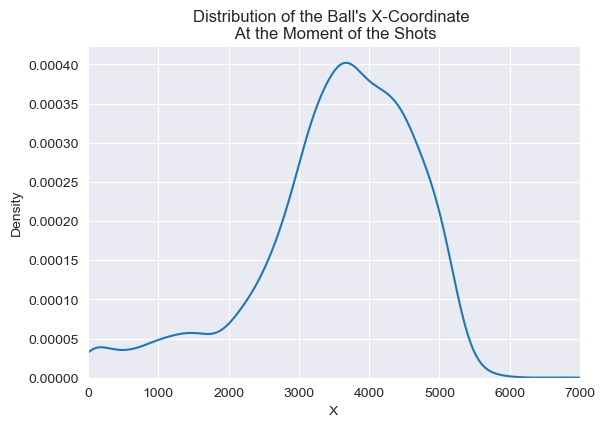

In [9]:
sns.displot(data = Relevant_Data_4_xG_Model, x = "X", kind = "kde", height = 4, aspect = 1.5)


# X = Ball's X-Coordinate At the Moment of the Shot

plt.xlim([0, 7000])


plt.title("Distribution of the Ball's X-Coordinate \n At the Moment of the Shots", fontsize = 12)



plt.savefig("xG Model/xG EDA Figures/Distribution of the Ball's X-Coordinate.png")

plt.show()


In [51]:
TPD4MFs.Count_Ocurrence_of_Values_Above_or_Below_Threshold( df = Relevant_Data_4_xG_Model, column_name = "X", threshold = 5400.0, above = True )

41

In [52]:
Relevant_Data_4_xG_Model[ Relevant_Data_4_xG_Model["X"] > 5400.0 ]

X       Y  Dist_Between_Ball_TargetGoal  \
300   5671.0 -1874.0                   1920.707422   
353   5418.0  -227.0                    282.405736   
523   5403.0 -1909.0                   1915.121406   
883   5486.0  -942.0                    971.112764   
887   5437.0   745.0                    768.110669   
1026  5410.0  1118.0                   1129.390986   
1071  5498.0  2864.0                   2874.717377   
1117  5458.0 -1194.0                   1211.981848   
1272  5638.0  3596.0                   3616.871576   
1644  5500.0 -2712.0                   2723.498485   
2007  5436.0   -29.0                    188.247178   
2289  5926.0  -686.0                    963.105394   
2520  6738.0   372.0                   1533.795293   
2806  5924.0 -2100.0                   2205.510372   
3062  5747.0 -2774.0                   2818.170506   
3119  6012.0  2262.0                   2386.899244   
3335  5402.0  1310.0                   1318.788838   
3434  5799.0  2322.0                   2386.018650   
4077  5507.0   625.0                    675.776590   
4297  5489.0  1419.0                   1438.986449   
4489  5609.0  2045.0                   2076.272140   
4532  5680.0 -3076.0                   3105.909851   
4633  5433.0  3129.0                   3134.346822   
4751  5454.0  2151.0                   2160.651985   
5240  5442.0  -875.0                    895.817504   
5262  5520.0  1269.0                   1297.405488   
5361  5765.0 -1020.0                   1142.639488   
5532  5678.0  -783.0                    892.341302   
5684  5502.0 -2103.0                   2118.044617   
5827  5484.0 -2139.0                   2151.761372   
5905  5547.0   -28.0                    298.316946   
5933  5564.0   878.0                    932.459114   
6013  5445.0  -515.0                    550.681396   
6029  5472.0   353.0                    417.004796   
6250  5423.0  2848.0                   2853.249551   
6499  5676.0   525.0                    676.092449   
7534  5501.0  2076.0                   2091.118600   
7631  5803.0 -1284.0                   1398.021817   
7682  5549.0   428.0                    522.096734   
7712  5566.0   278.0                    420.880030   
7869  5488.0  -739.0                    776.379418   

      Angle_Between_Ball_TargetGoal_Rad  Will_Be_a_Goal  
300                            0.116206             0.0  
353                            0.134578             1.0  
523                            0.120274             0.0  
883                            0.129359             0.0  
887                            0.131884             0.0  
1026                           0.129520             0.0  
1071                           0.104636             0.0  
1117                           0.127757             0.0  
1272                           0.092243             0.0  
1644                           0.106962             0.0  
2007                           0.134363             0.0  
2289                           0.121666             1.0  
2520                           0.108132             0.0  
2806                           0.109630             0.0  
3062                           0.103207             0.0  
3119                           0.106530             0.0  
3335                           0.127752             0.0  
3434                           0.108660             0.0  
4077                           0.130965             0.0  
4297                           0.124792             0.0  
4489                           0.115040             0.0  
4532                           0.099573             0.0  
4633                           0.101107             0.0  
4751                           0.116002             0.0  
5240                           0.130861             0.0  
5262                           0.125730             0.0  
5361                           0.122898             0.0  
5532                           0.126271             1.0  
5684                           0.115934             0.0  
58

In [53]:
TPD4MFs.Check_Goals_For_Values_Above_or_Below_Threshold_of_Specific_Column( df = Relevant_Data_4_xG_Model, column_name = "X", threshold = 5400.0, above = True, goal_column = "Will_Be_a_Goal" )

7

In [54]:
Relevant_Data_4_xG_Model[ (Relevant_Data_4_xG_Model["X"] > 5400.0) & (Relevant_Data_4_xG_Model["Will_Be_a_Goal"] == 1.0) ]

X       Y  Dist_Between_Ball_TargetGoal  \
353   5418.0  -227.0                    282.405736   
2289  5926.0  -686.0                    963.105394   
5532  5678.0  -783.0                    892.341302   
5827  5484.0 -2139.0                   2151.761372   
5905  5547.0   -28.0                    298.316946   
6029  5472.0   353.0                    417.004796   
7534  5501.0  2076.0                   2091.118600   

      Angle_Between_Ball_TargetGoal_Rad  Will_Be_a_Goal  
353                            0.134578             1.0  
2289                           0.121666             1.0  
5532                           0.126271             1.0  
5827                           0.115708             1.0  
5905                           0.131683             1.0  
6029                           0.132937             1.0  
7534                           0.116326             1.0

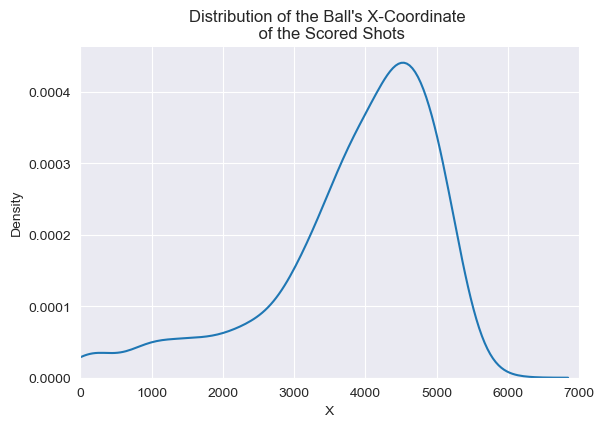

In [4]:
sns.displot(data = Relevant_Data_4_xG_Model[Relevant_Data_4_xG_Model["Will_Be_a_Goal"] == 1.0], x = "X", kind = "kde", height = 4, aspect = 1.5)


# X = Ball's X-Coordinate At the Moment of the Shot

plt.xlim([0, 7000])


plt.title("Distribution of the Ball's X-Coordinate \n of the Scored Shots", fontsize = 12)



plt.savefig("xG Model/xG EDA Figures/Distribution of the Ball's X-Coordinate of Scored Shots.png")

plt.show()


#### Distribution of the `Y` Coordinates of the Shots

In [8]:
Relevant_Data_4_xG_Model["Y"].describe()

count    8053.00000
mean      -27.14864
std      1530.47313
min     -9999.00000
25%      -986.00000
50%       -16.00000
75%       911.00000
max      9999.00000
Name: Y, dtype: float64

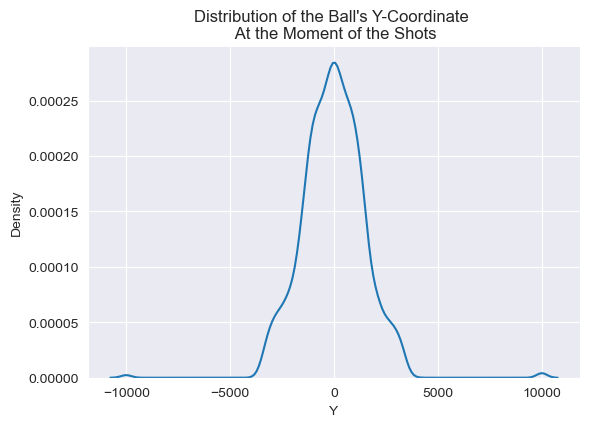

In [12]:
sns.displot(data = Relevant_Data_4_xG_Model, x = "Y", kind = "kde", height = 4, aspect = 1.5)


# Y = Ball's Y-Coordinate At the Moment of the Shot

# plt.xlim([120, 230])


plt.title("Distribution of the Ball's Y-Coordinate \n At the Moment of the Shots", fontsize = 12)



plt.savefig("xG Model/xG EDA Figures/Distribution of the Ball's Y-Coordinate.png")

plt.show()


In [15]:
# Count How Many Times Does the Value `9999.0` Occur In the "Y" Column

TPD4MFs.Count_Ocurrence_of_Specific_Value( df = Relevant_Data_4_xG_Model, column_name = "Y", specific_value = 9999.0 )


21

In [19]:
# Count How Many Goals Were Scored When the Value `9999.0` Occurred In the "Y" Column

TPD4MFs.Check_Goals_For_Specific_Value_of_Specific_Column( df = Relevant_Data_4_xG_Model, specific_column_name = "Y", specific_value = 9999.0, goal_column = "Will_Be_a_Goal" )


1

In [21]:
Relevant_Data_4_xG_Model[ Relevant_Data_4_xG_Model["Y"] == 9999.0 ]

X       Y  Dist_Between_Ball_TargetGoal  \
404   0.0  9999.0                   11293.47161   
410   0.0  9999.0                   11293.47161   
412   0.0  9999.0                   11293.47161   
424   0.0  9999.0                   11293.47161   
427   0.0  9999.0                   11293.47161   
622   0.0  9999.0                   11293.47161   
803   0.0  9999.0                   11293.47161   
804   0.0  9999.0                   11293.47161   
1010  0.0  9999.0                   11293.47161   
1838  0.0  9999.0                   11293.47161   
1839  0.0  9999.0                   11293.47161   
1897  0.0  9999.0                   11293.47161   
1898  0.0  9999.0                   11293.47161   
1943  0.0  9999.0                   11293.47161   
2710  0.0  9999.0                   11293.47161   
2712  0.0  9999.0                   11293.47161   
2713  0.0  9999.0                   11293.47161   
3125  0.0  9999.0                   11293.47161   
3150  0.0  9999.0                   11293.47161   
3382  0.0  9999.0                   11293.47161   
7996  0.0  9999.0                   11293.47161   

      Angle_Between_Ball_TargetGoal_Rad  Will_Be_a_Goal  
404                                 0.0             0.0  
410                                 0.0             0.0  
412                                 0.0             0.0  
424                                 0.0             0.0  
427                                 0.0             0.0  
622                                 0.0             0.0  
803                                 0.0             0.0  
804                                 0.0             0.0  
1010                                0.0             0.0  
1838                                0.0             0.0  
1839                                0.0             0.0  
1897                                0.0             0.0  
1898                                0.0             0.0  
1943                                0.0             0.0  
2710                                0.0             0.0  
2712                                0.0             0.0  
2713                                0.0             0.0  
3125                                0.0             1.0  
3150                                0.0             0.0  
3382                                0.0             0.0  
7996                                0.0             0.0

In [25]:
TPD4MFs.Count_Ocurrence_of_Values_Above_or_Below_Threshold( df = Relevant_Data_4_xG_Model, column_name = "Y", threshold = 3400.0, above = True )

35

In [31]:
TPD4MFs.Check_Goals_For_Values_Above_or_Below_Threshold_of_Specific_Column( df = Relevant_Data_4_xG_Model, column_name = "Y", threshold = 3400.0, above = True, goal_column = "Will_Be_a_Goal" )

4

In [32]:
Relevant_Data_4_xG_Model[ (Relevant_Data_4_xG_Model["Y"] > 3400.0) & (Relevant_Data_4_xG_Model["Will_Be_a_Goal"] == 1.0) ]

X       Y  Dist_Between_Ball_TargetGoal  \
924   4887.0  3404.0                   3423.300308   
3125     0.0  9999.0                  11293.471610   
4260  3808.0  3638.0                   3913.362748   
4517  4248.0  3413.0                   3557.045544   

      Angle_Between_Ball_TargetGoal_Rad  Will_Be_a_Goal  
924                            0.100826             1.0  
3125                           0.000000             1.0  
4260                           0.100580             1.0  
4517                           0.104739             1.0

In [16]:
# Count How Many Times Does the Value `-9999.0` Occur In the "Y" Column

TPD4MFs.Count_Ocurrence_of_Specific_Value( df = Relevant_Data_4_xG_Model, column_name = "Y", specific_value = -9999.0 )


12

In [20]:
# Count How Many Goals Were Scored When the Value `-9999.0` Occurred In the "Y" Column

TPD4MFs.Check_Goals_For_Specific_Value_of_Specific_Column( df = Relevant_Data_4_xG_Model, specific_column_name = "Y", specific_value = -9999.0, goal_column = "Will_Be_a_Goal" )


0

In [26]:
TPD4MFs.Count_Ocurrence_of_Values_Above_or_Below_Threshold( df = Relevant_Data_4_xG_Model, column_name = "Y", threshold = -3400.0, above = False )

30

In [33]:
TPD4MFs.Check_Goals_For_Values_Above_or_Below_Threshold_of_Specific_Column( df = Relevant_Data_4_xG_Model, column_name = "Y", threshold = -3400.0, above = False, goal_column = "Will_Be_a_Goal" )

1

In [34]:
Relevant_Data_4_xG_Model[ (Relevant_Data_4_xG_Model["Y"] < -3400.0) & (Relevant_Data_4_xG_Model["Will_Be_a_Goal"] == 1.0) ]

X       Y  Dist_Between_Ball_TargetGoal  \
4234  5193.0 -3554.0                   3554.457061   

      Angle_Between_Ball_TargetGoal_Rad  Will_Be_a_Goal  
4234                           0.095963             1.0

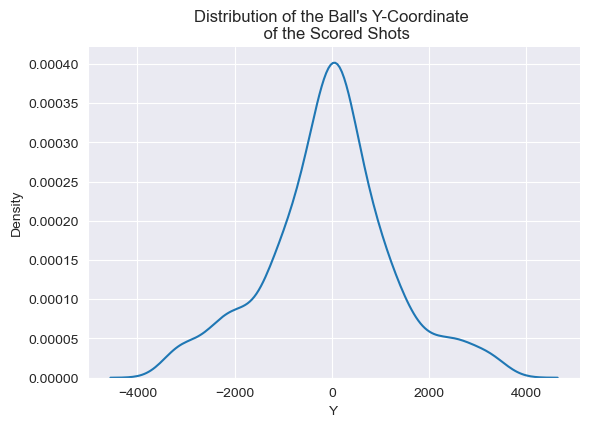

In [6]:
sns.displot(data = Relevant_Data_4_xG_Model[Relevant_Data_4_xG_Model["Will_Be_a_Goal"] == 1.0], x = "Y", kind = "kde", height = 4, aspect = 1.5)


# Y = Ball's Y-Coordinate At the Moment of the Shot

# plt.xlim([0, 7000])


plt.title("Distribution of the Ball's Y-Coordinate \n of the Scored Shots", fontsize = 12)



plt.savefig("xG Model/xG EDA Figures/Distribution of the Ball's Y-Coordinate of Scored Shots.png")

plt.show()


#### Distribution of the `Dist_Between_Ball_Goal` of the Shots

In [36]:
Relevant_Data_4_xG_Model["Dist_Between_Ball_TargetGoal"].describe()

count     8053.000000
mean      2247.560051
std       1221.185016
min         58.898217
25%       1479.060513
50%       2043.413810
75%       2787.234113
max      11293.471610
Name: Dist_Between_Ball_TargetGoal, dtype: float64

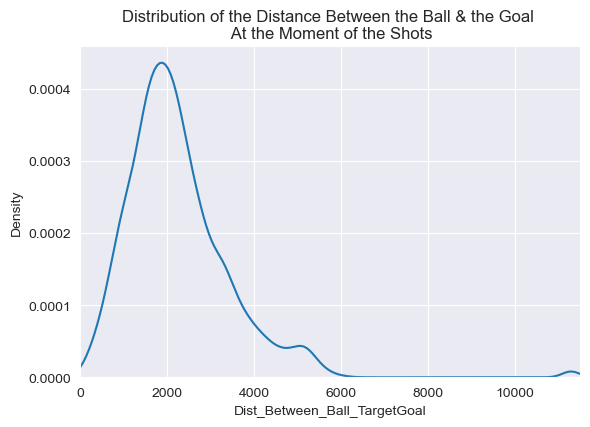

In [38]:
sns.displot(data = Relevant_Data_4_xG_Model, x = "Dist_Between_Ball_TargetGoal", kind = "kde", height = 4, aspect = 1.5)


# Dist_Between_Ball_Goal = Distance Between the Ball & the Goal At the Moment of the Shot

plt.xlim([0, 11500])


plt.title("Distribution of the Distance Between the Ball & the Goal \n At the Moment of the Shots", fontsize = 12)



plt.savefig("xG Model/xG EDA Figures/Distribution of the Distance Between the Ball and the Goal.png")

plt.show()


In [57]:
TPD4MFs.Count_Ocurrence_of_Values_Above_or_Below_Threshold( df = Relevant_Data_4_xG_Model, column_name = "Dist_Between_Ball_TargetGoal", threshold = 11000, above = True )

33

In [59]:
Relevant_Data_4_xG_Model[ Relevant_Data_4_xG_Model["Dist_Between_Ball_TargetGoal"] > 11000.0 ]

X       Y  Dist_Between_Ball_TargetGoal  \
404   0.0  9999.0                   11293.47161   
405   0.0 -9999.0                   11293.47161   
410   0.0  9999.0                   11293.47161   
412   0.0  9999.0                   11293.47161   
424   0.0  9999.0                   11293.47161   
425   0.0 -9999.0                   11293.47161   
426   0.0 -9999.0                   11293.47161   
427   0.0  9999.0                   11293.47161   
622   0.0  9999.0                   11293.47161   
803   0.0  9999.0                   11293.47161   
804   0.0  9999.0                   11293.47161   
1010  0.0  9999.0                   11293.47161   
1011  0.0 -9999.0                   11293.47161   
1012  0.0 -9999.0                   11293.47161   
1838  0.0  9999.0                   11293.47161   
1839  0.0  9999.0                   11293.47161   
1897  0.0  9999.0                   11293.47161   
1898  0.0  9999.0                   11293.47161   
1942  0.0 -9999.0                   11293.47161   
1943  0.0  9999.0                   11293.47161   
2239  0.0 -9999.0                   11293.47161   
2241  0.0 -9999.0                   11293.47161   
2710  0.0  9999.0                   11293.47161   
2711  0.0 -9999.0                   11293.47161   
2712  0.0  9999.0                   11293.47161   
2713  0.0  9999.0                   11293.47161   
2714  0.0 -9999.0                   11293.47161   
3125  0.0  9999.0                   11293.47161   
3149  0.0 -9999.0                   11293.47161   
3150  0.0  9999.0                   11293.47161   
3382  0.0  9999.0                   11293.47161   
7411  0.0 -9999.0                   11293.47161   
7996  0.0  9999.0                   11293.47161   

      Angle_Between_Ball_TargetGoal_Rad  Will_Be_a_Goal  
404                                 0.0             0.0  
405                                 0.0             0.0  
410                                 0.0             0.0  
412                                 0.0             0.0  
424                                 0.0             0.0  
425                                 0.0             0.0  
426                                 0.0             0.0  
427                                 0.0             0.0  
622                                 0.0             0.0  
803                                 0.0             0.0  
804                                 0.0             0.0  
1010                                0.0             0.0  
1011                                0.0             0.0  
1012                                0.0             0.0  
1838                                0.0             0.0  
1839                                0.0             0.0  
1897                                0.0             0.0  
1898                                0.0             0.0  
1942                                0.0             0.0  
1943                                0.0             0.0  
2239                                0.0             0.0  
2241                                0.0             0.0  
2710                                0.0             0.0  
2711                                0.0             0.0  
2712                                0.0             0.0  
2713                                0.0             0.0  
2714                                0.0             0.0  
3125                                0.0             1.0  
3149                                0.0             0.0  
3150                                0.0             0.0  
3382                                0.0             0.0  
7411                                0.0             0.0  
7996                                0.0             0.0

In [40]:
# According to Pythagoras' theorem, the max. distance there should be according to our pitch dimensions are: d_max = √ (5250² + 3400²) == 6254.8

TPD4MFs.Count_Ocurrence_of_Values_Above_or_Below_Threshold( df = Relevant_Data_4_xG_Model, column_name = "Dist_Between_Ball_TargetGoal", threshold = 6254.8, above = True )

33

In [41]:
TPD4MFs.Check_Goals_For_Values_Above_or_Below_Threshold_of_Specific_Column( df = Relevant_Data_4_xG_Model, column_name = "Dist_Between_Ball_TargetGoal", threshold = 6254.8, above = True, goal_column = "Will_Be_a_Goal" )

1

In [43]:
Relevant_Data_4_xG_Model[ (Relevant_Data_4_xG_Model["Dist_Between_Ball_TargetGoal"] > 6254.8) & (Relevant_Data_4_xG_Model["Will_Be_a_Goal"] == 1.0) ]

X       Y  Dist_Between_Ball_TargetGoal  \
3125  0.0  9999.0                   11293.47161   

      Angle_Between_Ball_TargetGoal_Rad  Will_Be_a_Goal  
3125                                0.0             1.0

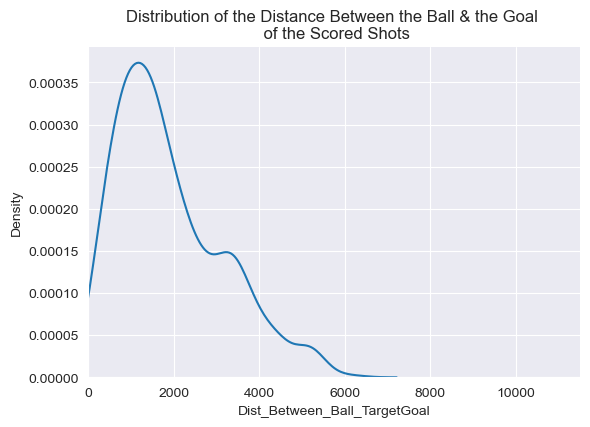

In [7]:
sns.displot(data = Relevant_Data_4_xG_Model[Relevant_Data_4_xG_Model["Will_Be_a_Goal"] == 1.0], x = "Dist_Between_Ball_TargetGoal", kind = "kde", height = 4, aspect = 1.5)


# Dist_Between_Ball_Goal = Distance Between the Ball & the Goal At the Moment of the Shot

plt.xlim([0, 11500])


plt.title("Distribution of the Distance Between the Ball & the Goal \n of the Scored Shots", fontsize = 12)



plt.savefig("xG Model/xG EDA Figures/Distribution of the Distance Between the Ball & the Goal of Scored Shots.png")

plt.show()


In [65]:

TPD4MFs.Replace_Multiple_Values_From_Multiple_Columns_and_Save_Modified_Data_Into_File( df = Final_Data_4_xG_Model_df,
                                                                                        exact_replacements_dict = { "Y" : {9999.0 : 3400.0, -9999.0 : -3400.0} },
                                                                                        conditional_replacements_dict = { "Dist_Between_Ball_TargetGoal" : (11000, 6254.79816) },
                                                                                        above = True,   # If 'Dist_Between_Ball_TargetGoal' is greater than 11000, replace with 6254.79816
                                                                                        file_path = "xG Model/Data For xG Model/Final_xG_Model_Data.parquet" )


 Modifications On Outliers & Nonsensical Values, & Made All Anlges Positive, Within the Relevant Tracking Data For the xG Model  -->  Succesfully Saved In the 'Final_xG_Model_Data.parquet' File  

_________________________________________________________________________________________________________________________________________________________________________________ 

 FINISHED  



#### Distribution of the `Angle_Between_Ball_Goal` of the Shots

In [45]:
Relevant_Data_4_xG_Model["Angle_Between_Ball_TargetGoal_Rad"].describe()

count    8053.000000
mean        0.186851
std         0.106997
min        -1.528992
25%         0.148843
50%         0.171934
75%         0.206054
max         1.550851
Name: Angle_Between_Ball_TargetGoal_Rad, dtype: float64

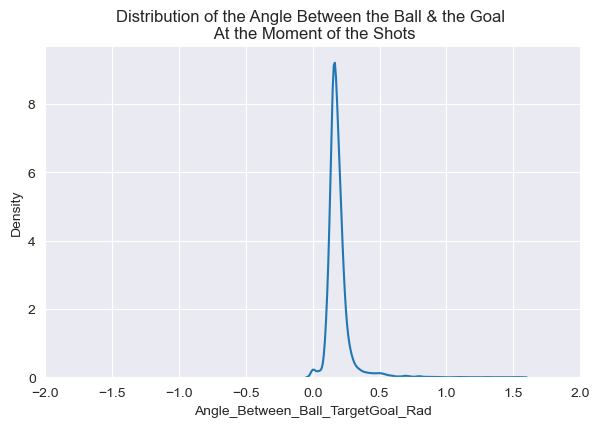

In [9]:
sns.displot(data = Relevant_Data_4_xG_Model, x = "Angle_Between_Ball_TargetGoal_Rad", kind = "kde", height = 4, aspect = 1.5)


# Angle_Between_Ball_Goal = Angle Between the Ball & the Goal At the Moment of the Shot

plt.xlim([-2, 2])


plt.title("Distribution of the Angle Between the Ball & the Goal \n At the Moment of the Shots", fontsize = 12)



plt.savefig("xG Model/xG EDA Figures/Distribution of the Angle Between the Ball and the Goal.png")

plt.show()


In [48]:
TPD4MFs.Count_Ocurrence_of_Values_Above_or_Below_Threshold( df = Relevant_Data_4_xG_Model, column_name = "Angle_Between_Ball_TargetGoal_Rad", threshold = 0.0, above = False )

15

In [49]:
Relevant_Data_4_xG_Model[ Relevant_Data_4_xG_Model["Angle_Between_Ball_TargetGoal_Rad"] < 0.0 ]

X      Y  Dist_Between_Ball_TargetGoal  \
1115  196.0 -119.0                   5055.400775   
1530  149.0   58.0                   5101.329729   
3120   12.0 -362.0                   5250.494072   
3492   68.0   55.0                   5182.291868   
3788  221.0 -159.0                   5031.512894   
4033  270.0   99.0                   4980.983939   
4081  306.0  -64.0                   4944.414222   
4307  181.0  309.0                   5078.409397   
4312  295.0   31.0                   4955.096972   
4561  310.0 -153.0                   4942.368764   
5959  228.0   81.0                   5022.653183   
6264  113.0 -313.0                   5146.526790   
6340    5.0   31.0                   5245.091610   
7539   39.0 -152.0                   5213.216378   
8050  185.0  -92.0                   5065.835469   

      Angle_Between_Ball_TargetGoal_Rad  Will_Be_a_Goal  
1115                          -1.055480             0.0  
1530                          -0.788994             0.0  
3120                          -1.283640             1.0  
3492                          -0.375650             0.0  
3788                          -1.217276             0.0  
4033                          -1.317725             0.0  
4081                          -1.411126             0.0  
4307                          -1.528992             0.0  
4312                          -1.361689             0.0  
4561                          -1.507946             1.0  
5959                          -1.147038             0.0  
6264                          -1.298942             1.0  
6340                          -0.027536             1.0  
7539                          -0.255645             0.0  
8050                          -0.978353             1.0

In [55]:
TPD4MFs.Check_Goals_For_Values_Above_or_Below_Threshold_of_Specific_Column( df = Relevant_Data_4_xG_Model, column_name = "Angle_Between_Ball_TargetGoal_Rad", threshold = 0.0, above = False, goal_column = "Will_Be_a_Goal" )

5

In [50]:
Relevant_Data_4_xG_Model[ (Relevant_Data_4_xG_Model["Angle_Between_Ball_TargetGoal_Rad"] < 0.0) & (Relevant_Data_4_xG_Model["Will_Be_a_Goal"] == 1.0) ]

X      Y  Dist_Between_Ball_TargetGoal  \
3120   12.0 -362.0                   5250.494072   
4561  310.0 -153.0                   4942.368764   
6264  113.0 -313.0                   5146.526790   
6340    5.0   31.0                   5245.091610   
8050  185.0  -92.0                   5065.835469   

      Angle_Between_Ball_TargetGoal_Rad  Will_Be_a_Goal  
3120                          -1.283640             1.0  
4561                          -1.507946             1.0  
6264                          -1.298942             1.0  
6340                          -0.027536             1.0  
8050                          -0.978353             1.0

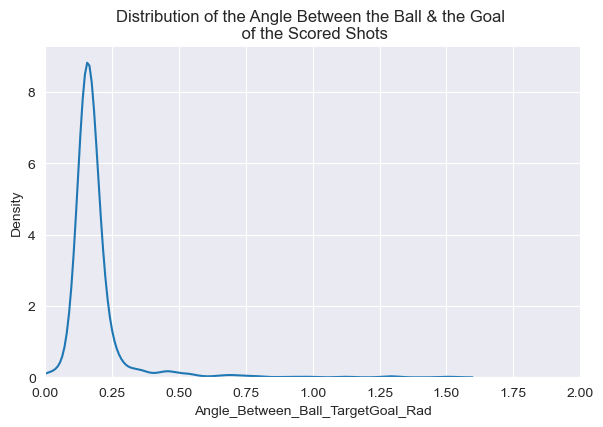

In [10]:
sns.displot(data = Relevant_Data_4_xG_Model[Relevant_Data_4_xG_Model["Will_Be_a_Goal"] == 1.0], x = "Angle_Between_Ball_TargetGoal_Rad", kind = "kde", height = 4, aspect = 1.5)


# Angle_Between_Ball_Goal = Angle Between the Ball & the Goal At the Moment of the Shot

plt.xlim([0, 2])


plt.title("Distribution of the Angle Between the Ball & the Goal \n of the Scored Shots", fontsize = 12)



plt.savefig("xG Model/xG EDA Figures/Distribution of the Angle Between the Ball & the Goal of Scored Shots.png")

plt.show()


#### Distribution of the `Will_Be_a_Goal` of the Shots $\rightarrow$ Traget Variable

In [66]:
Final_Data_4_xG_Model_df = TPD4MFs.Read_xG_Model_Relevant_Data(  )

Final_Data_4_xG_Model_df.head(10)


 Loading & Reading In the Final Version of the Relevant Tracking Data For the xG Model - Only Containing the Frames In Which Shots Occurred Throughout the Season, On 1 Same Target Goal 

Dimensions of the Final Version of the Relevant Tracking Data For the xG Model - Only Containing the Frames In Which Shots Occurred Throughout the Season, On 1 Same Target Goal  =  (8053, 5) 

∴ The Total Number of Shots Taken Throughout the Season  =  8053 

∴ The Total Number of Goals Scored Throughout the Season  =  933 



X       Y  Dist_Between_Ball_TargetGoal  \
0  2128.0   434.0                   3152.021574   
1  2159.0  1548.0                   3456.961816   
2  4234.0    61.0                   1017.829554   
3  3561.0  1088.0                   2009.095568   
4  4197.0 -1113.0                   1532.180799   
5  2733.0  -799.0                   2640.774508   
6   947.0 -2960.0                   5222.777901   
7  4318.0   160.0                    945.634179   
8  3254.0  1421.0                   2450.154485   
9  3430.0 -1572.0                   2404.908314   

   Angle_Between_Ball_TargetGoal_Rad  Will_Be_a_Goal  
0                           0.327439             0.0  
1                           0.224267             0.0  
2                           0.172310             0.0  
3                           0.187489             0.0  
4                           0.162560             1.0  
5                           0.245659             0.0  
6                           0.072605             0.0  
7                           0.168779             0.0  
8                           0.188560             0.0  
9                           0.176080             0.0

In [67]:
Final_Data_4_xG_Model_df["Will_Be_a_Goal"].describe()

count    8053.000000
mean        0.115857
std         0.320074
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Will_Be_a_Goal, dtype: float64

In [68]:
Final_Data_4_xG_Model_df["Will_Be_a_Goal"].value_counts()

0.0    7120
1.0     933
Name: Will_Be_a_Goal, dtype: int64

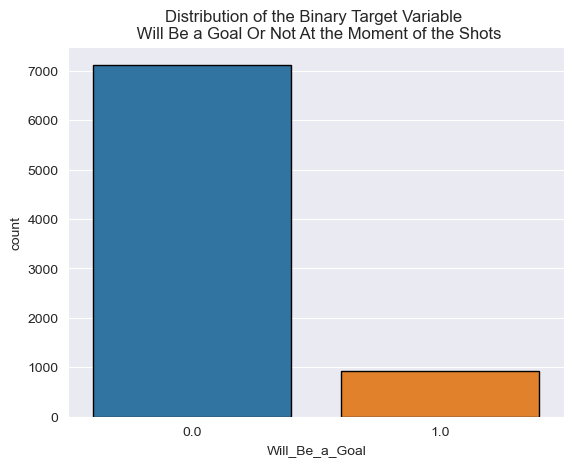

In [71]:
sns.countplot(data = Final_Data_4_xG_Model_df, x = "Will_Be_a_Goal", edgecolor = 'k')


# Will_Be_a_Goal = Forecasts/Predicts Whether the Shot Will Be a Goal Or Not At the Moment of the Shot


plt.title("Distribution of the Binary Target Variable \n Will Be a Goal Or Not At the Moment of the Shots")



plt.savefig("xG Model/xG EDA Figures/Distribution of the Binary Target Variable.png")

plt.show()


___
___
___

## **Preparing the Data For All Models** - Common (For All Models) Data Transformations, Imputations, Augmentations, Feature Engineerings, etc.

- Adjust Shooting Direction For Attacking Team At Instant of the Shots + Drop Irrelevant/Unnecessary Columns

- Make Outliers' & Nonsensical Values' Imputations

- Train-Test Stratified Split $\rightarrow$ 70:30

- 8053 Shots & 933 Goals Scored, Overall - NOT ENOUGH Data $\rightarrow$ Data Augmentation (Only On Training Data)

- Create Distance & Angle Columns: From the Ball & Each Individual Player To Target Goal - Based On Which Team Is In Possession of the Ball At That Row/Shot Frame   ⇔   Node-Features

- Binary Columns For Each Player Indicating Whether Their Team Was Currently In Possession of the Ball Or Not   ⇔   Node-Features

- Create Distance Columns: Between the Ball & Players, and Between Players Themselves   ⇔   Edge-Features

- Create Same-Team Binary Flag/Indicator For Pairs of Players   ⇔   Edge-Features

___

### Adjust Shooting Direction For Attacking Team At Instant of the Shots + Drop Irrelevant/Unnecessary Columns

In [2]:
All_Season_Shots_df = TPD4MFs.Read_Tracking_Data_4_All_Season_Shots_Frames_On_1_Same_Target_Goal_4_All_Models(  )

All_Season_Shots_df.head(10)


 Loading & Reading In the Final Version of the Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred Throughout the Season, On 1 Same Target Goal 

Dimensions of the Final Version of the Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred Throughout the Season, On 1 Same Target Goal  =  (8053, 373) 

∴ The Total Number of Shots Taken Throughout the Season  =  8053 

∴ The Total Number of Goals Scored Throughout the Season  =  933 

∴ The Total Number of Non-Scored Shots Throughout the Season  =  7120 



X       Y      Z  Visable      X1      X2      X3      X4      X5  \
0 -2128.0  -434.0   29.0      1.0 -4665.0 -3254.0 -2575.0 -4420.0 -3548.0   
1  2159.0  1548.0   21.0      1.0 -3582.0  2157.0    36.0  -421.0  1923.0   
2  4234.0   -61.0   42.0      1.0 -3445.0   325.0  1366.0  -361.0  1065.0   
3 -3561.0  1088.0  265.0      0.0 -4784.0 -4499.0 -3761.0 -4171.0 -4158.0   
4  4197.0  1113.0   28.0      1.0 -2597.0  3908.0  4268.0  2568.0  1471.0   
5  2733.0  -799.0   29.0      1.0 -3082.0  2563.0  3687.0  1577.0  3017.0   
6  -947.0 -2960.0   33.0      1.0 -4349.0  -389.0 -1207.0 -2550.0 -1395.0   
7 -4318.0  -160.0   11.0      1.0 -4887.0 -4434.0 -4269.0 -4450.0 -4410.0   
8 -3254.0  1421.0   24.0      1.0 -4647.0 -2941.0 -2924.0 -3504.0 -3444.0   
9 -3430.0 -1572.0   94.0      1.0 -4808.0 -3694.0 -3520.0 -4093.0 -4151.0   

       X6      X7      X8      X9     X10     X11     X12     X13     X14  \
0 -3061.0 -3451.0 -2574.0 -1909.0 -2684.0 -3482.0  1949.0 -3275.0 -3578.0   
1  1599.0  -764.0   963.0 -1355.0  2470.0  -446.0  4481.0  1447.0  2019.0   
2  2983.0  -450.0   311.0   224.0  1775.0  -533.0  4467.0   808.0  3298.0   
3 -2335.0 -4146.0 -3627.0 -2561.0 -3705.0 -4383.0  2474.0 -3325.0 -1917.0   
4  4072.0   839.0  3009.0  3037.0  2913.0  1611.0  4691.0  3494.0  4224.0   
5  3756.0   427.0  1878.0  1918.0  3382.0   844.0  4679.0  2623.0  3923.0   
6  1032.0 -2652.0 -1649.0 -2035.0  -566.0 -1195.0  3363.0 -1613.0   919.0   
7  -414.0 -4456.0 -3916.0 -3336.0 -3649.0 -4249.0  2614.0 -4271.0  -377.0   
8   156.0 -3854.0 -3385.0  -860.0 -2391.0 -3760.0  3032.0 -3081.0    57.0   
9 -2951.0 -4080.0 -3537.0 -1350.0 -3730.0 -3988.0  2404.0 -3402.0  -773.0   

      X15     X16     X17     X18     X19     X20     X21     X22     Y1  \
0 -2099.0 -3472.0 -1890.0 -3173.0 -2181.0 -3464.0 -3491.0 -3521.0 -119.0   
1  2751.0  2903.0  2639.0  1335.0  2058.0  2509.0   482.0  -557.0  -30.0   
2  1957.0  2897.0  1056.0  -558.0  2098.0  2364.0  -511.0  -273.0   -1.0   
3 -2400.0  -624.0 -4284.0 -4119.0 -2461.0 -3216.0 -4255.0 -4342.0   95.0   
4  4230.0  4459.0  4236.0  3704.0  3834.0  3914.0  3102.0  1522.0  164.0   
5  2804.0  3909.0  3484.0  2447.0  3328.0  3684.0  2703.0  1645.0   46.0   
6    29.0  -315.0  -400.0 -1696.0  -439.0   952.0  -832.0 -2513.0 -515.0   
7 -2736.0  -447.0 -4474.0 -4588.0 -1863.0 -3028.0 -3636.0 -4179.0   21.0   
8 -1694.0    90.0  -937.0 -3263.0 -1707.0  -518.0 -3285.0 -3731.0  234.0   
9 -1986.0 -1180.0 -3728.0 -4138.0 -2750.0 -1846.0 -3814.0 -3360.0 -209.0   

       Y2      Y3      Y4      Y5      Y6      Y7      Y8      Y9     Y10  \
0  -140.0  -478.0   458.0   901.0 -1056.0  -256.0  -248.0 -1835.0 -1266.0   
1 -2293.0   761.0  1026.0  1513.0   287.0  -707.0   348.0 -2277.0  -908.0   
2 -2045.0   459.0  1436.0  1846.0   721.0  -457.0   100.0 -2432.0  -665.0   
3 -1303.0  1098.0   -24.0   588.0   762.0   308.0   303.0 -2120.0  -856.0   
4  1539.0   506.0  1772.0  1556.0   154.0  -104.0  1174.0 -1258.0    76.0   
5  -833.0  -356.0  1569.0   962.0   446.0   450.0  -297.0    44.0  -604.0   
6 -2707.0  -621.0  -291.0  1125.0  -476.0 -1627.0 -2281.0 -3541.0 -2611.0   
7 -1519.0    51.0  -126.0  -264.0  1112.0  -216.0  -477.0  -557.0  -335.0   
8 -1337.0   940.0   860.0  1531.0  1060.0   119.0   324.0 -1382.0  -728.0   
9 -2114.0  -622.0   -73.0   207.0 -1175.0 -1400.0 -1173.0 -1918.0 -1797.0   

      Y11    Y12     Y13     Y14     Y15     Y16     Y17     Y18     Y19  \
0  -607.0 -101.0  -734.0  -378.0   851.0  -110.0  -432.0 -2699.0 -1806.0   
1 -1870.0  158.0   260.0  1168.0  -336.0   861.0 -1160.0  1059.0   334.0   
2 -1630.0  -90.0   352.0  1058.0  -761.0 -1223.0 -2540.0  2197.0   348.0   
3  -298.0   63.0   206.0   855.0 -1212.0  -229.0 -1844.0   437.0   307.0   
4  -628.0  255.0  1094.0   465.0   148.0  -355.0  -514.0  1589.0   217.0   
5  -930.0  -93.0   126.0   262.0  -723.0  -284.0  -896.0  2082.0   -37.0   
6 -2878.0 -605.0 -2156.0 -1176.0 -2723.0 -3031.0 -3170.0    77.0 -1340.0   
7  -704.0  -76.0   

In [3]:
TPD4MFs.Adjust_Attacking_Team_Shooting_Direction_and_Drop_Irrelevant_Columns(  )


 Loading & Reading In the Final Version of the Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred Throughout the Season, On 1 Same Target Goal 

 Final Version of the Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred Throughout the Season, On 1 Same Target Goal  -->  Succesfully Saved In the 'All_Season_Shots_Frames_On_1_Same_Target_Goal_4_All_Models.parquet' File  

_________________________________________________________________________________________________________________________________________________________________________________ 

 FINISHED  



In [2]:
All_Season_Shots_On_1_Same_Target_Goal_df = TPD4MFs.Read_Tracking_Data_4_All_Season_Shots_Frames_On_1_Same_Target_Goal_4_All_Models(  )

All_Season_Shots_On_1_Same_Target_Goal_df.head(10)


 Loading & Reading In the Final Version of the Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred Throughout the Season, On 1 Same Target Goal 

Dimensions of the Final Version of the Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred Throughout the Season, On 1 Same Target Goal  =  (8053, 122) 

∴ The Total Number of Shots Taken Throughout the Season  =  8053 

∴ The Total Number of Goals Scored Throughout the Season  =  933 

∴ The Total Number of Non-Scored Shots Throughout the Season  =  7120 



X       Y      Z      X1      X2      X3      X4      X5      X6  \
0  2128.0   434.0   29.0  4665.0  3254.0  2575.0  4420.0  3548.0  3061.0   
1  2159.0  1548.0   21.0 -3582.0  2157.0    36.0  -421.0  1923.0  1599.0   
2  4234.0    61.0   42.0  3445.0  -325.0 -1366.0   361.0 -1065.0 -2983.0   
3  3561.0  1088.0  265.0 -4784.0 -4499.0 -3761.0 -4171.0 -4158.0 -2335.0   
4  4197.0 -1113.0   28.0  2597.0 -3908.0 -4268.0 -2568.0 -1471.0 -4072.0   
5  2733.0  -799.0   29.0 -3082.0  2563.0  3687.0  1577.0  3017.0  3756.0   
6   947.0 -2960.0   33.0 -4349.0  -389.0 -1207.0 -2550.0 -1395.0  1032.0   
7  4318.0   160.0   11.0  4887.0  4434.0  4269.0  4450.0  4410.0   414.0   
8  3254.0  1421.0   24.0 -4647.0 -2941.0 -2924.0 -3504.0 -3444.0   156.0   
9  3430.0 -1572.0   94.0 -4808.0 -3694.0 -3520.0 -4093.0 -4151.0 -2951.0   

       X7      X8      X9     X10     X11     X12     X13     X14     X15  \
0  3451.0  2574.0  1909.0  2684.0  3482.0 -1949.0  3275.0  3578.0  2099.0   
1  -764.0   963.0 -1355.0  2470.0  -446.0  4481.0  1447.0  2019.0  2751.0   
2   450.0  -311.0  -224.0 -1775.0   533.0 -4467.0  -808.0 -3298.0 -1957.0   
3 -4146.0 -3627.0 -2561.0 -3705.0 -4383.0  2474.0 -3325.0 -1917.0 -2400.0   
4  -839.0 -3009.0 -3037.0 -2913.0 -1611.0 -4691.0 -3494.0 -4224.0 -4230.0   
5   427.0  1878.0  1918.0  3382.0   844.0  4679.0  2623.0  3923.0  2804.0   
6 -2652.0 -1649.0 -2035.0  -566.0 -1195.0  3363.0 -1613.0   919.0    29.0   
7  4456.0  3916.0  3336.0  3649.0  4249.0 -2614.0  4271.0   377.0  2736.0   
8 -3854.0 -3385.0  -860.0 -2391.0 -3760.0  3032.0 -3081.0    57.0 -1694.0   
9 -4080.0 -3537.0 -1350.0 -3730.0 -3988.0  2404.0 -3402.0  -773.0 -1986.0   

      X16     X17     X18     X19     X20     X21     X22     Y1      Y2  \
0  3472.0  1890.0  3173.0  2181.0  3464.0  3491.0  3521.0  119.0   140.0   
1  2903.0  2639.0  1335.0  2058.0  2509.0   482.0  -557.0  -30.0 -2293.0   
2 -2897.0 -1056.0   558.0 -2098.0 -2364.0   511.0   273.0    1.0  2045.0   
3  -624.0 -4284.0 -4119.0 -2461.0 -3216.0 -4255.0 -4342.0   95.0 -1303.0   
4 -4459.0 -4236.0 -3704.0 -3834.0 -3914.0 -3102.0 -1522.0 -164.0 -1539.0   
5  3909.0  3484.0  2447.0  3328.0  3684.0  2703.0  1645.0   46.0  -833.0   
6  -315.0  -400.0 -1696.0  -439.0   952.0  -832.0 -2513.0 -515.0 -2707.0   
7   447.0  4474.0  4588.0  1863.0  3028.0  3636.0  4179.0  -21.0  1519.0   
8    90.0  -937.0 -3263.0 -1707.0  -518.0 -3285.0 -3731.0  234.0 -1337.0   
9 -1180.0 -3728.0 -4138.0 -2750.0 -1846.0 -3814.0 -3360.0 -209.0 -2114.0   

       Y3      Y4      Y5      Y6      Y7      Y8      Y9     Y10     Y11  \
0   478.0  -458.0  -901.0  1056.0   256.0   248.0  1835.0  1266.0   607.0   
1   761.0  1026.0  1513.0   287.0  -707.0   348.0 -2277.0  -908.0 -1870.0   
2  -459.0 -1436.0 -1846.0  -721.0   457.0  -100.0  2432.0   665.0  1630.0   
3  1098.0   -24.0   588.0   762.0   308.0   303.0 -2120.0  -856.0  -298.0   
4  -506.0 -1772.0 -1556.0  -154.0   104.0 -1174.0  1258.0   -76.0   628.0   
5  -356.0  1569.0   962.0   446.0   450.0  -297.0    44.0  -604.0  -930.0   
6  -621.0  -291.0  1125.0  -476.0 -1627.0 -2281.0 -3541.0 -2611.0 -2878.0   
7   -51.0   126.0   264.0 -1112.0   216.0   477.0   557.0   335.0   704.0   
8   940.0   860.0  1531.0  1060.0   119.0   324.0 -1382.0  -728.0  -431.0   
9  -622.0   -73.0   207.0 -1175.0 -1400.0 -1173.0 -1918.0 -1797.0  -970.0   

     Y12     Y13     Y14     Y15     Y16     Y17     Y18     Y19     Y20  \
0  101.0   734.0   378.0  -851.0   110.0   432.0  2699.0  1806.0 -1488.0   
1  158.0   260.0  1168.0  -336.0   861.0 -1160.0  1059.0   334.0  1137.0   
2   90.0  -352.0 -1058.0   761.0  1223.0  2540.0 -2197.0  -348.0 -2559.0   
3   63.0   206.0   855.0 -1212.0  -229.0 -1844.0   437.0   307.0  1102.0   
4 -255.0 -1094.0  -465.0  -148.0   355.0   514.0 -1589.0  -217.0 -1240.0   
5  -93.0   126.0   262.0  -723.0  -284.0  -896.0  2082.0   -37.0   722.0   
6 -605.0 -2156.0 -1176.0 -2723.0 -3031.0 -3170.0    77.0 -1340.0  -310.0   
7   76.0  -404.0  -451.0  1174

___

### Make Outliers' & Nonsensical Values' Imputations

In [3]:

TPD4MFs.Replace_Multiple_Values_From_Multiple_Columns_and_Save_Modified_Data_Into_File( df = All_Season_Shots_On_1_Same_Target_Goal_df,
                                                                                        exact_replacements_dict = { "Y" : {9999.0 : 3400.0, -9999.0 : -3400.0} },
                                                                                        conditional_replacements_dict = None,
                                                                                        above = None,
                                                                                        file_path = "xG Model/Data For xG Model/All_Season_Shots_Frames_On_1_Same_Target_Goal_4_All_Models.parquet" )


 Modifications On Outliers & Nonsensical Values, Within the Relevant Tracking Data For the xG Model  -->  Succesfully Saved In the 'All_Season_Shots_Frames_On_1_Same_Target_Goal_4_All_Models.parquet' File  

_________________________________________________________________________________________________________________________________________________________________________________ 

 FINISHED  



In [2]:
All_Season_Shots_On_1_Same_Target_Goal_df = TPD4MFs.Read_Tracking_Data_4_All_Season_Shots_Frames_On_1_Same_Target_Goal_4_All_Models(  )

All_Season_Shots_On_1_Same_Target_Goal_df.head(10)


 Loading & Reading In the Final Version of the Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred Throughout the Season, On 1 Same Target Goal 

Dimensions of the Final Version of the Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred Throughout the Season, On 1 Same Target Goal  =  (8053, 122) 

∴ The Total Number of Shots Taken Throughout the Season  =  8053 

∴ The Total Number of Goals Scored Throughout the Season  =  933 

∴ The Total Number of Non-Scored Shots Throughout the Season  =  7120 



X       Y      Z      X1      X2      X3      X4      X5      X6  \
0  2128.0   434.0   29.0  4665.0  3254.0  2575.0  4420.0  3548.0  3061.0   
1  2159.0  1548.0   21.0 -3582.0  2157.0    36.0  -421.0  1923.0  1599.0   
2  4234.0    61.0   42.0  3445.0  -325.0 -1366.0   361.0 -1065.0 -2983.0   
3  3561.0  1088.0  265.0 -4784.0 -4499.0 -3761.0 -4171.0 -4158.0 -2335.0   
4  4197.0 -1113.0   28.0  2597.0 -3908.0 -4268.0 -2568.0 -1471.0 -4072.0   
5  2733.0  -799.0   29.0 -3082.0  2563.0  3687.0  1577.0  3017.0  3756.0   
6   947.0 -2960.0   33.0 -4349.0  -389.0 -1207.0 -2550.0 -1395.0  1032.0   
7  4318.0   160.0   11.0  4887.0  4434.0  4269.0  4450.0  4410.0   414.0   
8  3254.0  1421.0   24.0 -4647.0 -2941.0 -2924.0 -3504.0 -3444.0   156.0   
9  3430.0 -1572.0   94.0 -4808.0 -3694.0 -3520.0 -4093.0 -4151.0 -2951.0   

       X7      X8      X9     X10     X11     X12     X13     X14     X15  \
0  3451.0  2574.0  1909.0  2684.0  3482.0 -1949.0  3275.0  3578.0  2099.0   
1  -764.0   963.0 -1355.0  2470.0  -446.0  4481.0  1447.0  2019.0  2751.0   
2   450.0  -311.0  -224.0 -1775.0   533.0 -4467.0  -808.0 -3298.0 -1957.0   
3 -4146.0 -3627.0 -2561.0 -3705.0 -4383.0  2474.0 -3325.0 -1917.0 -2400.0   
4  -839.0 -3009.0 -3037.0 -2913.0 -1611.0 -4691.0 -3494.0 -4224.0 -4230.0   
5   427.0  1878.0  1918.0  3382.0   844.0  4679.0  2623.0  3923.0  2804.0   
6 -2652.0 -1649.0 -2035.0  -566.0 -1195.0  3363.0 -1613.0   919.0    29.0   
7  4456.0  3916.0  3336.0  3649.0  4249.0 -2614.0  4271.0   377.0  2736.0   
8 -3854.0 -3385.0  -860.0 -2391.0 -3760.0  3032.0 -3081.0    57.0 -1694.0   
9 -4080.0 -3537.0 -1350.0 -3730.0 -3988.0  2404.0 -3402.0  -773.0 -1986.0   

      X16     X17     X18     X19     X20     X21     X22     Y1      Y2  \
0  3472.0  1890.0  3173.0  2181.0  3464.0  3491.0  3521.0  119.0   140.0   
1  2903.0  2639.0  1335.0  2058.0  2509.0   482.0  -557.0  -30.0 -2293.0   
2 -2897.0 -1056.0   558.0 -2098.0 -2364.0   511.0   273.0    1.0  2045.0   
3  -624.0 -4284.0 -4119.0 -2461.0 -3216.0 -4255.0 -4342.0   95.0 -1303.0   
4 -4459.0 -4236.0 -3704.0 -3834.0 -3914.0 -3102.0 -1522.0 -164.0 -1539.0   
5  3909.0  3484.0  2447.0  3328.0  3684.0  2703.0  1645.0   46.0  -833.0   
6  -315.0  -400.0 -1696.0  -439.0   952.0  -832.0 -2513.0 -515.0 -2707.0   
7   447.0  4474.0  4588.0  1863.0  3028.0  3636.0  4179.0  -21.0  1519.0   
8    90.0  -937.0 -3263.0 -1707.0  -518.0 -3285.0 -3731.0  234.0 -1337.0   
9 -1180.0 -3728.0 -4138.0 -2750.0 -1846.0 -3814.0 -3360.0 -209.0 -2114.0   

       Y3      Y4      Y5      Y6      Y7      Y8      Y9     Y10     Y11  \
0   478.0  -458.0  -901.0  1056.0   256.0   248.0  1835.0  1266.0   607.0   
1   761.0  1026.0  1513.0   287.0  -707.0   348.0 -2277.0  -908.0 -1870.0   
2  -459.0 -1436.0 -1846.0  -721.0   457.0  -100.0  2432.0   665.0  1630.0   
3  1098.0   -24.0   588.0   762.0   308.0   303.0 -2120.0  -856.0  -298.0   
4  -506.0 -1772.0 -1556.0  -154.0   104.0 -1174.0  1258.0   -76.0   628.0   
5  -356.0  1569.0   962.0   446.0   450.0  -297.0    44.0  -604.0  -930.0   
6  -621.0  -291.0  1125.0  -476.0 -1627.0 -2281.0 -3541.0 -2611.0 -2878.0   
7   -51.0   126.0   264.0 -1112.0   216.0   477.0   557.0   335.0   704.0   
8   940.0   860.0  1531.0  1060.0   119.0   324.0 -1382.0  -728.0  -431.0   
9  -622.0   -73.0   207.0 -1175.0 -1400.0 -1173.0 -1918.0 -1797.0  -970.0   

     Y12     Y13     Y14     Y15     Y16     Y17     Y18     Y19     Y20  \
0  101.0   734.0   378.0  -851.0   110.0   432.0  2699.0  1806.0 -1488.0   
1  158.0   260.0  1168.0  -336.0   861.0 -1160.0  1059.0   334.0  1137.0   
2   90.0  -352.0 -1058.0   761.0  1223.0  2540.0 -2197.0  -348.0 -2559.0   
3   63.0   206.0   855.0 -1212.0  -229.0 -1844.0   437.0   307.0  1102.0   
4 -255.0 -1094.0  -465.0  -148.0   355.0   514.0 -1589.0  -217.0 -1240.0   
5  -93.0   126.0   262.0  -723.0  -284.0  -896.0  2082.0   -37.0   722.0   
6 -605.0 -2156.0 -1176.0 -2723.0 -3031.0 -3170.0    77.0 -1340.0  -310.0   
7   76.0  -404.0  -451.0  1174

___

### Train-Test Stratified Split $\rightarrow$ 70:30  ⇔  5637:2416 Shots

- Split Data Before Performing Data Augmentation On the Training Set Only, To Avoid Data Leakage of the New Synthetic Data Into the Test Set


In [2]:
TPD4MFs.Stratified_DataFrame_Train_Test_Split(  )



 Loading & Reading In the Final Version of the Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred Throughout the Season, On 1 Same Target Goal 

Dimensions of the Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred Throughout the Season, On 1 Same Target Goal  =  (8053, 122) 

∴ The Total Number of Shots Taken Throughout the Season  =  8053 

∴ The Total Number of Goals Scored Throughout the Season  =  933 

∴ The Total Number of Non-Scored Shots Throughout the Season  =  7120 

Dimensions of the Training Shots Tracking Data df  =  (5637, 122) 

∴ The Total Number of Shots Taken Throughout the Training Shots Tracking Data df  =  5637 

∴ The Total Number of Goals Scored Throughout the Training Shots Tracking Data df  =  653 

∴ The Total Number of Non-Scored Shots Throughout the Training Shots Tracking Data df  =  4984 

Dimensions of the Test Shots Tracking Data df  =  (2416, 122) 

∴ The Total Number of Shots Taken Through

#### Training Set


 Loading & Reading In the Training Final Version of the Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Training Final Version of the Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (5637, 122) 

∴ The Total Number of Shots Taken Throughout This Training Dataset  =  5637 

∴ The Total Number of Goals Scored Throughout This Training Dataset  =  653 

∴ The Total Number of Non-Scored Shots Throughout This Training Dataset  =  4984 



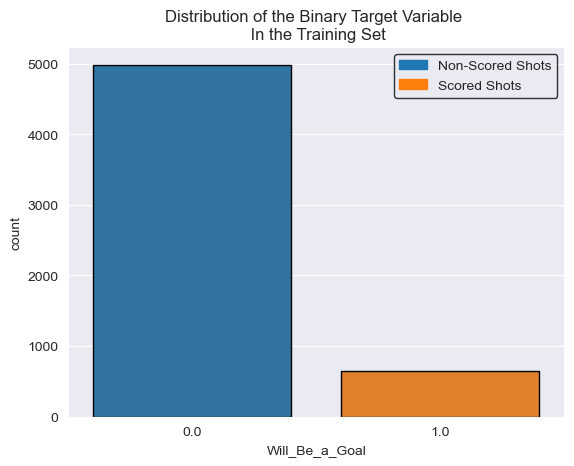

X       Y      Z      X1      X2      X3      X4      X5      X6  \
1882  4165.0   926.0   47.0 -5046.0 -3777.0 -4516.0 -3604.0  -477.0 -4299.0   
4280  4441.0   359.0  101.0 -3205.0    15.0  4376.0   501.0  4406.0   535.0   
1932  3902.0  2142.0   18.0 -5057.0 -3603.0 -3830.0 -3968.0 -3125.0 -4027.0   
6751  4539.0   951.0  222.0  2363.0 -2095.0 -2356.0 -3946.0 -3745.0 -2523.0   
890   3673.0   345.0   83.0  1373.0 -1457.0 -4260.0 -4341.0 -3668.0 -2725.0   
1489  4862.0 -1750.0   32.0  1713.0 -3552.0 -2522.0 -2395.0 -1915.0 -3607.0   
957   4017.0  3266.0   23.0 -4941.0 -2897.0 -4109.0 -3968.0 -3502.0 -4066.0   
6088  2888.0  1084.0   20.0 -3298.0  -305.0  2493.0   538.0  1703.0  3091.0   
6804  4205.0  1198.0   22.0 -5002.0 -4478.0  -972.0 -3827.0 -4267.0 -3169.0   
4627  3584.0  -341.0   42.0  4925.0  3500.0  3910.0  3954.0  3916.0   456.0   

          X7      X8      X9     X10     X11     X12     X13     X14     X15  \
1882 -4482.0 -4834.0 -1785.0 -1736.0 -4207.0  2436.0 -3965.0 -1843.0 -4166.0   
4280  1623.0  3408.0  2488.0  3125.0  3954.0  4378.0  4750.0  4157.0  3668.0   
1932 -4072.0 -2144.0 -3345.0 -3625.0 -3513.0  2669.0  -630.0 -2188.0 -3344.0   
6751 -4398.0 -4610.0 -4119.0 -3352.0 -3011.0 -5131.0 -4739.0 -4516.0 -3789.0   
890  -3682.0 -4181.0 -4248.0 -3737.0 -2662.0 -5063.0 -4004.0 -3695.0 -3948.0   
1489 -2549.0 -1068.0 -1299.0 -4234.0 -3760.0 -5041.0 -4083.0 -3770.0 -3635.0   
957  -4073.0 -2481.0 -3999.0 -3112.0 -3908.0  2615.0  -568.0 -1993.0 -3811.0   
6088  3244.0  -292.0  2906.0  2418.0  3676.0  4966.0  2296.0  3264.0 -1248.0   
6804 -4139.0 -4383.0 -4411.0 -4185.0 -3630.0  2629.0  -681.0 -2240.0  -224.0   
4627  3889.0  3695.0  3309.0  2234.0  2575.0 -3031.0  2992.0  3244.0  3840.0   

         X16     X17     X18     X19     X20     X21     X22     Y1      Y2  \
1882 -3829.0 -4490.0 -1558.0 -1228.0 -4487.0 -4666.0 -3402.0  206.0   633.0   
4280  4240.0  1346.0  4305.0  1743.0  3382.0  2507.0  -203.0  -73.0  -388.0   
1932 -2301.0 -3113.0 -3898.0  -785.0 -3297.0 -3784.0 -3875.0  216.0  1263.0   
6751 -4929.0 -4915.0 -4201.0 -4657.0 -4722.0 -4182.0 -5051.0   35.0  1193.0   
890  -4124.0 -3750.0 -4325.0 -3647.0 -4238.0 -3522.0 -4361.0   34.0    89.0   
1489 -2996.0 -4057.0 -4029.0 -1909.0 -1613.0 -4234.0 -3465.0 -515.0 -2277.0   
957  -3750.0  -931.0 -2238.0 -2007.0 -3117.0 -4024.0 -3799.0  206.0  1119.0   
6088   -81.0  2686.0  -625.0  3717.0  3625.0  3409.0  3039.0  244.0  1573.0   
6804 -4347.0 -4300.0 -4120.0 -1987.0 -4247.0 -2124.0 -3523.0  284.0   511.0   
4627  2052.0   270.0  1044.0  3769.0   208.0  3920.0  3349.0 -122.0 -1392.0   

          Y3      Y4      Y5      Y6      Y7      Y8      Y9     Y10     Y11  \
1882  -130.0 -1215.0  -628.0   107.0   352.0 -1574.0 -1233.0 -1851.0   639.0   
4280  -413.0   916.0   513.0 -1821.0  -157.0 -2244.0 -2190.0   702.0  1370.0   
1932 -1042.0  1467.0   468.0  -284.0  2041.0   863.0  3215.0   -62.0   344.0   
6751  -318.0  -400.0   969.0  -596.0  1117.0 -1628.0  1156.0   256.0 -1482.0   
890   -155.0   165.0  -679.0  -905.0 -1701.0   -98.0 -1425.0   197.0   522.0   
1489 -2208.0  -622.0 -1169.0  -633.0   767.0 -1641.0  -627.0   -90.0 -1783.0   
957   2406.0   532.0  2586.0  -606.0   -31.0  2450.0  2688.0 -1090.0  1444.0   
6088   131.0  1768.0   709.0 -1229.0  3158.0   203.0  1329.0  2646.0  1150.0   
6804   211.0  1111.0  1182.0   -43.0   365.0  1969.0  -113.0   -56.0  1593.0   
4627   653.0 -1468.0 -1226.0  -661.0  -656.0  -359.0  -899.0  -866.0   340.0   

        Y12     Y13     Y14     Y15     Y16     Y17     Y18     Y19     Y20  \
1882  -21.0  1143.0 -1444.0   365.0  -323.0  -353.0   409.0    -2.0    78.0   
4280  201.0   433.0 -1566.0   476.0   957.0   237.0  -535.0 -2976.0 -1887.0   
1932  133.0  1271.0  -269.0  -351.0   821.0  1991.0  2365.0   371.0 -1556.0   
6751  174.0    77.0   122.0 -1428.0   133.0  -240.0   577.0  -509.0   731.0   
890    29.0 -1209.0   495.0  -658.0  -588.0   219.0  -186.0  1424.0  -334.0   
1489 -452.0   324.0   542.0 -2278.0

In [2]:
Training_Shots_On_1_Same_Target_Goal_df = TPD4MFs.Read_Tracking_Data_4_Training_Shots_Frames_On_1_Same_Target_Goal_4_All_Models(  )

Training_Shots_On_1_Same_Target_Goal_df.head(10)

#### Test Set


 Loading & Reading In the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (2416, 122) 

∴ The Total Number of Shots Taken Throughout This Test Dataset  =  2416 

∴ The Total Number of Goals Scored Throughout This Test Dataset  =  280 

∴ The Total Number of Non-Scored Shots Throughout This Test Dataset  =  2136 



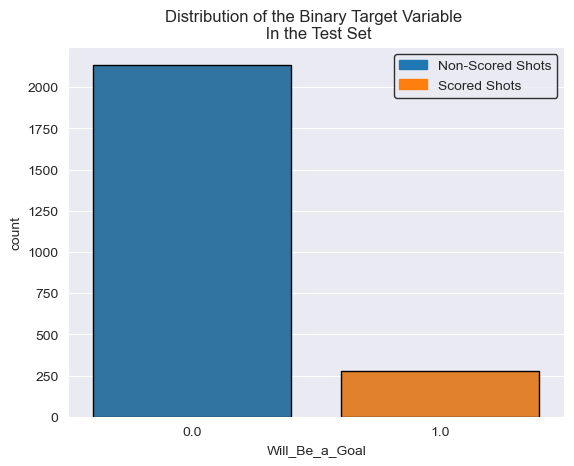

X       Y      Z      X1      X2      X3      X4      X5      X6  \
5412  4357.0  1362.0  200.0  2910.0 -1464.0 -2056.0  -673.0 -1403.0 -4586.0   
4642  3396.0   258.0   30.0  2924.0 -1328.0 -1979.0 -3465.0 -3708.0 -3448.0   
7652  4321.0   291.0   45.0  4440.0  -695.0  -190.0  -665.0   955.0  1464.0   
589   2842.0  1571.0   89.0  4995.0  2226.0  3913.0  3134.0   268.0  3611.0   
7214  4748.0  1798.0  447.0  1954.0 -3196.0 -4080.0 -4207.0 -4997.0 -4253.0   
4987  3584.0   876.0  132.0 -2622.0  3453.0  3648.0  4110.0  4183.0  1366.0   
1735  3773.0   863.0   44.0 -2391.0  1586.0  1760.0  3629.0   582.0  3829.0   
6952  4629.0  -562.0  209.0 -3153.0   477.0  2677.0   199.0  1629.0  4688.0   
7262  4432.0   485.0   52.0  4544.0    70.0  4408.0  3030.0  3828.0  2674.0   
3976  3254.0   132.0   20.0 -5114.0 -3939.0 -4068.0 -4122.0 -3982.0 -1611.0   

          X7      X8      X9     X10     X11     X12     X13     X14     X15  \
5412   -18.0 -2824.0 -3392.0 -4085.0 -2611.0 -5027.0 -3911.0 -1065.0 -3306.0   
4642  -203.0  -432.0 -3422.0 -2151.0 -3232.0 -4977.0 -3527.0 -1580.0 -2100.0   
7652  3161.0  4049.0  3697.0  -774.0  1642.0 -3508.0   276.0  -864.0  -419.0   
589   3696.0  1938.0  3614.0  3317.0  2873.0 -3222.0   690.0  3762.0   285.0   
7214 -2225.0 -4723.0 -3500.0 -4293.0 -3587.0 -5098.0 -4774.0 -3439.0 -4959.0   
4987  4074.0  1062.0  2380.0   778.0  2837.0  5033.0  3432.0  3430.0  4360.0   
1735   432.0  3482.0  4254.0  4014.0  3557.0  5044.0  4298.0   865.0  4219.0   
6952  3960.0   944.0  3987.0  2293.0  3713.0  4850.0  4614.0  2837.0  4190.0   
7262  4358.0  4276.0  2113.0  3468.0  4428.0 -2766.0  3104.0   170.0  1488.0   
3976 -3835.0 -2497.0 -3584.0 -3484.0 -3928.0  2518.0 -4016.0 -3712.0  -798.0   

         X16     X17     X18     X19     X20     X21     X22     Y1      Y2  \
5412 -2303.0 -3726.0 -4349.0 -2773.0 -1577.0 -3456.0 -1938.0   42.0 -2038.0   
4642 -3504.0 -3557.0 -3688.0 -3788.0 -3664.0 -3562.0 -2710.0    3.0  -551.0   
7652   177.0  2543.0   261.0   798.0  4147.0  -820.0  1868.0  309.0   306.0   
589    247.0  2540.0  1851.0  3400.0  2122.0  2845.0  3189.0  144.0  -370.0   
7214 -4328.0 -4185.0 -4838.0 -4755.0 -3511.0 -3897.0 -4189.0  159.0   297.0   
4987   862.0  3794.0  4258.0  3798.0  4174.0  2692.0  2534.0   52.0  1606.0   
1735  3929.0  3432.0  3874.0  3788.0  2109.0  2847.0  4272.0    2.0 -1877.0   
6952  1314.0  2962.0  4467.0  3740.0  4001.0    47.0  1951.0 -136.0 -1737.0   
7262  3651.0  3610.0    58.0  4046.0  3122.0  4062.0  1655.0  460.0   314.0   
3976 -2241.0 -1284.0 -3263.0 -1705.0 -3494.0 -3952.0 -3170.0   64.0   -48.0   

          Y3      Y4      Y5      Y6      Y7      Y8      Y9     Y10     Y11  \
5412  2306.0  1191.0   240.0  1442.0  -477.0  -155.0   708.0  -720.0 -2205.0   
4642   176.0 -2761.0  1634.0   699.0 -1239.0   464.0 -1158.0  1237.0   350.0   
7652  1253.0 -1050.0  1760.0   516.0  1699.0   202.0  -167.0   547.0 -1298.0   
589   1411.0  1941.0   861.0  1420.0   556.0  2104.0   -38.0  1529.0  1223.0   
7214  -189.0    69.0   580.0  3309.0   554.0   321.0   831.0  -699.0  -191.0   
4987  1082.0  2140.0   -50.0 -1432.0   568.0  -586.0  -322.0  -694.0   454.0   
1735  -327.0  1082.0   640.0  1557.0  -605.0 -1119.0  -304.0  -640.0  -318.0   
6952 -1502.0  -383.0 -2397.0  -938.0  -239.0  1127.0   624.0  -955.0 -2554.0   
7262   596.0   332.0   782.0  2476.0  -162.0  2008.0    86.0 -1344.0   151.0   
3976    58.0 -1335.0   166.0  1116.0    22.0  -330.0   122.0   -14.0   805.0   

        Y12     Y13     Y14     Y15     Y16     Y17     Y18     Y19     Y20  \
5412  188.0   147.0   779.0 -1651.0   945.0  -562.0   869.0   245.0  1563.0   
4642   31.0   441.0 -1372.0 -1164.0   276.0   272.0  -759.0  1307.0    86.0   
7652   35.0   295.0   548.0 -1577.0  1232.0    46.0  2259.0  1302.0   424.0   
589   286.0    64.0  2331.0  1686.0   703.0  2617.0   466.0   501.0  1535.0   
7214  155.0  -136.0  1980.0   445.0  -624.0  -156.0   219.0   643.0    24.0   
4987   72.0   612.0    73.0  1070.0

In [3]:
Test_Shots_On_1_Same_Target_Goal_df = TPD4MFs.Read_Tracking_Data_4_Test_Shots_Frames_On_1_Same_Target_Goal_4_All_Models(  )

Test_Shots_On_1_Same_Target_Goal_df.head(10)

___

### Data Augmentation (ONLY On Training Data)

- 8053 Shots & 933 Goals Scored, Overall (Training + Test Data) - NOT ENOUGH Data

- Perform Geometric Transformations $\rightarrow$ Mirroring the Field In the Y-Coordinate, To Simulate Shots From Symmetrical Positions

- Generate Synthetic Data By Slightly Modifying the Values of the Features

#### Perform Geometric Transformations $\rightarrow$ Mirroring the Field In the Y-Coordinate, To Simulate Shots From Symmetrical Positions

In [4]:
# Apply Geometric Y-Coordinate Flipping Transformation

y_Geometrically_Transformed_df = TPD4MFs.Apply_Geometric_Y_Coordinate_and_Velocity_Component_Flipping_Transformation( df = Training_Shots_On_1_Same_Target_Goal_df )

y_Geometrically_Transformed_df.shape


(5637, 122)

In [5]:
Goals_From_Geometric_Transformation = TPD4MFs.Count_Total_Goals_Scored( df = y_Geometrically_Transformed_df )

Goals_From_Geometric_Transformation

653

In [6]:
y_Geometrically_Transformed_df.head(10)

X       Y      Z      X1      X2      X3      X4      X5      X6  \
1882  4165.0  -926.0   47.0 -5046.0 -3777.0 -4516.0 -3604.0  -477.0 -4299.0   
4280  4441.0  -359.0  101.0 -3205.0    15.0  4376.0   501.0  4406.0   535.0   
1932  3902.0 -2142.0   18.0 -5057.0 -3603.0 -3830.0 -3968.0 -3125.0 -4027.0   
6751  4539.0  -951.0  222.0  2363.0 -2095.0 -2356.0 -3946.0 -3745.0 -2523.0   
890   3673.0  -345.0   83.0  1373.0 -1457.0 -4260.0 -4341.0 -3668.0 -2725.0   
1489  4862.0  1750.0   32.0  1713.0 -3552.0 -2522.0 -2395.0 -1915.0 -3607.0   
957   4017.0 -3266.0   23.0 -4941.0 -2897.0 -4109.0 -3968.0 -3502.0 -4066.0   
6088  2888.0 -1084.0   20.0 -3298.0  -305.0  2493.0   538.0  1703.0  3091.0   
6804  4205.0 -1198.0   22.0 -5002.0 -4478.0  -972.0 -3827.0 -4267.0 -3169.0   
4627  3584.0   341.0   42.0  4925.0  3500.0  3910.0  3954.0  3916.0   456.0   

          X7      X8      X9     X10     X11     X12     X13     X14     X15  \
1882 -4482.0 -4834.0 -1785.0 -1736.0 -4207.0  2436.0 -3965.0 -1843.0 -4166.0   
4280  1623.0  3408.0  2488.0  3125.0  3954.0  4378.0  4750.0  4157.0  3668.0   
1932 -4072.0 -2144.0 -3345.0 -3625.0 -3513.0  2669.0  -630.0 -2188.0 -3344.0   
6751 -4398.0 -4610.0 -4119.0 -3352.0 -3011.0 -5131.0 -4739.0 -4516.0 -3789.0   
890  -3682.0 -4181.0 -4248.0 -3737.0 -2662.0 -5063.0 -4004.0 -3695.0 -3948.0   
1489 -2549.0 -1068.0 -1299.0 -4234.0 -3760.0 -5041.0 -4083.0 -3770.0 -3635.0   
957  -4073.0 -2481.0 -3999.0 -3112.0 -3908.0  2615.0  -568.0 -1993.0 -3811.0   
6088  3244.0  -292.0  2906.0  2418.0  3676.0  4966.0  2296.0  3264.0 -1248.0   
6804 -4139.0 -4383.0 -4411.0 -4185.0 -3630.0  2629.0  -681.0 -2240.0  -224.0   
4627  3889.0  3695.0  3309.0  2234.0  2575.0 -3031.0  2992.0  3244.0  3840.0   

         X16     X17     X18     X19     X20     X21     X22     Y1      Y2  \
1882 -3829.0 -4490.0 -1558.0 -1228.0 -4487.0 -4666.0 -3402.0 -206.0  -633.0   
4280  4240.0  1346.0  4305.0  1743.0  3382.0  2507.0  -203.0   73.0   388.0   
1932 -2301.0 -3113.0 -3898.0  -785.0 -3297.0 -3784.0 -3875.0 -216.0 -1263.0   
6751 -4929.0 -4915.0 -4201.0 -4657.0 -4722.0 -4182.0 -5051.0  -35.0 -1193.0   
890  -4124.0 -3750.0 -4325.0 -3647.0 -4238.0 -3522.0 -4361.0  -34.0   -89.0   
1489 -2996.0 -4057.0 -4029.0 -1909.0 -1613.0 -4234.0 -3465.0  515.0  2277.0   
957  -3750.0  -931.0 -2238.0 -2007.0 -3117.0 -4024.0 -3799.0 -206.0 -1119.0   
6088   -81.0  2686.0  -625.0  3717.0  3625.0  3409.0  3039.0 -244.0 -1573.0   
6804 -4347.0 -4300.0 -4120.0 -1987.0 -4247.0 -2124.0 -3523.0 -284.0  -511.0   
4627  2052.0   270.0  1044.0  3769.0   208.0  3920.0  3349.0  122.0  1392.0   

          Y3      Y4      Y5      Y6      Y7      Y8      Y9     Y10     Y11  \
1882   130.0  1215.0   628.0  -107.0  -352.0  1574.0  1233.0  1851.0  -639.0   
4280   413.0  -916.0  -513.0  1821.0   157.0  2244.0  2190.0  -702.0 -1370.0   
1932  1042.0 -1467.0  -468.0   284.0 -2041.0  -863.0 -3215.0    62.0  -344.0   
6751   318.0   400.0  -969.0   596.0 -1117.0  1628.0 -1156.0  -256.0  1482.0   
890    155.0  -165.0   679.0   905.0  1701.0    98.0  1425.0  -197.0  -522.0   
1489  2208.0   622.0  1169.0   633.0  -767.0  1641.0   627.0    90.0  1783.0   
957  -2406.0  -532.0 -2586.0   606.0    31.0 -2450.0 -2688.0  1090.0 -1444.0   
6088  -131.0 -1768.0  -709.0  1229.0 -3158.0  -203.0 -1329.0 -2646.0 -1150.0   
6804  -211.0 -1111.0 -1182.0    43.0  -365.0 -1969.0   113.0    56.0 -1593.0   
4627  -653.0  1468.0  1226.0   661.0   656.0   359.0   899.0   866.0  -340.0   

        Y12     Y13     Y14     Y15     Y16     Y17     Y18     Y19     Y20  \
1882   21.0 -1143.0  1444.0  -365.0   323.0   353.0  -409.0     2.0   -78.0   
4280 -201.0  -433.0  1566.0  -476.0  -957.0  -237.0   535.0  2976.0  1887.0   
1932 -133.0 -1271.0   269.0   351.0  -821.0 -1991.0 -2365.0  -371.0  1556.0   
6751 -174.0   -77.0  -122.0  1428.0  -133.0   240.0  -577.0   509.0  -731.0   
890   -29.0  1209.0  -495.0   658.0   588.0  -219.0   186.0 -1424.0   334.0   
1489  452.0  -324.0  -542.0  2278.0

#### Generate Synthetic Data By Slightly Modifying the Values of the Features $\rightarrow$ For the Shots That Did End Up In a Goal & ∴ At the Same Time Balance Up the Class Labels

In [7]:
# Generate synthetic goals data

Synthetic_Shots_df = TPD4MFs.Generate_Synthetic_Shots_Data( df = Training_Shots_On_1_Same_Target_Goal_df, num_synthetic_samples = 38726,
                                                            x_std = 100, y_std = 100,
                                                            x_halfline = 0.0, x_max = 5250.0, y_min = -3400.0, y_max = 3400.0,
                                                            random_seed = 42 )

Synthetic_Shots_df.shape


(38726, 122)

In [8]:
Goals_From_Synthetic_Shots = TPD4MFs.Count_Total_Goals_Scored( df = Synthetic_Shots_df )

Goals_From_Synthetic_Shots

4486

In [9]:
Synthetic_Shots_df.head(10)

X            Y      Z           X1           X2      X3      X4  \
0  3824.544863  1404.914985   28.0 -3261.000000   270.000000  4673.0  2046.0   
1  3393.998819  3349.759217   13.0  4797.000000  3245.000000  2405.0   684.0   
2  1529.731581    52.542715   27.0 -1679.000000 -1689.000000 -1322.0 -1590.0   
3  5008.761199    16.921794   63.0 -2427.000000  4872.000000  4234.0   425.0   
4  4538.540529  2505.902674   45.0 -2611.000000  4045.000000  3083.0  4526.0   
5  3403.035704   179.395991   59.0 -4925.000000 -3626.000000  -224.0 -3133.0   
6  4612.120972   197.276613   48.0  4592.120972 -4364.000000 -3616.0  -317.0   
7  5010.709573  -205.593056   49.0  4873.000000  4990.709573  2658.0   -70.0   
8  4579.168170   651.834782  186.0 -4981.000000 -4728.000000 -1980.0  -248.0   
9  5250.000000  -241.872218   82.0  4894.000000  4496.000000  3898.0  4184.0   

       X5      X6      X7           X8      X9     X10     X11          X12  \
0   572.0  3961.0  2528.0  3804.544863  1383.0  3732.0  4421.0  5128.000000   
1  1133.0  3635.0  3764.0  3412.000000  2946.0  3528.0  2025.0 -2970.000000   
2 -1619.0 -1038.0 -1455.0  -821.000000 -3071.0 -1536.0 -2895.0  1509.731581   
3  4901.0  4683.0  5121.0  4873.000000  4988.0  3910.0  2997.0  5125.000000   
4  2473.0  3442.0  4608.0  4703.000000  4291.0  4322.0  4350.0  5047.000000   
5 -3991.0 -3361.0 -3878.0 -2674.000000 -3463.0 -3513.0 -2308.0  3383.035704   
6 -2571.0   -81.0 -2303.0 -1941.000000  -967.0 -5480.0 -4665.0 -4898.000000   
7  4180.0  4174.0  4414.0  4908.000000  -148.0  1164.0  4566.0 -3178.000000   
8 -4009.0 -4390.0 -4330.0    -0.000000 -1642.0 -4616.0 -5159.0  4559.168170   
9  1676.0   341.0  4605.0  4842.000000  1176.0  2193.0  5230.0 -3150.000000   

      X13          X14          X15          X16     X17     X18     X19  \
0  4373.0  3909.000000  4383.000000  1809.000000  3930.0   405.0  4359.0   
1  -126.0  3373.998819  -196.000000   922.000000  3774.0  3154.0   809.0   
2 -1668.0 -1498.000000 -4705.000000  -953.000000 -1086.0 -1438.0 -3113.0   
3  5183.0  5106.000000  4845.000000  4988.761199  4741.0  4886.0  3785.0   
4  4833.0  4673.000000  4518.540529  4743.000000  3933.0  4832.0  4964.0   
5  -422.0 -3586.000000 -2716.000000 -4017.000000 -3288.0 -3861.0 -3947.0   
6 -5147.0 -3000.000000 -4869.000000 -4841.000000   115.0 -4722.0 -3583.0   
7  3345.0  -261.000000   886.000000   500.000000  3590.0  4936.0  -344.0   
8  -498.0 -4489.000000 -2165.000000 -3840.000000 -2182.0 -1173.0   -13.0   
9   355.0  4463.000000  5255.000000  3501.000000  4854.0   220.0  2237.0   

      X20     X21     X22     Y1      Y2      Y3      Y4      Y5      Y6  \
0  2555.0  3730.0  3842.0   46.0  -411.0   115.0  1041.0   669.0   783.0   
1  3241.0  2858.0  3258.0  131.0  2658.0  1135.0   704.0  -593.0   702.0   
2 -3529.0 -4884.0 -1538.0  113.0    74.0  -210.0   117.0  -118.0   266.0   
3  4543.0  4378.0  4855.0 -156.0  -176.0  -567.0  -207.0   142.0 -1030.0   
4  4430.0  4389.0  4092.0  -64.0  -311.0 -1026.0  2809.0   281.0   597.0   
5 -3900.0  -401.0 -2186.0   39.0    92.0  1154.0  -208.0  -703.0   369.0   
6 -2197.0 -1614.0 -4434.0  253.0   -83.0  -617.0  1851.0  1815.0   222.0   
7  4814.0  1404.0  1563.0  328.0    58.0  1560.0  1038.0   801.0   508.0   
8 -4297.0 -3727.0 -4407.0  -42.0  -232.0  -437.0  -405.0  -776.0   350.0   
9  5236.0  1011.0  1023.0  484.0   254.0   646.0  -156.0  1807.0    34.0   

       Y7      Y8      Y9     Y10     Y11    Y12     Y13     Y14     Y15  \
0   222.0  1579.0 -1270.0 -1410.0   540.0  212.0   641.0   795.0   202.0   
1  2533.0  3205.0  1462.0   -16.0   -61.0  235.0  1213.0  3224.0  -182.0   
2    45.0  -232.0   835.0   268.0  -345.0  -38.0   195.0   128.0  1331.0   
3   129.0   639.0   780.0    67.0  -175.0  -55.0   166.0  -113.0  -349.0   
4   436.0   256.0  1117.0   223.0  2445.0   64.0   455.0   246.0  2203.0   
5   949.0  1492.0 -1076.0   460.0   270.0   36.0  -236.0 -2219.0 -1170.0   
6  1288.0   424.0  -697.0  1548.0   573.0  292.0   929.0

#### Concatenate Synthetic Shots Data Into 1 Augmented Combined DataFrame, & Shuffle the Rows/Shots

In [10]:
# Combine original, transformed and synthetic data

TPD4MFs.Create_Augmented_Training_Shots_Dataset( original_training_shots_df = Training_Shots_On_1_Same_Target_Goal_df, geometrically_transformed_shots_df = y_Geometrically_Transformed_df, synthetically_generated_shots_df = Synthetic_Shots_df,
                                                 random_seed = 42,
                                                 file_path = "xG Model/Data For xG Model/Augmented_Training_Shots_Frames_On_1_Same_Target_Goal_4_All_Models.parquet" )


 Augmented Training Data Concatenated & Randomly Shuffled  -->  Succesfully Saved In the 'Augmented_Training_Shots_Frames_On_1_Same_Target_Goal_4_All_Models.parquet' File  

_________________________________________________________________________________________________________________________________________________________________________________ 

 FINISHED  




 Loading & Reading In the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (50000, 122) 

∴ The Total Number of Shots Taken Throughout This Augmented Training Dataset  =  50000 

∴ The Total Number of Goals Scored Throughout This Augmented Training Dataset  =  5792 

∴ The Total Number of Non-Scored Shots Throughout This Augmented Training Dataset  =  44208 



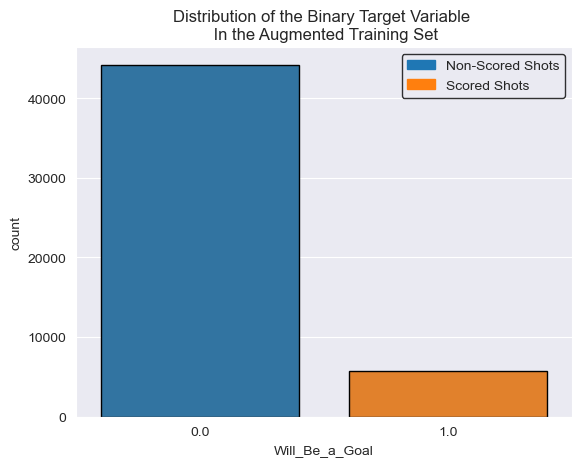

X            Y      Z      X1      X2      X3      X4  \
0  3954.164734    75.414643   50.0 -4992.0 -4512.0 -4055.0 -4177.0   
1  4460.000000  1030.000000   29.0 -3101.0  3656.0   -74.0  -261.0   
2  4032.000000 -2212.000000   28.0 -5079.0 -3960.0 -3093.0 -3665.0   
3  3587.352812   241.656470  203.0  4706.0  2700.0  2145.0  3922.0   
4  4179.662052   975.461169  112.0 -4900.0 -3425.0 -4674.0 -4298.0   
5   585.767493  -552.685648   67.0  4683.0  3234.0  1159.0  2825.0   
6  2030.000000  3118.000000   38.0  4376.0  1828.0  3199.0  2764.0   
7  1092.996139  2569.568005   16.0  4391.0  2344.0   -72.0  2751.0   
8  2868.000000   191.000000   52.0  5101.0  2521.0  3415.0  3536.0   
9  1370.437850  1238.581922   47.0  4608.0  2776.0  2806.0  2770.0   

           X5      X6      X7      X8      X9     X10     X11          X12  \
0 -4565.00000   937.0 -2354.0 -1806.0   358.0 -4784.0 -1440.0  3934.164734   
1  1037.00000  2840.0  4218.0  4277.0   702.0  3327.0  1215.0  4884.000000   
2 -2433.00000 -4054.0 -4307.0 -2596.0 -2852.0 -2460.0 -3930.0  2593.000000   
3   146.00000  3250.0  3890.0  -810.0  3689.0  -163.0 -1024.0 -3558.000000   
4 -4564.00000   158.0 -4484.0 -3376.0    38.0 -4178.0 -4125.0  4159.662052   
5   349.00000  2985.0  3217.0  2750.0  1766.0  2002.0  2775.0 -3071.000000   
6  3062.00000  1264.0  1964.0  2018.0  2121.0  2425.0   270.0 -2928.000000   
7  2211.00000   841.0   996.0  1297.0  1590.0   552.0  2154.0 -3473.000000   
8   413.00000  3908.0  4256.0  4319.0  3455.0  4036.0  4178.0 -3167.000000   
9  1350.43785  2605.0  2275.0  2378.0  2706.0  2712.0  2680.0 -2637.000000   

      X13          X14     X15     X16     X17     X18     X19          X20  \
0  1124.0   -22.000000  1096.0  -794.0 -4406.0 -4580.0  -864.0   688.000000   
1  2993.0   -45.000000  4297.0  1622.0  4143.0  4275.0  4335.0  3652.000000   
2 -2209.0 -2044.000000 -3678.0  -945.0 -3005.0 -3508.0  -634.0 -4005.000000   
3  -666.0  3567.352812   214.0  -748.0   262.0  1367.0 -1011.0  1292.000000   
4 -2150.0 -4461.000000 -2801.0 -1208.0  -140.0   532.0   497.0 -4384.000000   
5  1628.0  1506.000000  2925.0    21.0   353.0  1343.0  2878.0   565.767493   
6  1936.0  -316.000000  -194.0  2526.0   588.0  1424.0  2032.0  2211.000000   
7  2693.0  -174.000000   134.0  2543.0  1394.0  1297.0  -381.0  1072.996139   
8  4255.0  3509.000000  4228.0   168.0  3730.0   750.0   807.0  2619.000000   
9  2830.0  2812.000000  1350.0  2736.0  2711.0  2836.0  2796.0  1224.000000   

      X21     X22      Y1      Y2      Y3      Y4      Y5      Y6      Y7  \
0 -3817.0 -1157.0  -140.0  -442.0  -311.0    34.0   -58.0   -17.0 -1874.0   
1  1717.0  1513.0    -4.0   781.0   235.0 -1113.0 -1998.0  1011.0  1142.0   
2 -2716.0 -3533.0 -1010.0  -511.0 -1083.0   184.0 -3065.0 -1969.0 -2864.0   
3  1147.0  3926.0   -24.0  1925.0   -57.0   557.0  1031.0   613.0   130.0   
4 -3654.0 -1608.0   371.0   769.0    39.0   808.0   115.0   325.0   700.0   
5  3206.0  3062.0   -72.0  -711.0 -1129.0 -2017.0 -1760.0   908.0   -73.0   
6  2931.0  2264.0   264.0  2986.0  2307.0    -8.0  1756.0  -348.0  2593.0   
7  2757.0   692.0   240.0   340.0  1710.0  1752.0  2499.0  2028.0   177.0   
8  3081.0  4209.0    16.0 -2362.0   112.0  1023.0   213.0   136.0   296.0   
9  2092.0  2724.0    26.0  -567.0  -209.0   513.0  1184.0  -306.0   441.0   

       Y8      Y9     Y10     Y11    Y12     Y13     Y14     Y15     Y16  \
0   429.0 -1216.0  -803.0  -945.0 -112.0  -614.0 -2226.0 -1401.0   268.0   
1  -500.0  1742.0  -629.0 -1073.0  245.0  -229.0  -317.0  -481.0  -343.0   
2    89.0  1441.0  -548.0 -1268.0 -297.0 -2866.0 -1289.0 -2121.0   251.0   
3  -614.0  -705.0   625.0   -85.0  139.0   546.0   159.0  1821.0  -282.0   
4  1573.0 -1368.0   514.0    26.0  160.0   358.0   719.0  1308.0 -1866.0   
5   351.0   -54.0 -2181.0  -760.0 -224.0   701.0 -1912.0  -797.0  -503.0   
6  1509.0  2715.0  2626.0  1862.0  540.0  2804.0   713.0  2146.0  -406.0   
7  2324.0  1373.0  3051.0  -603.0  481.0   -76.0  2031.0 

In [11]:
Augmented_Training_Shots_On_1_Same_Target_Goal_df = TPD4MFs.Read_Tracking_Data_4_Augmented_Training_Shots_Frames_On_1_Same_Target_Goal_4_All_Models(  )

Augmented_Training_Shots_On_1_Same_Target_Goal_df.head(10)

___

### Create Distance & Angle Columns, from the Ball & Each Individual Player To the Target Goal

#### Ball Node-Features:

- Distance of Ball To Target Goal

- Angles That the Ball "Sees" the Target Goal

In [12]:
TPD4MFs.Adding_Distances_and_Angles_Between_Ball_and_Target_Goal( to_training_or_test_data = "training" )



 Loading & Reading In the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (50000, 122) 

Dimensions of the Augmented Final Version of the Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (50000, 125) 

 Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  -->  Succesfully Saved In the 'Augmented_Training_Shots_Frames_On_1_Same_Target_Goal_4_All_Models.parquet' File  

_________________________________________________________________________________________________________________________________________________________________________________ 

 FINISHED  




 Loading & Reading In the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (50000, 125) 

∴ The Total Number of Shots Taken Throughout This Augmented Training Dataset  =  50000 

∴ The Total Number of Goals Scored Throughout This Augmented Training Dataset  =  5792 

∴ The Total Number of Non-Scored Shots Throughout This Augmented Training Dataset  =  44208 



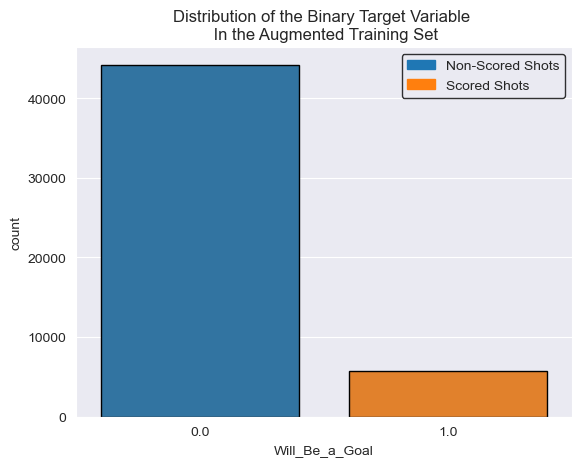

X            Y      Z      X1      X2      X3      X4  \
0  3954.164734    75.414643   50.0 -4992.0 -4512.0 -4055.0 -4177.0   
1  4460.000000  1030.000000   29.0 -3101.0  3656.0   -74.0  -261.0   
2  4032.000000 -2212.000000   28.0 -5079.0 -3960.0 -3093.0 -3665.0   
3  3587.352812   241.656470  203.0  4706.0  2700.0  2145.0  3922.0   
4  4179.662052   975.461169  112.0 -4900.0 -3425.0 -4674.0 -4298.0   
5   585.767493  -552.685648   67.0  4683.0  3234.0  1159.0  2825.0   
6  2030.000000  3118.000000   38.0  4376.0  1828.0  3199.0  2764.0   
7  1092.996139  2569.568005   16.0  4391.0  2344.0   -72.0  2751.0   
8  2868.000000   191.000000   52.0  5101.0  2521.0  3415.0  3536.0   
9  1370.437850  1238.581922   47.0  4608.0  2776.0  2806.0  2770.0   

           X5      X6      X7      X8      X9     X10     X11          X12  \
0 -4565.00000   937.0 -2354.0 -1806.0   358.0 -4784.0 -1440.0  3934.164734   
1  1037.00000  2840.0  4218.0  4277.0   702.0  3327.0  1215.0  4884.000000   
2 -2433.00000 -4054.0 -4307.0 -2596.0 -2852.0 -2460.0 -3930.0  2593.000000   
3   146.00000  3250.0  3890.0  -810.0  3689.0  -163.0 -1024.0 -3558.000000   
4 -4564.00000   158.0 -4484.0 -3376.0    38.0 -4178.0 -4125.0  4159.662052   
5   349.00000  2985.0  3217.0  2750.0  1766.0  2002.0  2775.0 -3071.000000   
6  3062.00000  1264.0  1964.0  2018.0  2121.0  2425.0   270.0 -2928.000000   
7  2211.00000   841.0   996.0  1297.0  1590.0   552.0  2154.0 -3473.000000   
8   413.00000  3908.0  4256.0  4319.0  3455.0  4036.0  4178.0 -3167.000000   
9  1350.43785  2605.0  2275.0  2378.0  2706.0  2712.0  2680.0 -2637.000000   

      X13          X14     X15     X16     X17     X18     X19          X20  \
0  1124.0   -22.000000  1096.0  -794.0 -4406.0 -4580.0  -864.0   688.000000   
1  2993.0   -45.000000  4297.0  1622.0  4143.0  4275.0  4335.0  3652.000000   
2 -2209.0 -2044.000000 -3678.0  -945.0 -3005.0 -3508.0  -634.0 -4005.000000   
3  -666.0  3567.352812   214.0  -748.0   262.0  1367.0 -1011.0  1292.000000   
4 -2150.0 -4461.000000 -2801.0 -1208.0  -140.0   532.0   497.0 -4384.000000   
5  1628.0  1506.000000  2925.0    21.0   353.0  1343.0  2878.0   565.767493   
6  1936.0  -316.000000  -194.0  2526.0   588.0  1424.0  2032.0  2211.000000   
7  2693.0  -174.000000   134.0  2543.0  1394.0  1297.0  -381.0  1072.996139   
8  4255.0  3509.000000  4228.0   168.0  3730.0   750.0   807.0  2619.000000   
9  2830.0  2812.000000  1350.0  2736.0  2711.0  2836.0  2796.0  1224.000000   

      X21     X22      Y1      Y2      Y3      Y4      Y5      Y6      Y7  \
0 -3817.0 -1157.0  -140.0  -442.0  -311.0    34.0   -58.0   -17.0 -1874.0   
1  1717.0  1513.0    -4.0   781.0   235.0 -1113.0 -1998.0  1011.0  1142.0   
2 -2716.0 -3533.0 -1010.0  -511.0 -1083.0   184.0 -3065.0 -1969.0 -2864.0   
3  1147.0  3926.0   -24.0  1925.0   -57.0   557.0  1031.0   613.0   130.0   
4 -3654.0 -1608.0   371.0   769.0    39.0   808.0   115.0   325.0   700.0   
5  3206.0  3062.0   -72.0  -711.0 -1129.0 -2017.0 -1760.0   908.0   -73.0   
6  2931.0  2264.0   264.0  2986.0  2307.0    -8.0  1756.0  -348.0  2593.0   
7  2757.0   692.0   240.0   340.0  1710.0  1752.0  2499.0  2028.0   177.0   
8  3081.0  4209.0    16.0 -2362.0   112.0  1023.0   213.0   136.0   296.0   
9  2092.0  2724.0    26.0  -567.0  -209.0   513.0  1184.0  -306.0   441.0   

       Y8      Y9     Y10     Y11    Y12     Y13     Y14     Y15     Y16  \
0   429.0 -1216.0  -803.0  -945.0 -112.0  -614.0 -2226.0 -1401.0   268.0   
1  -500.0  1742.0  -629.0 -1073.0  245.0  -229.0  -317.0  -481.0  -343.0   
2    89.0  1441.0  -548.0 -1268.0 -297.0 -2866.0 -1289.0 -2121.0   251.0   
3  -614.0  -705.0   625.0   -85.0  139.0   546.0   159.0  1821.0  -282.0   
4  1573.0 -1368.0   514.0    26.0  160.0   358.0   719.0  1308.0 -1866.0   
5   351.0   -54.0 -2181.0  -760.0 -224.0   701.0 -1912.0  -797.0  -503.0   
6  1509.0  2715.0  2626.0  1862.0  540.0  2804.0   713.0  2146.0  -406.0   
7  2324.0  1373.0  3051.0  -603.0  481.0   -76.0  2031.0 

In [14]:
Augmented_Shots_On_1_Same_Target_Goal_df = TPD4MFs.Read_Tracking_Data_4_Augmented_Training_Shots_Frames_On_1_Same_Target_Goal_4_All_Models(  )

Augmented_Shots_On_1_Same_Target_Goal_df.head(10)

In [15]:
TPD4MFs.Adding_Distances_and_Angles_Between_Ball_and_Target_Goal( to_training_or_test_data = "test" )



 Loading & Reading In the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (2416, 122) 

Dimensions of the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (2416, 125) 

 Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  -->  Succesfully Saved In the 'Test_Shots_Frames_On_1_Same_Target_Goal_4_All_Models.parquet' File  

_________________________________________________________________________________________________________________________________________________________________________________ 

 FINISHED  




 Loading & Reading In the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (2416, 125) 

∴ The Total Number of Shots Taken Throughout This Test Dataset  =  2416 

∴ The Total Number of Goals Scored Throughout This Test Dataset  =  280 

∴ The Total Number of Non-Scored Shots Throughout This Test Dataset  =  2136 



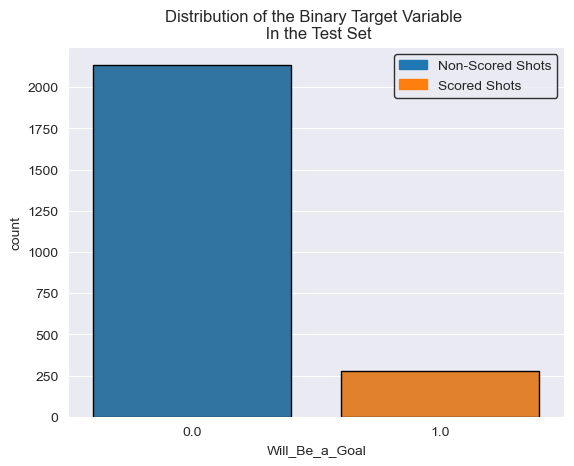

X       Y      Z      X1      X2      X3      X4      X5      X6  \
5412  4357.0  1362.0  200.0  2910.0 -1464.0 -2056.0  -673.0 -1403.0 -4586.0   
4642  3396.0   258.0   30.0  2924.0 -1328.0 -1979.0 -3465.0 -3708.0 -3448.0   
7652  4321.0   291.0   45.0  4440.0  -695.0  -190.0  -665.0   955.0  1464.0   
589   2842.0  1571.0   89.0  4995.0  2226.0  3913.0  3134.0   268.0  3611.0   
7214  4748.0  1798.0  447.0  1954.0 -3196.0 -4080.0 -4207.0 -4997.0 -4253.0   
4987  3584.0   876.0  132.0 -2622.0  3453.0  3648.0  4110.0  4183.0  1366.0   
1735  3773.0   863.0   44.0 -2391.0  1586.0  1760.0  3629.0   582.0  3829.0   
6952  4629.0  -562.0  209.0 -3153.0   477.0  2677.0   199.0  1629.0  4688.0   
7262  4432.0   485.0   52.0  4544.0    70.0  4408.0  3030.0  3828.0  2674.0   
3976  3254.0   132.0   20.0 -5114.0 -3939.0 -4068.0 -4122.0 -3982.0 -1611.0   

          X7      X8      X9     X10     X11     X12     X13     X14     X15  \
5412   -18.0 -2824.0 -3392.0 -4085.0 -2611.0 -5027.0 -3911.0 -1065.0 -3306.0   
4642  -203.0  -432.0 -3422.0 -2151.0 -3232.0 -4977.0 -3527.0 -1580.0 -2100.0   
7652  3161.0  4049.0  3697.0  -774.0  1642.0 -3508.0   276.0  -864.0  -419.0   
589   3696.0  1938.0  3614.0  3317.0  2873.0 -3222.0   690.0  3762.0   285.0   
7214 -2225.0 -4723.0 -3500.0 -4293.0 -3587.0 -5098.0 -4774.0 -3439.0 -4959.0   
4987  4074.0  1062.0  2380.0   778.0  2837.0  5033.0  3432.0  3430.0  4360.0   
1735   432.0  3482.0  4254.0  4014.0  3557.0  5044.0  4298.0   865.0  4219.0   
6952  3960.0   944.0  3987.0  2293.0  3713.0  4850.0  4614.0  2837.0  4190.0   
7262  4358.0  4276.0  2113.0  3468.0  4428.0 -2766.0  3104.0   170.0  1488.0   
3976 -3835.0 -2497.0 -3584.0 -3484.0 -3928.0  2518.0 -4016.0 -3712.0  -798.0   

         X16     X17     X18     X19     X20     X21     X22     Y1      Y2  \
5412 -2303.0 -3726.0 -4349.0 -2773.0 -1577.0 -3456.0 -1938.0   42.0 -2038.0   
4642 -3504.0 -3557.0 -3688.0 -3788.0 -3664.0 -3562.0 -2710.0    3.0  -551.0   
7652   177.0  2543.0   261.0   798.0  4147.0  -820.0  1868.0  309.0   306.0   
589    247.0  2540.0  1851.0  3400.0  2122.0  2845.0  3189.0  144.0  -370.0   
7214 -4328.0 -4185.0 -4838.0 -4755.0 -3511.0 -3897.0 -4189.0  159.0   297.0   
4987   862.0  3794.0  4258.0  3798.0  4174.0  2692.0  2534.0   52.0  1606.0   
1735  3929.0  3432.0  3874.0  3788.0  2109.0  2847.0  4272.0    2.0 -1877.0   
6952  1314.0  2962.0  4467.0  3740.0  4001.0    47.0  1951.0 -136.0 -1737.0   
7262  3651.0  3610.0    58.0  4046.0  3122.0  4062.0  1655.0  460.0   314.0   
3976 -2241.0 -1284.0 -3263.0 -1705.0 -3494.0 -3952.0 -3170.0   64.0   -48.0   

          Y3      Y4      Y5      Y6      Y7      Y8      Y9     Y10     Y11  \
5412  2306.0  1191.0   240.0  1442.0  -477.0  -155.0   708.0  -720.0 -2205.0   
4642   176.0 -2761.0  1634.0   699.0 -1239.0   464.0 -1158.0  1237.0   350.0   
7652  1253.0 -1050.0  1760.0   516.0  1699.0   202.0  -167.0   547.0 -1298.0   
589   1411.0  1941.0   861.0  1420.0   556.0  2104.0   -38.0  1529.0  1223.0   
7214  -189.0    69.0   580.0  3309.0   554.0   321.0   831.0  -699.0  -191.0   
4987  1082.0  2140.0   -50.0 -1432.0   568.0  -586.0  -322.0  -694.0   454.0   
1735  -327.0  1082.0   640.0  1557.0  -605.0 -1119.0  -304.0  -640.0  -318.0   
6952 -1502.0  -383.0 -2397.0  -938.0  -239.0  1127.0   624.0  -955.0 -2554.0   
7262   596.0   332.0   782.0  2476.0  -162.0  2008.0    86.0 -1344.0   151.0   
3976    58.0 -1335.0   166.0  1116.0    22.0  -330.0   122.0   -14.0   805.0   

        Y12     Y13     Y14     Y15     Y16     Y17     Y18     Y19     Y20  \
5412  188.0   147.0   779.0 -1651.0   945.0  -562.0   869.0   245.0  1563.0   
4642   31.0   441.0 -1372.0 -1164.0   276.0   272.0  -759.0  1307.0    86.0   
7652   35.0   295.0   548.0 -1577.0  1232.0    46.0  2259.0  1302.0   424.0   
589   286.0    64.0  2331.0  1686.0   703.0  2617.0   466.0   501.0  1535.0   
7214  155.0  -136.0  1980.0   445.0  -624.0  -156.0   219.0   643.0    24.0   
4987   72.0   612.0    73.0  1070.0

In [16]:
Test_Shots_On_1_Same_Target_Goal_df = TPD4MFs.Read_Tracking_Data_4_Test_Shots_Frames_On_1_Same_Target_Goal_4_All_Models(  )

Test_Shots_On_1_Same_Target_Goal_df.head(10)

#### Player Node-Features:

- Distance of Players To Target Goal

- Angles That Players "See" the Target Goal

- Binary Columns For Each Player Indicating Whether Their Team Was Currently In Possession of the Ball Or Not

In [17]:
TPD4MFs.Adding_Distances_and_Angles_Between_Players_and_Target_Goal( to_training_or_test_data = "training" )



 Loading & Reading In the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (50000, 125) 

Dimensions of the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (50000, 191) 

 Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  -->  Succesfully Saved In the 'Augmented_Training_Shots_Frames_On_1_Same_Target_Goal_4_All_Models.parquet' File  

_________________________________________________________________________________________________________________________________________________________________________________ 

 FINISHED  




 Loading & Reading In the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (50000, 191) 

∴ The Total Number of Shots Taken Throughout This Augmented Training Dataset  =  50000 

∴ The Total Number of Goals Scored Throughout This Augmented Training Dataset  =  5792 

∴ The Total Number of Non-Scored Shots Throughout This Augmented Training Dataset  =  44208 



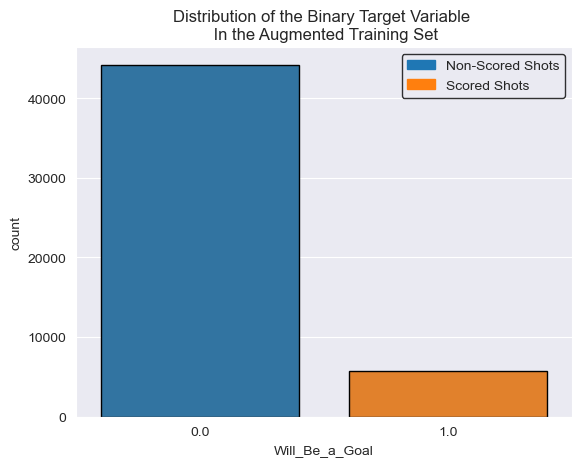

X            Y      Z      X1      X2      X3      X4  \
0  3954.164734    75.414643   50.0 -4992.0 -4512.0 -4055.0 -4177.0   
1  4460.000000  1030.000000   29.0 -3101.0  3656.0   -74.0  -261.0   
2  4032.000000 -2212.000000   28.0 -5079.0 -3960.0 -3093.0 -3665.0   
3  3587.352812   241.656470  203.0  4706.0  2700.0  2145.0  3922.0   
4  4179.662052   975.461169  112.0 -4900.0 -3425.0 -4674.0 -4298.0   
5   585.767493  -552.685648   67.0  4683.0  3234.0  1159.0  2825.0   
6  2030.000000  3118.000000   38.0  4376.0  1828.0  3199.0  2764.0   
7  1092.996139  2569.568005   16.0  4391.0  2344.0   -72.0  2751.0   
8  2868.000000   191.000000   52.0  5101.0  2521.0  3415.0  3536.0   
9  1370.437850  1238.581922   47.0  4608.0  2776.0  2806.0  2770.0   

           X5      X6      X7      X8      X9     X10     X11          X12  \
0 -4565.00000   937.0 -2354.0 -1806.0   358.0 -4784.0 -1440.0  3934.164734   
1  1037.00000  2840.0  4218.0  4277.0   702.0  3327.0  1215.0  4884.000000   
2 -2433.00000 -4054.0 -4307.0 -2596.0 -2852.0 -2460.0 -3930.0  2593.000000   
3   146.00000  3250.0  3890.0  -810.0  3689.0  -163.0 -1024.0 -3558.000000   
4 -4564.00000   158.0 -4484.0 -3376.0    38.0 -4178.0 -4125.0  4159.662052   
5   349.00000  2985.0  3217.0  2750.0  1766.0  2002.0  2775.0 -3071.000000   
6  3062.00000  1264.0  1964.0  2018.0  2121.0  2425.0   270.0 -2928.000000   
7  2211.00000   841.0   996.0  1297.0  1590.0   552.0  2154.0 -3473.000000   
8   413.00000  3908.0  4256.0  4319.0  3455.0  4036.0  4178.0 -3167.000000   
9  1350.43785  2605.0  2275.0  2378.0  2706.0  2712.0  2680.0 -2637.000000   

      X13          X14     X15     X16     X17     X18     X19          X20  \
0  1124.0   -22.000000  1096.0  -794.0 -4406.0 -4580.0  -864.0   688.000000   
1  2993.0   -45.000000  4297.0  1622.0  4143.0  4275.0  4335.0  3652.000000   
2 -2209.0 -2044.000000 -3678.0  -945.0 -3005.0 -3508.0  -634.0 -4005.000000   
3  -666.0  3567.352812   214.0  -748.0   262.0  1367.0 -1011.0  1292.000000   
4 -2150.0 -4461.000000 -2801.0 -1208.0  -140.0   532.0   497.0 -4384.000000   
5  1628.0  1506.000000  2925.0    21.0   353.0  1343.0  2878.0   565.767493   
6  1936.0  -316.000000  -194.0  2526.0   588.0  1424.0  2032.0  2211.000000   
7  2693.0  -174.000000   134.0  2543.0  1394.0  1297.0  -381.0  1072.996139   
8  4255.0  3509.000000  4228.0   168.0  3730.0   750.0   807.0  2619.000000   
9  2830.0  2812.000000  1350.0  2736.0  2711.0  2836.0  2796.0  1224.000000   

      X21     X22      Y1      Y2      Y3      Y4      Y5      Y6      Y7  \
0 -3817.0 -1157.0  -140.0  -442.0  -311.0    34.0   -58.0   -17.0 -1874.0   
1  1717.0  1513.0    -4.0   781.0   235.0 -1113.0 -1998.0  1011.0  1142.0   
2 -2716.0 -3533.0 -1010.0  -511.0 -1083.0   184.0 -3065.0 -1969.0 -2864.0   
3  1147.0  3926.0   -24.0  1925.0   -57.0   557.0  1031.0   613.0   130.0   
4 -3654.0 -1608.0   371.0   769.0    39.0   808.0   115.0   325.0   700.0   
5  3206.0  3062.0   -72.0  -711.0 -1129.0 -2017.0 -1760.0   908.0   -73.0   
6  2931.0  2264.0   264.0  2986.0  2307.0    -8.0  1756.0  -348.0  2593.0   
7  2757.0   692.0   240.0   340.0  1710.0  1752.0  2499.0  2028.0   177.0   
8  3081.0  4209.0    16.0 -2362.0   112.0  1023.0   213.0   136.0   296.0   
9  2092.0  2724.0    26.0  -567.0  -209.0   513.0  1184.0  -306.0   441.0   

       Y8      Y9     Y10     Y11    Y12     Y13     Y14     Y15     Y16  \
0   429.0 -1216.0  -803.0  -945.0 -112.0  -614.0 -2226.0 -1401.0   268.0   
1  -500.0  1742.0  -629.0 -1073.0  245.0  -229.0  -317.0  -481.0  -343.0   
2    89.0  1441.0  -548.0 -1268.0 -297.0 -2866.0 -1289.0 -2121.0   251.0   
3  -614.0  -705.0   625.0   -85.0  139.0   546.0   159.0  1821.0  -282.0   
4  1573.0 -1368.0   514.0    26.0  160.0   358.0   719.0  1308.0 -1866.0   
5   351.0   -54.0 -2181.0  -760.0 -224.0   701.0 -1912.0  -797.0  -503.0   
6  1509.0  2715.0  2626.0  1862.0  540.0  2804.0   713.0  2146.0  -406.0   
7  2324.0  1373.0  3051.0  -603.0  481.0   -76.0  2031.0 

In [18]:
Augmented_Shots_On_1_Same_Target_Goal_df = TPD4MFs.Read_Tracking_Data_4_Augmented_Training_Shots_Frames_On_1_Same_Target_Goal_4_All_Models(  )

Augmented_Shots_On_1_Same_Target_Goal_df.head(10)

In [19]:
TPD4MFs.Adding_Distances_and_Angles_Between_Players_and_Target_Goal( to_training_or_test_data = "test" )



 Loading & Reading In the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (2416, 125) 

Dimensions of the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (2416, 191) 

 Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  -->  Succesfully Saved In the 'Test_Shots_Frames_On_1_Same_Target_Goal_4_All_Models.parquet' File  

_________________________________________________________________________________________________________________________________________________________________________________ 

 FINISHED  




 Loading & Reading In the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (2416, 191) 

∴ The Total Number of Shots Taken Throughout This Test Dataset  =  2416 

∴ The Total Number of Goals Scored Throughout This Test Dataset  =  280 

∴ The Total Number of Non-Scored Shots Throughout This Test Dataset  =  2136 



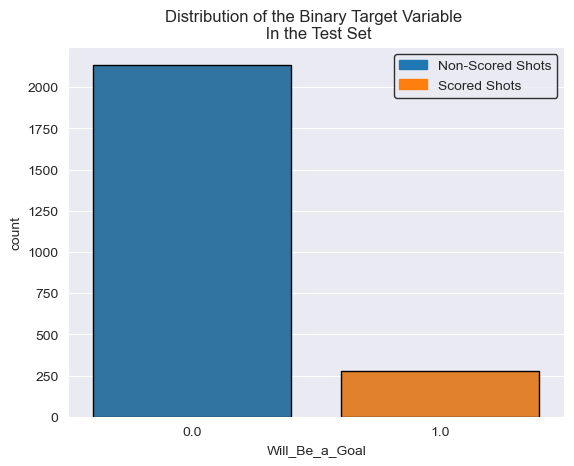

X       Y      Z      X1      X2      X3      X4      X5      X6  \
5412  4357.0  1362.0  200.0  2910.0 -1464.0 -2056.0  -673.0 -1403.0 -4586.0   
4642  3396.0   258.0   30.0  2924.0 -1328.0 -1979.0 -3465.0 -3708.0 -3448.0   
7652  4321.0   291.0   45.0  4440.0  -695.0  -190.0  -665.0   955.0  1464.0   
589   2842.0  1571.0   89.0  4995.0  2226.0  3913.0  3134.0   268.0  3611.0   
7214  4748.0  1798.0  447.0  1954.0 -3196.0 -4080.0 -4207.0 -4997.0 -4253.0   
4987  3584.0   876.0  132.0 -2622.0  3453.0  3648.0  4110.0  4183.0  1366.0   
1735  3773.0   863.0   44.0 -2391.0  1586.0  1760.0  3629.0   582.0  3829.0   
6952  4629.0  -562.0  209.0 -3153.0   477.0  2677.0   199.0  1629.0  4688.0   
7262  4432.0   485.0   52.0  4544.0    70.0  4408.0  3030.0  3828.0  2674.0   
3976  3254.0   132.0   20.0 -5114.0 -3939.0 -4068.0 -4122.0 -3982.0 -1611.0   

          X7      X8      X9     X10     X11     X12     X13     X14     X15  \
5412   -18.0 -2824.0 -3392.0 -4085.0 -2611.0 -5027.0 -3911.0 -1065.0 -3306.0   
4642  -203.0  -432.0 -3422.0 -2151.0 -3232.0 -4977.0 -3527.0 -1580.0 -2100.0   
7652  3161.0  4049.0  3697.0  -774.0  1642.0 -3508.0   276.0  -864.0  -419.0   
589   3696.0  1938.0  3614.0  3317.0  2873.0 -3222.0   690.0  3762.0   285.0   
7214 -2225.0 -4723.0 -3500.0 -4293.0 -3587.0 -5098.0 -4774.0 -3439.0 -4959.0   
4987  4074.0  1062.0  2380.0   778.0  2837.0  5033.0  3432.0  3430.0  4360.0   
1735   432.0  3482.0  4254.0  4014.0  3557.0  5044.0  4298.0   865.0  4219.0   
6952  3960.0   944.0  3987.0  2293.0  3713.0  4850.0  4614.0  2837.0  4190.0   
7262  4358.0  4276.0  2113.0  3468.0  4428.0 -2766.0  3104.0   170.0  1488.0   
3976 -3835.0 -2497.0 -3584.0 -3484.0 -3928.0  2518.0 -4016.0 -3712.0  -798.0   

         X16     X17     X18     X19     X20     X21     X22     Y1      Y2  \
5412 -2303.0 -3726.0 -4349.0 -2773.0 -1577.0 -3456.0 -1938.0   42.0 -2038.0   
4642 -3504.0 -3557.0 -3688.0 -3788.0 -3664.0 -3562.0 -2710.0    3.0  -551.0   
7652   177.0  2543.0   261.0   798.0  4147.0  -820.0  1868.0  309.0   306.0   
589    247.0  2540.0  1851.0  3400.0  2122.0  2845.0  3189.0  144.0  -370.0   
7214 -4328.0 -4185.0 -4838.0 -4755.0 -3511.0 -3897.0 -4189.0  159.0   297.0   
4987   862.0  3794.0  4258.0  3798.0  4174.0  2692.0  2534.0   52.0  1606.0   
1735  3929.0  3432.0  3874.0  3788.0  2109.0  2847.0  4272.0    2.0 -1877.0   
6952  1314.0  2962.0  4467.0  3740.0  4001.0    47.0  1951.0 -136.0 -1737.0   
7262  3651.0  3610.0    58.0  4046.0  3122.0  4062.0  1655.0  460.0   314.0   
3976 -2241.0 -1284.0 -3263.0 -1705.0 -3494.0 -3952.0 -3170.0   64.0   -48.0   

          Y3      Y4      Y5      Y6      Y7      Y8      Y9     Y10     Y11  \
5412  2306.0  1191.0   240.0  1442.0  -477.0  -155.0   708.0  -720.0 -2205.0   
4642   176.0 -2761.0  1634.0   699.0 -1239.0   464.0 -1158.0  1237.0   350.0   
7652  1253.0 -1050.0  1760.0   516.0  1699.0   202.0  -167.0   547.0 -1298.0   
589   1411.0  1941.0   861.0  1420.0   556.0  2104.0   -38.0  1529.0  1223.0   
7214  -189.0    69.0   580.0  3309.0   554.0   321.0   831.0  -699.0  -191.0   
4987  1082.0  2140.0   -50.0 -1432.0   568.0  -586.0  -322.0  -694.0   454.0   
1735  -327.0  1082.0   640.0  1557.0  -605.0 -1119.0  -304.0  -640.0  -318.0   
6952 -1502.0  -383.0 -2397.0  -938.0  -239.0  1127.0   624.0  -955.0 -2554.0   
7262   596.0   332.0   782.0  2476.0  -162.0  2008.0    86.0 -1344.0   151.0   
3976    58.0 -1335.0   166.0  1116.0    22.0  -330.0   122.0   -14.0   805.0   

        Y12     Y13     Y14     Y15     Y16     Y17     Y18     Y19     Y20  \
5412  188.0   147.0   779.0 -1651.0   945.0  -562.0   869.0   245.0  1563.0   
4642   31.0   441.0 -1372.0 -1164.0   276.0   272.0  -759.0  1307.0    86.0   
7652   35.0   295.0   548.0 -1577.0  1232.0    46.0  2259.0  1302.0   424.0   
589   286.0    64.0  2331.0  1686.0   703.0  2617.0   466.0   501.0  1535.0   
7214  155.0  -136.0  1980.0   445.0  -624.0  -156.0   219.0   643.0    24.0   
4987   72.0   612.0    73.0  1070.0

In [20]:
Test_Shots_On_1_Same_Target_Goal_df = TPD4MFs.Read_Tracking_Data_4_Test_Shots_Frames_On_1_Same_Target_Goal_4_All_Models(  )

Test_Shots_On_1_Same_Target_Goal_df.head(10)

In [2]:
TPD4MFs.Adding_Team_In_Possession_Binary_Indicator_For_Players_Columns( to_training_or_test_data = "training" )



 Loading & Reading In the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (50000, 675) 

Dimensions of the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (50000, 697) 

 Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  -->  Succesfully Saved In the 'Augmented_Training_Shots_Frames_On_1_Same_Target_Goal_4_All_Models.parquet' File  

_________________________________________________________________________________________________________________________________________________________________________________ 

 FINISHED  




 Loading & Reading In the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (50000, 697) 

∴ The Total Number of Shots Taken Throughout This Augmented Training Dataset  =  50000 

∴ The Total Number of Goals Scored Throughout This Augmented Training Dataset  =  5792 

∴ The Total Number of Non-Scored Shots Throughout This Augmented Training Dataset  =  44208 



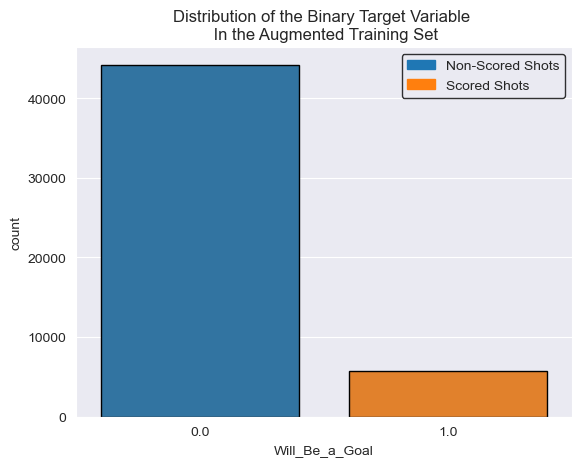

X            Y      Z      X1      X2      X3      X4  \
0  3954.164734    75.414643   50.0 -4992.0 -4512.0 -4055.0 -4177.0   
1  4460.000000  1030.000000   29.0 -3101.0  3656.0   -74.0  -261.0   
2  4032.000000 -2212.000000   28.0 -5079.0 -3960.0 -3093.0 -3665.0   
3  3587.352812   241.656470  203.0  4706.0  2700.0  2145.0  3922.0   
4  4179.662052   975.461169  112.0 -4900.0 -3425.0 -4674.0 -4298.0   
5   585.767493  -552.685648   67.0  4683.0  3234.0  1159.0  2825.0   
6  2030.000000  3118.000000   38.0  4376.0  1828.0  3199.0  2764.0   
7  1092.996139  2569.568005   16.0  4391.0  2344.0   -72.0  2751.0   
8  2868.000000   191.000000   52.0  5101.0  2521.0  3415.0  3536.0   
9  1370.437850  1238.581922   47.0  4608.0  2776.0  2806.0  2770.0   

           X5      X6      X7      X8      X9     X10     X11          X12  \
0 -4565.00000   937.0 -2354.0 -1806.0   358.0 -4784.0 -1440.0  3934.164734   
1  1037.00000  2840.0  4218.0  4277.0   702.0  3327.0  1215.0  4884.000000   
2 -2433.00000 -4054.0 -4307.0 -2596.0 -2852.0 -2460.0 -3930.0  2593.000000   
3   146.00000  3250.0  3890.0  -810.0  3689.0  -163.0 -1024.0 -3558.000000   
4 -4564.00000   158.0 -4484.0 -3376.0    38.0 -4178.0 -4125.0  4159.662052   
5   349.00000  2985.0  3217.0  2750.0  1766.0  2002.0  2775.0 -3071.000000   
6  3062.00000  1264.0  1964.0  2018.0  2121.0  2425.0   270.0 -2928.000000   
7  2211.00000   841.0   996.0  1297.0  1590.0   552.0  2154.0 -3473.000000   
8   413.00000  3908.0  4256.0  4319.0  3455.0  4036.0  4178.0 -3167.000000   
9  1350.43785  2605.0  2275.0  2378.0  2706.0  2712.0  2680.0 -2637.000000   

      X13          X14     X15     X16     X17     X18     X19          X20  \
0  1124.0   -22.000000  1096.0  -794.0 -4406.0 -4580.0  -864.0   688.000000   
1  2993.0   -45.000000  4297.0  1622.0  4143.0  4275.0  4335.0  3652.000000   
2 -2209.0 -2044.000000 -3678.0  -945.0 -3005.0 -3508.0  -634.0 -4005.000000   
3  -666.0  3567.352812   214.0  -748.0   262.0  1367.0 -1011.0  1292.000000   
4 -2150.0 -4461.000000 -2801.0 -1208.0  -140.0   532.0   497.0 -4384.000000   
5  1628.0  1506.000000  2925.0    21.0   353.0  1343.0  2878.0   565.767493   
6  1936.0  -316.000000  -194.0  2526.0   588.0  1424.0  2032.0  2211.000000   
7  2693.0  -174.000000   134.0  2543.0  1394.0  1297.0  -381.0  1072.996139   
8  4255.0  3509.000000  4228.0   168.0  3730.0   750.0   807.0  2619.000000   
9  2830.0  2812.000000  1350.0  2736.0  2711.0  2836.0  2796.0  1224.000000   

      X21     X22      Y1      Y2      Y3      Y4      Y5      Y6      Y7  \
0 -3817.0 -1157.0  -140.0  -442.0  -311.0    34.0   -58.0   -17.0 -1874.0   
1  1717.0  1513.0    -4.0   781.0   235.0 -1113.0 -1998.0  1011.0  1142.0   
2 -2716.0 -3533.0 -1010.0  -511.0 -1083.0   184.0 -3065.0 -1969.0 -2864.0   
3  1147.0  3926.0   -24.0  1925.0   -57.0   557.0  1031.0   613.0   130.0   
4 -3654.0 -1608.0   371.0   769.0    39.0   808.0   115.0   325.0   700.0   
5  3206.0  3062.0   -72.0  -711.0 -1129.0 -2017.0 -1760.0   908.0   -73.0   
6  2931.0  2264.0   264.0  2986.0  2307.0    -8.0  1756.0  -348.0  2593.0   
7  2757.0   692.0   240.0   340.0  1710.0  1752.0  2499.0  2028.0   177.0   
8  3081.0  4209.0    16.0 -2362.0   112.0  1023.0   213.0   136.0   296.0   
9  2092.0  2724.0    26.0  -567.0  -209.0   513.0  1184.0  -306.0   441.0   

       Y8      Y9     Y10     Y11    Y12     Y13     Y14     Y15     Y16  \
0   429.0 -1216.0  -803.0  -945.0 -112.0  -614.0 -2226.0 -1401.0   268.0   
1  -500.0  1742.0  -629.0 -1073.0  245.0  -229.0  -317.0  -481.0  -343.0   
2    89.0  1441.0  -548.0 -1268.0 -297.0 -2866.0 -1289.0 -2121.0   251.0   
3  -614.0  -705.0   625.0   -85.0  139.0   546.0   159.0  1821.0  -282.0   
4  1573.0 -1368.0   514.0    26.0  160.0   358.0   719.0  1308.0 -1866.0   
5   351.0   -54.0 -2181.0  -760.0 -224.0   701.0 -1912.0  -797.0  -503.0   
6  1509.0  2715.0  2626.0  1862.0  540.0  2804.0   713.0  2146.0  -406.0   
7  2324.0  1373.0  3051.0  -603.0  481.0   -76.0  2031.0 

In [3]:
Augmented_Shots_On_1_Same_Target_Goal_df = TPD4MFs.Read_Tracking_Data_4_Augmented_Training_Shots_Frames_On_1_Same_Target_Goal_4_All_Models(  )

Augmented_Shots_On_1_Same_Target_Goal_df.head(10)

In [4]:
TPD4MFs.Adding_Team_In_Possession_Binary_Indicator_For_Players_Columns( to_training_or_test_data = "test" )



 Loading & Reading In the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (2416, 675) 

Dimensions of the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (2416, 697) 

 Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  -->  Succesfully Saved In the 'Test_Shots_Frames_On_1_Same_Target_Goal_4_All_Models.parquet' File  

_________________________________________________________________________________________________________________________________________________________________________________ 

 FINISHED  




 Loading & Reading In the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (2416, 697) 

∴ The Total Number of Shots Taken Throughout This Test Dataset  =  2416 

∴ The Total Number of Goals Scored Throughout This Test Dataset  =  280 

∴ The Total Number of Non-Scored Shots Throughout This Test Dataset  =  2136 



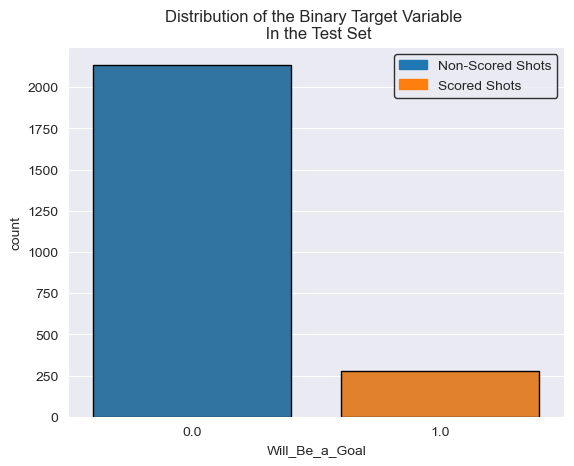

X       Y      Z      X1      X2      X3      X4      X5      X6  \
5412  4357.0  1362.0  200.0  2910.0 -1464.0 -2056.0  -673.0 -1403.0 -4586.0   
4642  3396.0   258.0   30.0  2924.0 -1328.0 -1979.0 -3465.0 -3708.0 -3448.0   
7652  4321.0   291.0   45.0  4440.0  -695.0  -190.0  -665.0   955.0  1464.0   
589   2842.0  1571.0   89.0  4995.0  2226.0  3913.0  3134.0   268.0  3611.0   
7214  4748.0  1798.0  447.0  1954.0 -3196.0 -4080.0 -4207.0 -4997.0 -4253.0   
4987  3584.0   876.0  132.0 -2622.0  3453.0  3648.0  4110.0  4183.0  1366.0   
1735  3773.0   863.0   44.0 -2391.0  1586.0  1760.0  3629.0   582.0  3829.0   
6952  4629.0  -562.0  209.0 -3153.0   477.0  2677.0   199.0  1629.0  4688.0   
7262  4432.0   485.0   52.0  4544.0    70.0  4408.0  3030.0  3828.0  2674.0   
3976  3254.0   132.0   20.0 -5114.0 -3939.0 -4068.0 -4122.0 -3982.0 -1611.0   

          X7      X8      X9     X10     X11     X12     X13     X14     X15  \
5412   -18.0 -2824.0 -3392.0 -4085.0 -2611.0 -5027.0 -3911.0 -1065.0 -3306.0   
4642  -203.0  -432.0 -3422.0 -2151.0 -3232.0 -4977.0 -3527.0 -1580.0 -2100.0   
7652  3161.0  4049.0  3697.0  -774.0  1642.0 -3508.0   276.0  -864.0  -419.0   
589   3696.0  1938.0  3614.0  3317.0  2873.0 -3222.0   690.0  3762.0   285.0   
7214 -2225.0 -4723.0 -3500.0 -4293.0 -3587.0 -5098.0 -4774.0 -3439.0 -4959.0   
4987  4074.0  1062.0  2380.0   778.0  2837.0  5033.0  3432.0  3430.0  4360.0   
1735   432.0  3482.0  4254.0  4014.0  3557.0  5044.0  4298.0   865.0  4219.0   
6952  3960.0   944.0  3987.0  2293.0  3713.0  4850.0  4614.0  2837.0  4190.0   
7262  4358.0  4276.0  2113.0  3468.0  4428.0 -2766.0  3104.0   170.0  1488.0   
3976 -3835.0 -2497.0 -3584.0 -3484.0 -3928.0  2518.0 -4016.0 -3712.0  -798.0   

         X16     X17     X18     X19     X20     X21     X22     Y1      Y2  \
5412 -2303.0 -3726.0 -4349.0 -2773.0 -1577.0 -3456.0 -1938.0   42.0 -2038.0   
4642 -3504.0 -3557.0 -3688.0 -3788.0 -3664.0 -3562.0 -2710.0    3.0  -551.0   
7652   177.0  2543.0   261.0   798.0  4147.0  -820.0  1868.0  309.0   306.0   
589    247.0  2540.0  1851.0  3400.0  2122.0  2845.0  3189.0  144.0  -370.0   
7214 -4328.0 -4185.0 -4838.0 -4755.0 -3511.0 -3897.0 -4189.0  159.0   297.0   
4987   862.0  3794.0  4258.0  3798.0  4174.0  2692.0  2534.0   52.0  1606.0   
1735  3929.0  3432.0  3874.0  3788.0  2109.0  2847.0  4272.0    2.0 -1877.0   
6952  1314.0  2962.0  4467.0  3740.0  4001.0    47.0  1951.0 -136.0 -1737.0   
7262  3651.0  3610.0    58.0  4046.0  3122.0  4062.0  1655.0  460.0   314.0   
3976 -2241.0 -1284.0 -3263.0 -1705.0 -3494.0 -3952.0 -3170.0   64.0   -48.0   

          Y3      Y4      Y5      Y6      Y7      Y8      Y9     Y10     Y11  \
5412  2306.0  1191.0   240.0  1442.0  -477.0  -155.0   708.0  -720.0 -2205.0   
4642   176.0 -2761.0  1634.0   699.0 -1239.0   464.0 -1158.0  1237.0   350.0   
7652  1253.0 -1050.0  1760.0   516.0  1699.0   202.0  -167.0   547.0 -1298.0   
589   1411.0  1941.0   861.0  1420.0   556.0  2104.0   -38.0  1529.0  1223.0   
7214  -189.0    69.0   580.0  3309.0   554.0   321.0   831.0  -699.0  -191.0   
4987  1082.0  2140.0   -50.0 -1432.0   568.0  -586.0  -322.0  -694.0   454.0   
1735  -327.0  1082.0   640.0  1557.0  -605.0 -1119.0  -304.0  -640.0  -318.0   
6952 -1502.0  -383.0 -2397.0  -938.0  -239.0  1127.0   624.0  -955.0 -2554.0   
7262   596.0   332.0   782.0  2476.0  -162.0  2008.0    86.0 -1344.0   151.0   
3976    58.0 -1335.0   166.0  1116.0    22.0  -330.0   122.0   -14.0   805.0   

        Y12     Y13     Y14     Y15     Y16     Y17     Y18     Y19     Y20  \
5412  188.0   147.0   779.0 -1651.0   945.0  -562.0   869.0   245.0  1563.0   
4642   31.0   441.0 -1372.0 -1164.0   276.0   272.0  -759.0  1307.0    86.0   
7652   35.0   295.0   548.0 -1577.0  1232.0    46.0  2259.0  1302.0   424.0   
589   286.0    64.0  2331.0  1686.0   703.0  2617.0   466.0   501.0  1535.0   
7214  155.0  -136.0  1980.0   445.0  -624.0  -156.0   219.0   643.0    24.0   
4987   72.0   612.0    73.0  1070.0

In [5]:
Test_Shots_On_1_Same_Target_Goal_df = TPD4MFs.Read_Tracking_Data_4_Test_Shots_Frames_On_1_Same_Target_Goal_4_All_Models(  )

Test_Shots_On_1_Same_Target_Goal_df.head(10)

___

### Create Distance Columns: Between the Ball & Players, and Between Players Themselves
### Create Same-Team Binary Flag/Indicator For Pairs of Players 

#### Edge-Features:

- Adding Distances Between the Ball & All Players

- Adding Distances Between All Players On the Pitch

- Same-Team Binary Flag/Indictor For Pairs of Players 

In [21]:
TPD4MFs.Adding_Distances_Between_Ball_and_Players( to_training_or_test_data = "training" )



 Loading & Reading In the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (50000, 191) 

Dimensions of the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (50000, 213) 

 Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  -->  Succesfully Saved In the 'Augmented_Training_Shots_Frames_On_1_Same_Target_Goal_4_All_Models.parquet' File  

_________________________________________________________________________________________________________________________________________________________________________________ 

 FINISHED  




 Loading & Reading In the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (50000, 213) 

∴ The Total Number of Shots Taken Throughout This Augmented Training Dataset  =  50000 

∴ The Total Number of Goals Scored Throughout This Augmented Training Dataset  =  5792 

∴ The Total Number of Non-Scored Shots Throughout This Augmented Training Dataset  =  44208 



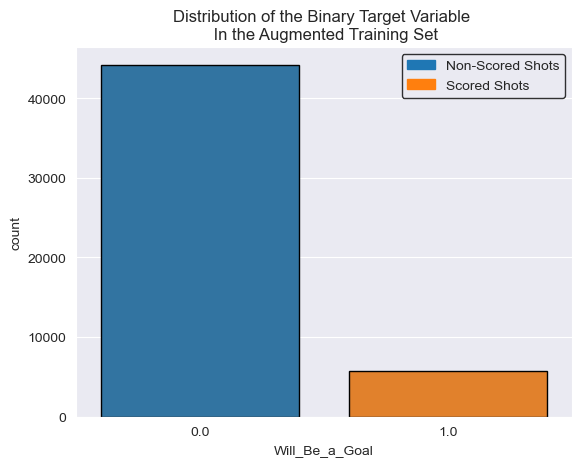

X            Y      Z      X1      X2      X3      X4  \
0  3954.164734    75.414643   50.0 -4992.0 -4512.0 -4055.0 -4177.0   
1  4460.000000  1030.000000   29.0 -3101.0  3656.0   -74.0  -261.0   
2  4032.000000 -2212.000000   28.0 -5079.0 -3960.0 -3093.0 -3665.0   
3  3587.352812   241.656470  203.0  4706.0  2700.0  2145.0  3922.0   
4  4179.662052   975.461169  112.0 -4900.0 -3425.0 -4674.0 -4298.0   
5   585.767493  -552.685648   67.0  4683.0  3234.0  1159.0  2825.0   
6  2030.000000  3118.000000   38.0  4376.0  1828.0  3199.0  2764.0   
7  1092.996139  2569.568005   16.0  4391.0  2344.0   -72.0  2751.0   
8  2868.000000   191.000000   52.0  5101.0  2521.0  3415.0  3536.0   
9  1370.437850  1238.581922   47.0  4608.0  2776.0  2806.0  2770.0   

           X5      X6      X7      X8      X9     X10     X11          X12  \
0 -4565.00000   937.0 -2354.0 -1806.0   358.0 -4784.0 -1440.0  3934.164734   
1  1037.00000  2840.0  4218.0  4277.0   702.0  3327.0  1215.0  4884.000000   
2 -2433.00000 -4054.0 -4307.0 -2596.0 -2852.0 -2460.0 -3930.0  2593.000000   
3   146.00000  3250.0  3890.0  -810.0  3689.0  -163.0 -1024.0 -3558.000000   
4 -4564.00000   158.0 -4484.0 -3376.0    38.0 -4178.0 -4125.0  4159.662052   
5   349.00000  2985.0  3217.0  2750.0  1766.0  2002.0  2775.0 -3071.000000   
6  3062.00000  1264.0  1964.0  2018.0  2121.0  2425.0   270.0 -2928.000000   
7  2211.00000   841.0   996.0  1297.0  1590.0   552.0  2154.0 -3473.000000   
8   413.00000  3908.0  4256.0  4319.0  3455.0  4036.0  4178.0 -3167.000000   
9  1350.43785  2605.0  2275.0  2378.0  2706.0  2712.0  2680.0 -2637.000000   

      X13          X14     X15     X16     X17     X18     X19          X20  \
0  1124.0   -22.000000  1096.0  -794.0 -4406.0 -4580.0  -864.0   688.000000   
1  2993.0   -45.000000  4297.0  1622.0  4143.0  4275.0  4335.0  3652.000000   
2 -2209.0 -2044.000000 -3678.0  -945.0 -3005.0 -3508.0  -634.0 -4005.000000   
3  -666.0  3567.352812   214.0  -748.0   262.0  1367.0 -1011.0  1292.000000   
4 -2150.0 -4461.000000 -2801.0 -1208.0  -140.0   532.0   497.0 -4384.000000   
5  1628.0  1506.000000  2925.0    21.0   353.0  1343.0  2878.0   565.767493   
6  1936.0  -316.000000  -194.0  2526.0   588.0  1424.0  2032.0  2211.000000   
7  2693.0  -174.000000   134.0  2543.0  1394.0  1297.0  -381.0  1072.996139   
8  4255.0  3509.000000  4228.0   168.0  3730.0   750.0   807.0  2619.000000   
9  2830.0  2812.000000  1350.0  2736.0  2711.0  2836.0  2796.0  1224.000000   

      X21     X22      Y1      Y2      Y3      Y4      Y5      Y6      Y7  \
0 -3817.0 -1157.0  -140.0  -442.0  -311.0    34.0   -58.0   -17.0 -1874.0   
1  1717.0  1513.0    -4.0   781.0   235.0 -1113.0 -1998.0  1011.0  1142.0   
2 -2716.0 -3533.0 -1010.0  -511.0 -1083.0   184.0 -3065.0 -1969.0 -2864.0   
3  1147.0  3926.0   -24.0  1925.0   -57.0   557.0  1031.0   613.0   130.0   
4 -3654.0 -1608.0   371.0   769.0    39.0   808.0   115.0   325.0   700.0   
5  3206.0  3062.0   -72.0  -711.0 -1129.0 -2017.0 -1760.0   908.0   -73.0   
6  2931.0  2264.0   264.0  2986.0  2307.0    -8.0  1756.0  -348.0  2593.0   
7  2757.0   692.0   240.0   340.0  1710.0  1752.0  2499.0  2028.0   177.0   
8  3081.0  4209.0    16.0 -2362.0   112.0  1023.0   213.0   136.0   296.0   
9  2092.0  2724.0    26.0  -567.0  -209.0   513.0  1184.0  -306.0   441.0   

       Y8      Y9     Y10     Y11    Y12     Y13     Y14     Y15     Y16  \
0   429.0 -1216.0  -803.0  -945.0 -112.0  -614.0 -2226.0 -1401.0   268.0   
1  -500.0  1742.0  -629.0 -1073.0  245.0  -229.0  -317.0  -481.0  -343.0   
2    89.0  1441.0  -548.0 -1268.0 -297.0 -2866.0 -1289.0 -2121.0   251.0   
3  -614.0  -705.0   625.0   -85.0  139.0   546.0   159.0  1821.0  -282.0   
4  1573.0 -1368.0   514.0    26.0  160.0   358.0   719.0  1308.0 -1866.0   
5   351.0   -54.0 -2181.0  -760.0 -224.0   701.0 -1912.0  -797.0  -503.0   
6  1509.0  2715.0  2626.0  1862.0  540.0  2804.0   713.0  2146.0  -406.0   
7  2324.0  1373.0  3051.0  -603.0  481.0   -76.0  2031.0 

In [22]:
Augmented_Shots_On_1_Same_Target_Goal_df = TPD4MFs.Read_Tracking_Data_4_Augmented_Training_Shots_Frames_On_1_Same_Target_Goal_4_All_Models(  )

Augmented_Shots_On_1_Same_Target_Goal_df.head(10)

In [23]:
TPD4MFs.Adding_Distances_Between_Ball_and_Players( to_training_or_test_data = "test" )



 Loading & Reading In the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (2416, 191) 

Dimensions of the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (2416, 213) 

 Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  -->  Succesfully Saved In the 'Test_Shots_Frames_On_1_Same_Target_Goal_4_All_Models.parquet' File  

_________________________________________________________________________________________________________________________________________________________________________________ 

 FINISHED  




 Loading & Reading In the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (2416, 213) 

∴ The Total Number of Shots Taken Throughout This Test Dataset  =  2416 

∴ The Total Number of Goals Scored Throughout This Test Dataset  =  280 

∴ The Total Number of Non-Scored Shots Throughout This Test Dataset  =  2136 



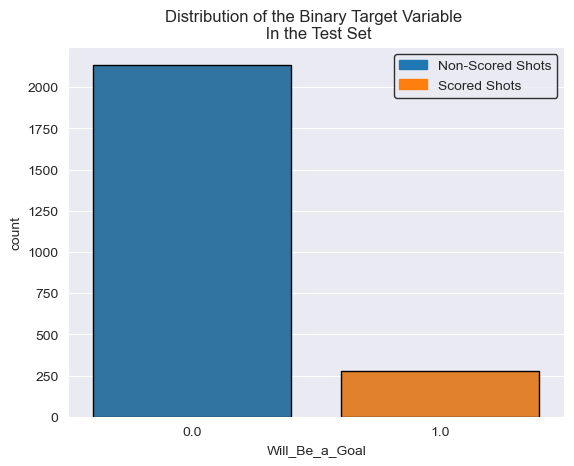

X       Y      Z      X1      X2      X3      X4      X5      X6  \
5412  4357.0  1362.0  200.0  2910.0 -1464.0 -2056.0  -673.0 -1403.0 -4586.0   
4642  3396.0   258.0   30.0  2924.0 -1328.0 -1979.0 -3465.0 -3708.0 -3448.0   
7652  4321.0   291.0   45.0  4440.0  -695.0  -190.0  -665.0   955.0  1464.0   
589   2842.0  1571.0   89.0  4995.0  2226.0  3913.0  3134.0   268.0  3611.0   
7214  4748.0  1798.0  447.0  1954.0 -3196.0 -4080.0 -4207.0 -4997.0 -4253.0   
4987  3584.0   876.0  132.0 -2622.0  3453.0  3648.0  4110.0  4183.0  1366.0   
1735  3773.0   863.0   44.0 -2391.0  1586.0  1760.0  3629.0   582.0  3829.0   
6952  4629.0  -562.0  209.0 -3153.0   477.0  2677.0   199.0  1629.0  4688.0   
7262  4432.0   485.0   52.0  4544.0    70.0  4408.0  3030.0  3828.0  2674.0   
3976  3254.0   132.0   20.0 -5114.0 -3939.0 -4068.0 -4122.0 -3982.0 -1611.0   

          X7      X8      X9     X10     X11     X12     X13     X14     X15  \
5412   -18.0 -2824.0 -3392.0 -4085.0 -2611.0 -5027.0 -3911.0 -1065.0 -3306.0   
4642  -203.0  -432.0 -3422.0 -2151.0 -3232.0 -4977.0 -3527.0 -1580.0 -2100.0   
7652  3161.0  4049.0  3697.0  -774.0  1642.0 -3508.0   276.0  -864.0  -419.0   
589   3696.0  1938.0  3614.0  3317.0  2873.0 -3222.0   690.0  3762.0   285.0   
7214 -2225.0 -4723.0 -3500.0 -4293.0 -3587.0 -5098.0 -4774.0 -3439.0 -4959.0   
4987  4074.0  1062.0  2380.0   778.0  2837.0  5033.0  3432.0  3430.0  4360.0   
1735   432.0  3482.0  4254.0  4014.0  3557.0  5044.0  4298.0   865.0  4219.0   
6952  3960.0   944.0  3987.0  2293.0  3713.0  4850.0  4614.0  2837.0  4190.0   
7262  4358.0  4276.0  2113.0  3468.0  4428.0 -2766.0  3104.0   170.0  1488.0   
3976 -3835.0 -2497.0 -3584.0 -3484.0 -3928.0  2518.0 -4016.0 -3712.0  -798.0   

         X16     X17     X18     X19     X20     X21     X22     Y1      Y2  \
5412 -2303.0 -3726.0 -4349.0 -2773.0 -1577.0 -3456.0 -1938.0   42.0 -2038.0   
4642 -3504.0 -3557.0 -3688.0 -3788.0 -3664.0 -3562.0 -2710.0    3.0  -551.0   
7652   177.0  2543.0   261.0   798.0  4147.0  -820.0  1868.0  309.0   306.0   
589    247.0  2540.0  1851.0  3400.0  2122.0  2845.0  3189.0  144.0  -370.0   
7214 -4328.0 -4185.0 -4838.0 -4755.0 -3511.0 -3897.0 -4189.0  159.0   297.0   
4987   862.0  3794.0  4258.0  3798.0  4174.0  2692.0  2534.0   52.0  1606.0   
1735  3929.0  3432.0  3874.0  3788.0  2109.0  2847.0  4272.0    2.0 -1877.0   
6952  1314.0  2962.0  4467.0  3740.0  4001.0    47.0  1951.0 -136.0 -1737.0   
7262  3651.0  3610.0    58.0  4046.0  3122.0  4062.0  1655.0  460.0   314.0   
3976 -2241.0 -1284.0 -3263.0 -1705.0 -3494.0 -3952.0 -3170.0   64.0   -48.0   

          Y3      Y4      Y5      Y6      Y7      Y8      Y9     Y10     Y11  \
5412  2306.0  1191.0   240.0  1442.0  -477.0  -155.0   708.0  -720.0 -2205.0   
4642   176.0 -2761.0  1634.0   699.0 -1239.0   464.0 -1158.0  1237.0   350.0   
7652  1253.0 -1050.0  1760.0   516.0  1699.0   202.0  -167.0   547.0 -1298.0   
589   1411.0  1941.0   861.0  1420.0   556.0  2104.0   -38.0  1529.0  1223.0   
7214  -189.0    69.0   580.0  3309.0   554.0   321.0   831.0  -699.0  -191.0   
4987  1082.0  2140.0   -50.0 -1432.0   568.0  -586.0  -322.0  -694.0   454.0   
1735  -327.0  1082.0   640.0  1557.0  -605.0 -1119.0  -304.0  -640.0  -318.0   
6952 -1502.0  -383.0 -2397.0  -938.0  -239.0  1127.0   624.0  -955.0 -2554.0   
7262   596.0   332.0   782.0  2476.0  -162.0  2008.0    86.0 -1344.0   151.0   
3976    58.0 -1335.0   166.0  1116.0    22.0  -330.0   122.0   -14.0   805.0   

        Y12     Y13     Y14     Y15     Y16     Y17     Y18     Y19     Y20  \
5412  188.0   147.0   779.0 -1651.0   945.0  -562.0   869.0   245.0  1563.0   
4642   31.0   441.0 -1372.0 -1164.0   276.0   272.0  -759.0  1307.0    86.0   
7652   35.0   295.0   548.0 -1577.0  1232.0    46.0  2259.0  1302.0   424.0   
589   286.0    64.0  2331.0  1686.0   703.0  2617.0   466.0   501.0  1535.0   
7214  155.0  -136.0  1980.0   445.0  -624.0  -156.0   219.0   643.0    24.0   
4987   72.0   612.0    73.0  1070.0

In [24]:
Test_Shots_On_1_Same_Target_Goal_df = TPD4MFs.Read_Tracking_Data_4_Test_Shots_Frames_On_1_Same_Target_Goal_4_All_Models(  )

Test_Shots_On_1_Same_Target_Goal_df.head(10)

In [25]:
TPD4MFs.Adding_Distances_Between_Players_Themselves( to_training_or_test_data = "training" )



 Loading & Reading In the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (50000, 213) 

Dimensions of the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (50000, 444) 

 Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  -->  Succesfully Saved In the 'Augmented_Training_Shots_Frames_On_1_Same_Target_Goal_4_All_Models.parquet' File  

_________________________________________________________________________________________________________________________________________________________________________________ 

 FINISHED  




 Loading & Reading In the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (50000, 444) 

∴ The Total Number of Shots Taken Throughout This Augmented Training Dataset  =  50000 

∴ The Total Number of Goals Scored Throughout This Augmented Training Dataset  =  5792 

∴ The Total Number of Non-Scored Shots Throughout This Augmented Training Dataset  =  44208 



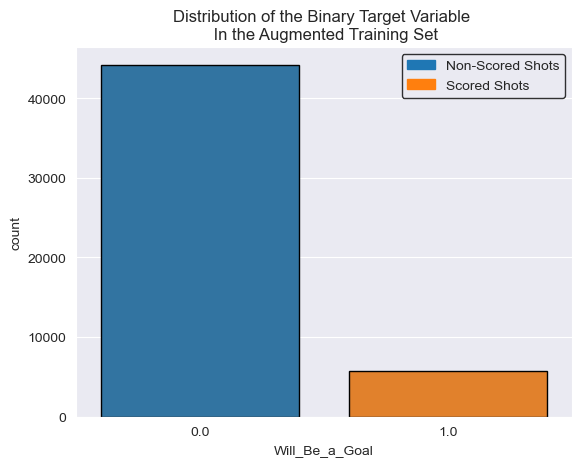

X            Y      Z      X1      X2      X3      X4  \
0  3954.164734    75.414643   50.0 -4992.0 -4512.0 -4055.0 -4177.0   
1  4460.000000  1030.000000   29.0 -3101.0  3656.0   -74.0  -261.0   
2  4032.000000 -2212.000000   28.0 -5079.0 -3960.0 -3093.0 -3665.0   
3  3587.352812   241.656470  203.0  4706.0  2700.0  2145.0  3922.0   
4  4179.662052   975.461169  112.0 -4900.0 -3425.0 -4674.0 -4298.0   
5   585.767493  -552.685648   67.0  4683.0  3234.0  1159.0  2825.0   
6  2030.000000  3118.000000   38.0  4376.0  1828.0  3199.0  2764.0   
7  1092.996139  2569.568005   16.0  4391.0  2344.0   -72.0  2751.0   
8  2868.000000   191.000000   52.0  5101.0  2521.0  3415.0  3536.0   
9  1370.437850  1238.581922   47.0  4608.0  2776.0  2806.0  2770.0   

           X5      X6      X7      X8      X9     X10     X11          X12  \
0 -4565.00000   937.0 -2354.0 -1806.0   358.0 -4784.0 -1440.0  3934.164734   
1  1037.00000  2840.0  4218.0  4277.0   702.0  3327.0  1215.0  4884.000000   
2 -2433.00000 -4054.0 -4307.0 -2596.0 -2852.0 -2460.0 -3930.0  2593.000000   
3   146.00000  3250.0  3890.0  -810.0  3689.0  -163.0 -1024.0 -3558.000000   
4 -4564.00000   158.0 -4484.0 -3376.0    38.0 -4178.0 -4125.0  4159.662052   
5   349.00000  2985.0  3217.0  2750.0  1766.0  2002.0  2775.0 -3071.000000   
6  3062.00000  1264.0  1964.0  2018.0  2121.0  2425.0   270.0 -2928.000000   
7  2211.00000   841.0   996.0  1297.0  1590.0   552.0  2154.0 -3473.000000   
8   413.00000  3908.0  4256.0  4319.0  3455.0  4036.0  4178.0 -3167.000000   
9  1350.43785  2605.0  2275.0  2378.0  2706.0  2712.0  2680.0 -2637.000000   

      X13          X14     X15     X16     X17     X18     X19          X20  \
0  1124.0   -22.000000  1096.0  -794.0 -4406.0 -4580.0  -864.0   688.000000   
1  2993.0   -45.000000  4297.0  1622.0  4143.0  4275.0  4335.0  3652.000000   
2 -2209.0 -2044.000000 -3678.0  -945.0 -3005.0 -3508.0  -634.0 -4005.000000   
3  -666.0  3567.352812   214.0  -748.0   262.0  1367.0 -1011.0  1292.000000   
4 -2150.0 -4461.000000 -2801.0 -1208.0  -140.0   532.0   497.0 -4384.000000   
5  1628.0  1506.000000  2925.0    21.0   353.0  1343.0  2878.0   565.767493   
6  1936.0  -316.000000  -194.0  2526.0   588.0  1424.0  2032.0  2211.000000   
7  2693.0  -174.000000   134.0  2543.0  1394.0  1297.0  -381.0  1072.996139   
8  4255.0  3509.000000  4228.0   168.0  3730.0   750.0   807.0  2619.000000   
9  2830.0  2812.000000  1350.0  2736.0  2711.0  2836.0  2796.0  1224.000000   

      X21     X22      Y1      Y2      Y3      Y4      Y5      Y6      Y7  \
0 -3817.0 -1157.0  -140.0  -442.0  -311.0    34.0   -58.0   -17.0 -1874.0   
1  1717.0  1513.0    -4.0   781.0   235.0 -1113.0 -1998.0  1011.0  1142.0   
2 -2716.0 -3533.0 -1010.0  -511.0 -1083.0   184.0 -3065.0 -1969.0 -2864.0   
3  1147.0  3926.0   -24.0  1925.0   -57.0   557.0  1031.0   613.0   130.0   
4 -3654.0 -1608.0   371.0   769.0    39.0   808.0   115.0   325.0   700.0   
5  3206.0  3062.0   -72.0  -711.0 -1129.0 -2017.0 -1760.0   908.0   -73.0   
6  2931.0  2264.0   264.0  2986.0  2307.0    -8.0  1756.0  -348.0  2593.0   
7  2757.0   692.0   240.0   340.0  1710.0  1752.0  2499.0  2028.0   177.0   
8  3081.0  4209.0    16.0 -2362.0   112.0  1023.0   213.0   136.0   296.0   
9  2092.0  2724.0    26.0  -567.0  -209.0   513.0  1184.0  -306.0   441.0   

       Y8      Y9     Y10     Y11    Y12     Y13     Y14     Y15     Y16  \
0   429.0 -1216.0  -803.0  -945.0 -112.0  -614.0 -2226.0 -1401.0   268.0   
1  -500.0  1742.0  -629.0 -1073.0  245.0  -229.0  -317.0  -481.0  -343.0   
2    89.0  1441.0  -548.0 -1268.0 -297.0 -2866.0 -1289.0 -2121.0   251.0   
3  -614.0  -705.0   625.0   -85.0  139.0   546.0   159.0  1821.0  -282.0   
4  1573.0 -1368.0   514.0    26.0  160.0   358.0   719.0  1308.0 -1866.0   
5   351.0   -54.0 -2181.0  -760.0 -224.0   701.0 -1912.0  -797.0  -503.0   
6  1509.0  2715.0  2626.0  1862.0  540.0  2804.0   713.0  2146.0  -406.0   
7  2324.0  1373.0  3051.0  -603.0  481.0   -76.0  2031.0 

In [26]:
Augmented_Shots_On_1_Same_Target_Goal_df = TPD4MFs.Read_Tracking_Data_4_Augmented_Training_Shots_Frames_On_1_Same_Target_Goal_4_All_Models(  )

Augmented_Shots_On_1_Same_Target_Goal_df.head(10)

In [27]:
TPD4MFs.Adding_Distances_Between_Players_Themselves( to_training_or_test_data = "test" )



 Loading & Reading In the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (2416, 213) 

Dimensions of the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (2416, 444) 

 Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  -->  Succesfully Saved In the 'Test_Shots_Frames_On_1_Same_Target_Goal_4_All_Models.parquet' File  

_________________________________________________________________________________________________________________________________________________________________________________ 

 FINISHED  




 Loading & Reading In the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (2416, 444) 

∴ The Total Number of Shots Taken Throughout This Test Dataset  =  2416 

∴ The Total Number of Goals Scored Throughout This Test Dataset  =  280 

∴ The Total Number of Non-Scored Shots Throughout This Test Dataset  =  2136 



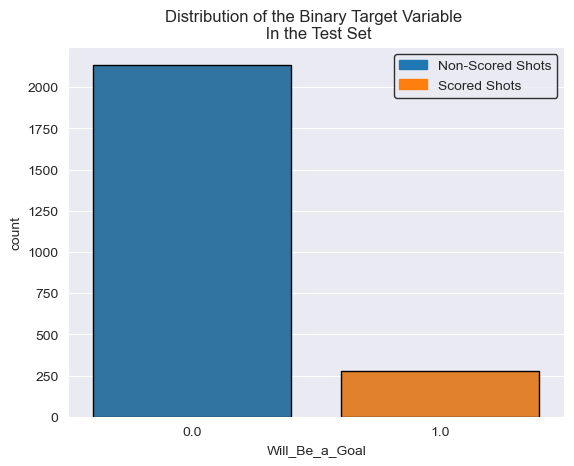

X       Y      Z      X1      X2      X3      X4      X5      X6  \
5412  4357.0  1362.0  200.0  2910.0 -1464.0 -2056.0  -673.0 -1403.0 -4586.0   
4642  3396.0   258.0   30.0  2924.0 -1328.0 -1979.0 -3465.0 -3708.0 -3448.0   
7652  4321.0   291.0   45.0  4440.0  -695.0  -190.0  -665.0   955.0  1464.0   
589   2842.0  1571.0   89.0  4995.0  2226.0  3913.0  3134.0   268.0  3611.0   
7214  4748.0  1798.0  447.0  1954.0 -3196.0 -4080.0 -4207.0 -4997.0 -4253.0   
4987  3584.0   876.0  132.0 -2622.0  3453.0  3648.0  4110.0  4183.0  1366.0   
1735  3773.0   863.0   44.0 -2391.0  1586.0  1760.0  3629.0   582.0  3829.0   
6952  4629.0  -562.0  209.0 -3153.0   477.0  2677.0   199.0  1629.0  4688.0   
7262  4432.0   485.0   52.0  4544.0    70.0  4408.0  3030.0  3828.0  2674.0   
3976  3254.0   132.0   20.0 -5114.0 -3939.0 -4068.0 -4122.0 -3982.0 -1611.0   

          X7      X8      X9     X10     X11     X12     X13     X14     X15  \
5412   -18.0 -2824.0 -3392.0 -4085.0 -2611.0 -5027.0 -3911.0 -1065.0 -3306.0   
4642  -203.0  -432.0 -3422.0 -2151.0 -3232.0 -4977.0 -3527.0 -1580.0 -2100.0   
7652  3161.0  4049.0  3697.0  -774.0  1642.0 -3508.0   276.0  -864.0  -419.0   
589   3696.0  1938.0  3614.0  3317.0  2873.0 -3222.0   690.0  3762.0   285.0   
7214 -2225.0 -4723.0 -3500.0 -4293.0 -3587.0 -5098.0 -4774.0 -3439.0 -4959.0   
4987  4074.0  1062.0  2380.0   778.0  2837.0  5033.0  3432.0  3430.0  4360.0   
1735   432.0  3482.0  4254.0  4014.0  3557.0  5044.0  4298.0   865.0  4219.0   
6952  3960.0   944.0  3987.0  2293.0  3713.0  4850.0  4614.0  2837.0  4190.0   
7262  4358.0  4276.0  2113.0  3468.0  4428.0 -2766.0  3104.0   170.0  1488.0   
3976 -3835.0 -2497.0 -3584.0 -3484.0 -3928.0  2518.0 -4016.0 -3712.0  -798.0   

         X16     X17     X18     X19     X20     X21     X22     Y1      Y2  \
5412 -2303.0 -3726.0 -4349.0 -2773.0 -1577.0 -3456.0 -1938.0   42.0 -2038.0   
4642 -3504.0 -3557.0 -3688.0 -3788.0 -3664.0 -3562.0 -2710.0    3.0  -551.0   
7652   177.0  2543.0   261.0   798.0  4147.0  -820.0  1868.0  309.0   306.0   
589    247.0  2540.0  1851.0  3400.0  2122.0  2845.0  3189.0  144.0  -370.0   
7214 -4328.0 -4185.0 -4838.0 -4755.0 -3511.0 -3897.0 -4189.0  159.0   297.0   
4987   862.0  3794.0  4258.0  3798.0  4174.0  2692.0  2534.0   52.0  1606.0   
1735  3929.0  3432.0  3874.0  3788.0  2109.0  2847.0  4272.0    2.0 -1877.0   
6952  1314.0  2962.0  4467.0  3740.0  4001.0    47.0  1951.0 -136.0 -1737.0   
7262  3651.0  3610.0    58.0  4046.0  3122.0  4062.0  1655.0  460.0   314.0   
3976 -2241.0 -1284.0 -3263.0 -1705.0 -3494.0 -3952.0 -3170.0   64.0   -48.0   

          Y3      Y4      Y5      Y6      Y7      Y8      Y9     Y10     Y11  \
5412  2306.0  1191.0   240.0  1442.0  -477.0  -155.0   708.0  -720.0 -2205.0   
4642   176.0 -2761.0  1634.0   699.0 -1239.0   464.0 -1158.0  1237.0   350.0   
7652  1253.0 -1050.0  1760.0   516.0  1699.0   202.0  -167.0   547.0 -1298.0   
589   1411.0  1941.0   861.0  1420.0   556.0  2104.0   -38.0  1529.0  1223.0   
7214  -189.0    69.0   580.0  3309.0   554.0   321.0   831.0  -699.0  -191.0   
4987  1082.0  2140.0   -50.0 -1432.0   568.0  -586.0  -322.0  -694.0   454.0   
1735  -327.0  1082.0   640.0  1557.0  -605.0 -1119.0  -304.0  -640.0  -318.0   
6952 -1502.0  -383.0 -2397.0  -938.0  -239.0  1127.0   624.0  -955.0 -2554.0   
7262   596.0   332.0   782.0  2476.0  -162.0  2008.0    86.0 -1344.0   151.0   
3976    58.0 -1335.0   166.0  1116.0    22.0  -330.0   122.0   -14.0   805.0   

        Y12     Y13     Y14     Y15     Y16     Y17     Y18     Y19     Y20  \
5412  188.0   147.0   779.0 -1651.0   945.0  -562.0   869.0   245.0  1563.0   
4642   31.0   441.0 -1372.0 -1164.0   276.0   272.0  -759.0  1307.0    86.0   
7652   35.0   295.0   548.0 -1577.0  1232.0    46.0  2259.0  1302.0   424.0   
589   286.0    64.0  2331.0  1686.0   703.0  2617.0   466.0   501.0  1535.0   
7214  155.0  -136.0  1980.0   445.0  -624.0  -156.0   219.0   643.0    24.0   
4987   72.0   612.0    73.0  1070.0

In [28]:
Test_Shots_On_1_Same_Target_Goal_df = TPD4MFs.Read_Tracking_Data_4_Test_Shots_Frames_On_1_Same_Target_Goal_4_All_Models(  )

Test_Shots_On_1_Same_Target_Goal_df.head(10)

In [29]:
TPD4MFs.Adding_Same_Team_Binary_Indicator_Columns( to_training_or_test_data = "training" )



 Loading & Reading In the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (50000, 444) 



C:\Users\Pedro\Desktop\Hertha BSC\Thesis Data\Thesis_Preparing_Data_For_Models_Functions.py:2610: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  augmented_training_shots_on_1_same_target_goal_df[f"Same_Team_{Pair[0]}_{Pair[1]}"] = Same_Team_Flag
C:\Users\Pedro\Desktop\Hertha BSC\Thesis Data\Thesis_Preparing_Data_For_Models_Functions.py:2610: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  augmented_training_shots_on_1_same_target_goal_df[f"Same_Team_{Pair[0]}_{Pair[1]}"] = Same_Team_Flag
C:\Users\Pedro\Desktop\Hertha BSC\Thesis Dat

Dimensions of the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (50000, 675) 

 Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  -->  Succesfully Saved In the 'Augmented_Training_Shots_Frames_On_1_Same_Target_Goal_4_All_Models.parquet' File  

_________________________________________________________________________________________________________________________________________________________________________________ 

 FINISHED  




 Loading & Reading In the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (50000, 675) 

∴ The Total Number of Shots Taken Throughout This Augmented Training Dataset  =  50000 

∴ The Total Number of Goals Scored Throughout This Augmented Training Dataset  =  5792 

∴ The Total Number of Non-Scored Shots Throughout This Augmented Training Dataset  =  44208 



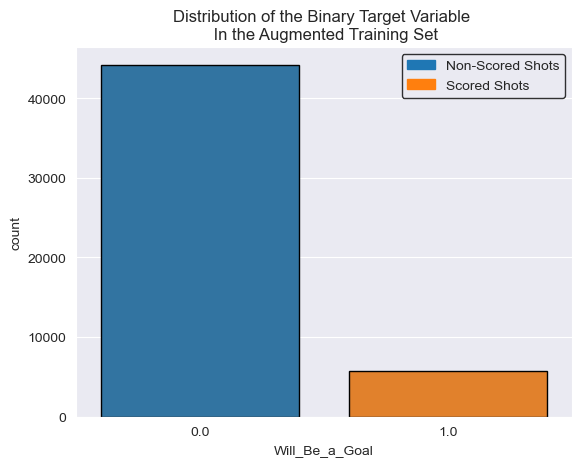

X            Y      Z      X1      X2      X3      X4  \
0  3954.164734    75.414643   50.0 -4992.0 -4512.0 -4055.0 -4177.0   
1  4460.000000  1030.000000   29.0 -3101.0  3656.0   -74.0  -261.0   
2  4032.000000 -2212.000000   28.0 -5079.0 -3960.0 -3093.0 -3665.0   
3  3587.352812   241.656470  203.0  4706.0  2700.0  2145.0  3922.0   
4  4179.662052   975.461169  112.0 -4900.0 -3425.0 -4674.0 -4298.0   
5   585.767493  -552.685648   67.0  4683.0  3234.0  1159.0  2825.0   
6  2030.000000  3118.000000   38.0  4376.0  1828.0  3199.0  2764.0   
7  1092.996139  2569.568005   16.0  4391.0  2344.0   -72.0  2751.0   
8  2868.000000   191.000000   52.0  5101.0  2521.0  3415.0  3536.0   
9  1370.437850  1238.581922   47.0  4608.0  2776.0  2806.0  2770.0   

           X5      X6      X7      X8      X9     X10     X11          X12  \
0 -4565.00000   937.0 -2354.0 -1806.0   358.0 -4784.0 -1440.0  3934.164734   
1  1037.00000  2840.0  4218.0  4277.0   702.0  3327.0  1215.0  4884.000000   
2 -2433.00000 -4054.0 -4307.0 -2596.0 -2852.0 -2460.0 -3930.0  2593.000000   
3   146.00000  3250.0  3890.0  -810.0  3689.0  -163.0 -1024.0 -3558.000000   
4 -4564.00000   158.0 -4484.0 -3376.0    38.0 -4178.0 -4125.0  4159.662052   
5   349.00000  2985.0  3217.0  2750.0  1766.0  2002.0  2775.0 -3071.000000   
6  3062.00000  1264.0  1964.0  2018.0  2121.0  2425.0   270.0 -2928.000000   
7  2211.00000   841.0   996.0  1297.0  1590.0   552.0  2154.0 -3473.000000   
8   413.00000  3908.0  4256.0  4319.0  3455.0  4036.0  4178.0 -3167.000000   
9  1350.43785  2605.0  2275.0  2378.0  2706.0  2712.0  2680.0 -2637.000000   

      X13          X14     X15     X16     X17     X18     X19          X20  \
0  1124.0   -22.000000  1096.0  -794.0 -4406.0 -4580.0  -864.0   688.000000   
1  2993.0   -45.000000  4297.0  1622.0  4143.0  4275.0  4335.0  3652.000000   
2 -2209.0 -2044.000000 -3678.0  -945.0 -3005.0 -3508.0  -634.0 -4005.000000   
3  -666.0  3567.352812   214.0  -748.0   262.0  1367.0 -1011.0  1292.000000   
4 -2150.0 -4461.000000 -2801.0 -1208.0  -140.0   532.0   497.0 -4384.000000   
5  1628.0  1506.000000  2925.0    21.0   353.0  1343.0  2878.0   565.767493   
6  1936.0  -316.000000  -194.0  2526.0   588.0  1424.0  2032.0  2211.000000   
7  2693.0  -174.000000   134.0  2543.0  1394.0  1297.0  -381.0  1072.996139   
8  4255.0  3509.000000  4228.0   168.0  3730.0   750.0   807.0  2619.000000   
9  2830.0  2812.000000  1350.0  2736.0  2711.0  2836.0  2796.0  1224.000000   

      X21     X22      Y1      Y2      Y3      Y4      Y5      Y6      Y7  \
0 -3817.0 -1157.0  -140.0  -442.0  -311.0    34.0   -58.0   -17.0 -1874.0   
1  1717.0  1513.0    -4.0   781.0   235.0 -1113.0 -1998.0  1011.0  1142.0   
2 -2716.0 -3533.0 -1010.0  -511.0 -1083.0   184.0 -3065.0 -1969.0 -2864.0   
3  1147.0  3926.0   -24.0  1925.0   -57.0   557.0  1031.0   613.0   130.0   
4 -3654.0 -1608.0   371.0   769.0    39.0   808.0   115.0   325.0   700.0   
5  3206.0  3062.0   -72.0  -711.0 -1129.0 -2017.0 -1760.0   908.0   -73.0   
6  2931.0  2264.0   264.0  2986.0  2307.0    -8.0  1756.0  -348.0  2593.0   
7  2757.0   692.0   240.0   340.0  1710.0  1752.0  2499.0  2028.0   177.0   
8  3081.0  4209.0    16.0 -2362.0   112.0  1023.0   213.0   136.0   296.0   
9  2092.0  2724.0    26.0  -567.0  -209.0   513.0  1184.0  -306.0   441.0   

       Y8      Y9     Y10     Y11    Y12     Y13     Y14     Y15     Y16  \
0   429.0 -1216.0  -803.0  -945.0 -112.0  -614.0 -2226.0 -1401.0   268.0   
1  -500.0  1742.0  -629.0 -1073.0  245.0  -229.0  -317.0  -481.0  -343.0   
2    89.0  1441.0  -548.0 -1268.0 -297.0 -2866.0 -1289.0 -2121.0   251.0   
3  -614.0  -705.0   625.0   -85.0  139.0   546.0   159.0  1821.0  -282.0   
4  1573.0 -1368.0   514.0    26.0  160.0   358.0   719.0  1308.0 -1866.0   
5   351.0   -54.0 -2181.0  -760.0 -224.0   701.0 -1912.0  -797.0  -503.0   
6  1509.0  2715.0  2626.0  1862.0  540.0  2804.0   713.0  2146.0  -406.0   
7  2324.0  1373.0  3051.0  -603.0  481.0   -76.0  2031.0 

In [30]:
Augmented_Shots_On_1_Same_Target_Goal_df = TPD4MFs.Read_Tracking_Data_4_Augmented_Training_Shots_Frames_On_1_Same_Target_Goal_4_All_Models(  )

Augmented_Shots_On_1_Same_Target_Goal_df.head(10)

In [3]:
TPD4MFs.Adding_Same_Team_Binary_Indicator_Columns( to_training_or_test_data = "test" )



 Loading & Reading In the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (2416, 444) 



C:\Users\Pedro\Desktop\Hertha BSC\Thesis Data\Thesis_Preparing_Data_For_Models_Functions.py:2672: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_shots_on_1_same_target_goal_df[f"Same_Team_{Pair[0]}_{Pair[1]}"] = Same_Team_Flag
C:\Users\Pedro\Desktop\Hertha BSC\Thesis Data\Thesis_Preparing_Data_For_Models_Functions.py:2672: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_shots_on_1_same_target_goal_df[f"Same_Team_{Pair[0]}_{Pair[1]}"] = Same_Team_Flag
C:\Users\Pedro\Desktop\Hertha BSC\Thesis Data\Thesis_Preparing_Data_For_

Dimensions of the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (2416, 675) 

 Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  -->  Succesfully Saved In the 'Test_Shots_Frames_On_1_Same_Target_Goal_4_All_Models.parquet' File  

_________________________________________________________________________________________________________________________________________________________________________________ 

 FINISHED  




 Loading & Reading In the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (2416, 675) 

∴ The Total Number of Shots Taken Throughout This Test Dataset  =  2416 

∴ The Total Number of Goals Scored Throughout This Test Dataset  =  280 

∴ The Total Number of Non-Scored Shots Throughout This Test Dataset  =  2136 



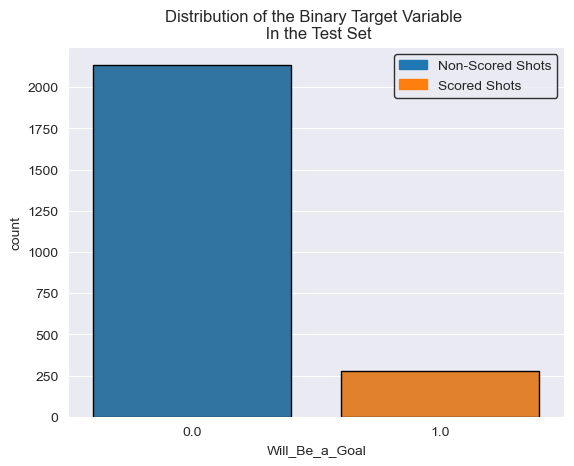

X       Y      Z      X1      X2      X3      X4      X5      X6  \
5412  4357.0  1362.0  200.0  2910.0 -1464.0 -2056.0  -673.0 -1403.0 -4586.0   
4642  3396.0   258.0   30.0  2924.0 -1328.0 -1979.0 -3465.0 -3708.0 -3448.0   
7652  4321.0   291.0   45.0  4440.0  -695.0  -190.0  -665.0   955.0  1464.0   
589   2842.0  1571.0   89.0  4995.0  2226.0  3913.0  3134.0   268.0  3611.0   
7214  4748.0  1798.0  447.0  1954.0 -3196.0 -4080.0 -4207.0 -4997.0 -4253.0   
4987  3584.0   876.0  132.0 -2622.0  3453.0  3648.0  4110.0  4183.0  1366.0   
1735  3773.0   863.0   44.0 -2391.0  1586.0  1760.0  3629.0   582.0  3829.0   
6952  4629.0  -562.0  209.0 -3153.0   477.0  2677.0   199.0  1629.0  4688.0   
7262  4432.0   485.0   52.0  4544.0    70.0  4408.0  3030.0  3828.0  2674.0   
3976  3254.0   132.0   20.0 -5114.0 -3939.0 -4068.0 -4122.0 -3982.0 -1611.0   

          X7      X8      X9     X10     X11     X12     X13     X14     X15  \
5412   -18.0 -2824.0 -3392.0 -4085.0 -2611.0 -5027.0 -3911.0 -1065.0 -3306.0   
4642  -203.0  -432.0 -3422.0 -2151.0 -3232.0 -4977.0 -3527.0 -1580.0 -2100.0   
7652  3161.0  4049.0  3697.0  -774.0  1642.0 -3508.0   276.0  -864.0  -419.0   
589   3696.0  1938.0  3614.0  3317.0  2873.0 -3222.0   690.0  3762.0   285.0   
7214 -2225.0 -4723.0 -3500.0 -4293.0 -3587.0 -5098.0 -4774.0 -3439.0 -4959.0   
4987  4074.0  1062.0  2380.0   778.0  2837.0  5033.0  3432.0  3430.0  4360.0   
1735   432.0  3482.0  4254.0  4014.0  3557.0  5044.0  4298.0   865.0  4219.0   
6952  3960.0   944.0  3987.0  2293.0  3713.0  4850.0  4614.0  2837.0  4190.0   
7262  4358.0  4276.0  2113.0  3468.0  4428.0 -2766.0  3104.0   170.0  1488.0   
3976 -3835.0 -2497.0 -3584.0 -3484.0 -3928.0  2518.0 -4016.0 -3712.0  -798.0   

         X16     X17     X18     X19     X20     X21     X22     Y1      Y2  \
5412 -2303.0 -3726.0 -4349.0 -2773.0 -1577.0 -3456.0 -1938.0   42.0 -2038.0   
4642 -3504.0 -3557.0 -3688.0 -3788.0 -3664.0 -3562.0 -2710.0    3.0  -551.0   
7652   177.0  2543.0   261.0   798.0  4147.0  -820.0  1868.0  309.0   306.0   
589    247.0  2540.0  1851.0  3400.0  2122.0  2845.0  3189.0  144.0  -370.0   
7214 -4328.0 -4185.0 -4838.0 -4755.0 -3511.0 -3897.0 -4189.0  159.0   297.0   
4987   862.0  3794.0  4258.0  3798.0  4174.0  2692.0  2534.0   52.0  1606.0   
1735  3929.0  3432.0  3874.0  3788.0  2109.0  2847.0  4272.0    2.0 -1877.0   
6952  1314.0  2962.0  4467.0  3740.0  4001.0    47.0  1951.0 -136.0 -1737.0   
7262  3651.0  3610.0    58.0  4046.0  3122.0  4062.0  1655.0  460.0   314.0   
3976 -2241.0 -1284.0 -3263.0 -1705.0 -3494.0 -3952.0 -3170.0   64.0   -48.0   

          Y3      Y4      Y5      Y6      Y7      Y8      Y9     Y10     Y11  \
5412  2306.0  1191.0   240.0  1442.0  -477.0  -155.0   708.0  -720.0 -2205.0   
4642   176.0 -2761.0  1634.0   699.0 -1239.0   464.0 -1158.0  1237.0   350.0   
7652  1253.0 -1050.0  1760.0   516.0  1699.0   202.0  -167.0   547.0 -1298.0   
589   1411.0  1941.0   861.0  1420.0   556.0  2104.0   -38.0  1529.0  1223.0   
7214  -189.0    69.0   580.0  3309.0   554.0   321.0   831.0  -699.0  -191.0   
4987  1082.0  2140.0   -50.0 -1432.0   568.0  -586.0  -322.0  -694.0   454.0   
1735  -327.0  1082.0   640.0  1557.0  -605.0 -1119.0  -304.0  -640.0  -318.0   
6952 -1502.0  -383.0 -2397.0  -938.0  -239.0  1127.0   624.0  -955.0 -2554.0   
7262   596.0   332.0   782.0  2476.0  -162.0  2008.0    86.0 -1344.0   151.0   
3976    58.0 -1335.0   166.0  1116.0    22.0  -330.0   122.0   -14.0   805.0   

        Y12     Y13     Y14     Y15     Y16     Y17     Y18     Y19     Y20  \
5412  188.0   147.0   779.0 -1651.0   945.0  -562.0   869.0   245.0  1563.0   
4642   31.0   441.0 -1372.0 -1164.0   276.0   272.0  -759.0  1307.0    86.0   
7652   35.0   295.0   548.0 -1577.0  1232.0    46.0  2259.0  1302.0   424.0   
589   286.0    64.0  2331.0  1686.0   703.0  2617.0   466.0   501.0  1535.0   
7214  155.0  -136.0  1980.0   445.0  -624.0  -156.0   219.0   643.0    24.0   
4987   72.0   612.0    73.0  1070.0

In [4]:
Test_Shots_On_1_Same_Target_Goal_df = TPD4MFs.Read_Tracking_Data_4_Test_Shots_Frames_On_1_Same_Target_Goal_4_All_Models(  )

Test_Shots_On_1_Same_Target_Goal_df.head(10)

___
___

### Filter Relevant Data (Features) For the xG Model

In [5]:
TPD4MFs.Filter_Relevant_Data_4_xG_Model( from_training_or_test_data = "training" )



 Loading & Reading In the Final Version of the Augmented Training Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Relevant Data of the Augmented Training Tracking Data For the xG Model - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (50000, 5) 

∴ The Total Number of Shots Taken Throughout the Augmented Training Dataset Relevant For the xG Model  =  50000 

∴ The Total Number of Goals Scored Throughout the Augmented Training Dataset Relevant For the xG Model  =  5792 

∴ The Total Number of Non-Scored Shots Throughout the Augmented Training Dataset Relevant For the xG Model  =  44208 

 Final Version of the Augmented Training Relevant Tracking Data For the xG Model - Only Containing the Frames In Which Shots Occurred Throughout the Season, On 1 Same Target Goal  -->  Succesfully Saved In the 'Augmented_Training_Relevant_Data_4_xG_Model.parquet' File  

_________________________


 Loading & Reading In the Final Version of the Augmented Training Relevant Tracking Data For the xG Model - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Relevant Data of the Augmented Training Tracking Data For the xG Model - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (50000, 5) 

∴ The Total Number of Shots Taken Throughout the Augmented Training Dataset Relevant For the xG Model  =  50000 

∴ The Total Number of Goals Scored Throughout the Augmented Training Dataset Relevant For the xG Model  =  5792 

∴ The Total Number of Non-Scored Shots Throughout the Augmented Training Dataset Relevant For the xG Model  =  44208 



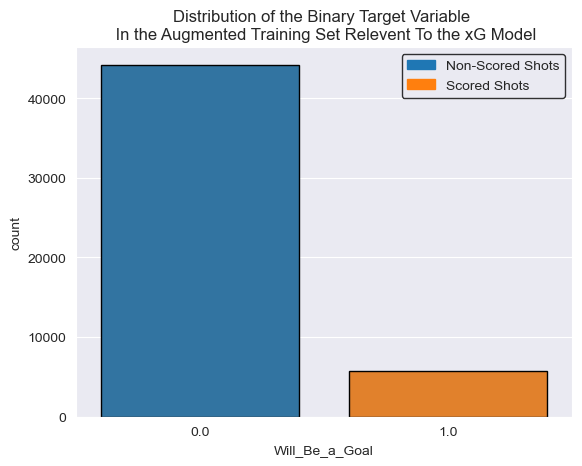

X            Y  Dist_Between_Ball_TargetGoal  \
0  3954.164734    75.414643                   1298.027891   
1  4460.000000  1030.000000                   1298.075499   
2  4032.000000 -2212.000000                   2525.166925   
3  3587.352812   241.656470                   1680.117115   
4  4179.662052   975.461169                   1448.153243   
5   585.767493  -552.685648                   4696.863454   
6  2030.000000  3118.000000                   4482.223109   
7  1092.996139  2569.568005                   4887.060551   
8  2868.000000   191.000000                   2389.645371   
9  1370.437850  1238.581922                   4072.479300   

   Angle_Between_Ball_TargetGoal_Rad  Will_Be_a_Goal  
0                           0.184409             0.0  
1                           0.155449             1.0  
2                           0.139433             0.0  
3                           0.202312             1.0  
4                           0.165660             0.0  
5                           0.694161             0.0  
6                           0.107901             0.0  
7                           0.103955             0.0  
8                           0.252603             0.0  
9                           0.296760             0.0

In [6]:
Augmented_Training_Relevant_Data_4_xG_Model = TPD4MFs.Read_Relevant_Tracking_Data_4_xG_Model( from_training_or_test_data = "training" )

Augmented_Training_Relevant_Data_4_xG_Model.head(10)

In [7]:
TPD4MFs.Filter_Relevant_Data_4_xG_Model( from_training_or_test_data = "test" )



 Loading & Reading In the Final Version of the Test Tracking Data For All Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Relevant Data of the Test Tracking Data For the xG Model - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (2416, 5) 

∴ The Total Number of Shots Taken Throughout the Test Dataset Relevant For the xG Model  =  2416 

∴ The Total Number of Goals Scored Throughout the Test Dataset Relevant For the xG Model  =  280 

∴ The Total Number of Non-Scored Shots Throughout the Test Dataset Relevant For the xG Model  =  2136 

 Final Version of the Test Relevant Tracking Data For the xG Model - Only Containing the Frames In Which Shots Occurred Throughout the Season, On 1 Same Target Goal  -->  Succesfully Saved In the 'Test_Relevant_Data_4_xG_Model.parquet' File  

_______________________________________________________________________________________________________________________________


 Loading & Reading In the Final Version of the Test Relevant Tracking Data For the xG Model - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Relevant Data of the Test Tracking Data For the xG Model - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (2416, 5) 

∴ The Total Number of Shots Taken Throughout the Test Dataset Relevant For the xG Model  =  2416 

∴ The Total Number of Goals Scored Throughout the Test Dataset Relevant For the xG Model  =  280 

∴ The Total Number of Non-Scored Shots Throughout the Test Dataset Relevant For the xG Model  =  2136 



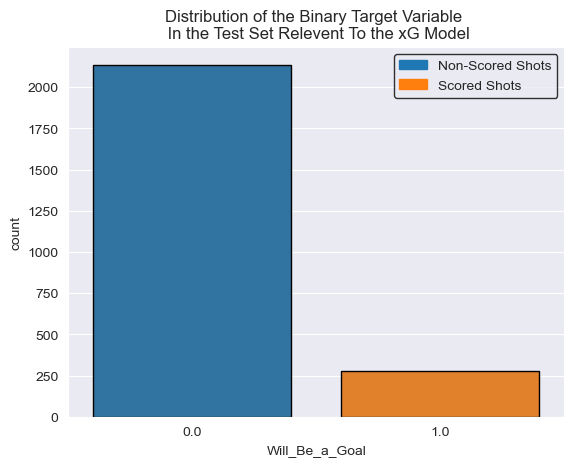

X       Y  Dist_Between_Ball_TargetGoal  \
5412  4357.0  1362.0                   1628.647598   
4642  3396.0   258.0                   1871.865380   
7652  4321.0   291.0                    973.510144   
589   2842.0  1571.0                   2875.153039   
7214  4748.0  1798.0                   1866.764045   
4987  3584.0   876.0                   1882.267781   
1735  3773.0   863.0                   1710.642569   
6952  4629.0  -562.0                    837.547014   
7262  4432.0   485.0                    950.972660   
3976  3254.0   132.0                   2000.359968   

      Angle_Between_Ball_TargetGoal_Rad  Will_Be_a_Goal  
5412                           0.152739             0.0  
4642                           0.213371             0.0  
7652                           0.168138             1.0  
589                            0.197094             0.0  
7214                           0.134630             0.0  
4987                           0.192114             0.0  
1735                           0.183806             0.0  
6952                           0.155434             1.0  
7262                           0.162754             0.0  
3976                           0.223507             0.0

In [2]:
Test_Relevant_Data_4_xG_Model = TPD4MFs.Read_Relevant_Tracking_Data_4_xG_Model( from_training_or_test_data = "test" )

Test_Relevant_Data_4_xG_Model.head(10)

___
___
___

## **Preparing the Data For the GNNs From the `PyG` Library**


#### Data Preprocessing - Data Transformations

- Performing Max Absolute (MaxAbs) Scaling On the Specified Numerical Columns
    
    i) [-1, 1] Range For Columns With -ve & +ve Values
    
    ii) [-1, 0] Range For Columns Which Only Have -ve Values (<0)
    
    iii) [0, 1] Range For Columns Which Only Have +ve Values (>0)
    
    
- Performing 1-Hot-Encoding of the "Section" Feature
    
- Rename the 1-Hot-Encoded "Section_1.0" Column To "is_1st_Half"

- Drop All the Angle "_Deg" Columns & the "BallPossesion" + "Section_2.0" Columns

- Places the Target Variable Column At the End of the Resulting DataFrame



In [2]:

# Splitting the Data Into: Features & Target Variable

Num_Players = 22

Player_Combinations = list( combinations( range(1, Num_Players + 1), 2 ) )



Numerical_Ball_Complex_Node_Features = [ "X", "Y", "Z", "V_xBall", "V_yBall", "V_zBall", "SpeedBall", "Dist_Between_Ball_TargetGoal", "Angle_Between_Ball_TargetGoal_Rad" ]

Numerical_Players_Complex_Node_Features = [ Player_Node_Feature for Player_ID in range(1, Num_Players + 1) for Player_Node_Feature in [f"X{Player_ID}", f"Y{Player_ID}", f"V_x{Player_ID}", f"V_y{Player_ID}", f"Speed{Player_ID}",
                                                                                                                                       f"Dist_Between_{Player_ID}_TargetGoal", f"Angle_Between_{Player_ID}_TargetGoal_Rad"] ]

# Numerical_Global_Graph_Level_Features = ["Match_Minute_Clock", "Match_Seconds_Clock"]



Numerical_Ball_Player_Edge_Features = [ f"Dist_Between_Ball_{Player_ID}" for Player_ID in range(1, Num_Players + 1) ]

Numerical_Player_Player_Edge_Features = [ Player_Player_Edge_Feature for Player_ID_1, Player_ID_2 in Player_Combinations for Player_Player_Edge_Feature in [f"Dist_Between_{Player_ID_1}_{Player_ID_2}"] ]



Numerical_Features_To_MaxAbs_Scale = Numerical_Ball_Complex_Node_Features + Numerical_Players_Complex_Node_Features + Numerical_Ball_Player_Edge_Features + Numerical_Player_Player_Edge_Features   # + Numerical_Global_Graph_Level_Features

print(f"Numerical Features On Which To Perform MaxAbs Scaling ({len(Numerical_Features_To_MaxAbs_Scale)}): \n \n", Numerical_Features_To_MaxAbs_Scale, '\n')



Numerical Features On Which To Perform MaxAbs Scaling (416): 
 
 ['X', 'Y', 'Z', 'V_xBall', 'V_yBall', 'V_zBall', 'SpeedBall', 'Dist_Between_Ball_TargetGoal', 'Angle_Between_Ball_TargetGoal_Rad', 'X1', 'Y1', 'V_x1', 'V_y1', 'Speed1', 'Dist_Between_1_TargetGoal', 'Angle_Between_1_TargetGoal_Rad', 'X2', 'Y2', 'V_x2', 'V_y2', 'Speed2', 'Dist_Between_2_TargetGoal', 'Angle_Between_2_TargetGoal_Rad', 'X3', 'Y3', 'V_x3', 'V_y3', 'Speed3', 'Dist_Between_3_TargetGoal', 'Angle_Between_3_TargetGoal_Rad', 'X4', 'Y4', 'V_x4', 'V_y4', 'Speed4', 'Dist_Between_4_TargetGoal', 'Angle_Between_4_TargetGoal_Rad', 'X5', 'Y5', 'V_x5', 'V_y5', 'Speed5', 'Dist_Between_5_TargetGoal', 'Angle_Between_5_TargetGoal_Rad', 'X6', 'Y6', 'V_x6', 'V_y6', 'Speed6', 'Dist_Between_6_TargetGoal', 'Angle_Between_6_TargetGoal_Rad', 'X7', 'Y7', 'V_x7', 'V_y7', 'Speed7', 'Dist_Between_7_TargetGoal', 'Angle_Between_7_TargetGoal_Rad', 'X8', 'Y8', 'V_x8', 'V_y8', 'Speed8', 'Dist_Between_8_TargetGoal', 'Angle_Between_8_TargetGoal_Ra

In [3]:
TPD4MFs.Data_Preprocessing_Pipeline_4_PyG_GNN_Models( preprocess_training_or_test_data = "training",
                                                      features_to_drop = ["BallPossesion", "Section", "Match_Minute_Clock", "Match_Seconds_Clock"],
                                                      categorical_features = None,
                                                      numerical_features_to_scale = Numerical_Features_To_MaxAbs_Scale,
                                                      target_variable = ["Will_Be_a_Goal"] )




 Loading & Reading In the Augmented Training Tracking Data For the PyG GNN Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Augmented Training Tracking Data For the PyG GNN Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal = (50000, 697) 

Final Dimensions of the Preprocessed Augmented Training Tracking Data For the PyG GNN Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal = (50000, 670) 

 Final Preprocessed Augmented Training Tracking Data For the PyG GNN Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  -->  Succesfully Saved In the Folders 'PyG DataFrame-Format Data'  

_________________________________________________________________________________________________________________________________________________________________________________ 

 FINISHED  




 Loading & Reading In the Preprocessed Version of the Augmented Training Tracking Data For the PyG GNN Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Preprocessed Version of the Augmented Training Tracking Data For the PyG GNN Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (50000, 670) 

∴ The Total Number of Shots Taken Throughout This Preprocessed Augmented Training Dataset  =  50000 

∴ The Total Number of Goals Scored Throughout This Preprocessed Augmented Training Dataset  =  5792 

∴ The Total Number of Non-Scored Shots Throughout This Preprocessed Augmented Training Dataset  =  44208 



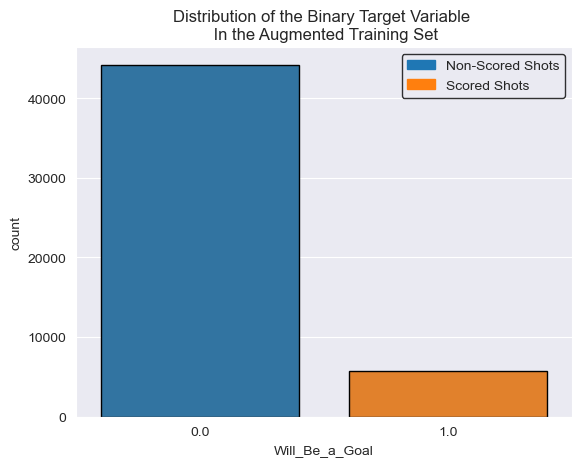

X         Y         Z   V_xBall   V_yBall   V_zBall  SpeedBall  \
0  0.586845  0.019701  0.045249 -0.177846  0.069877  0.067535   0.108099   
1  0.661917  0.269070  0.026244  0.393645 -0.008839  0.059398   0.190600   
2  0.598397 -0.577847  0.025339 -0.086790 -0.051360  0.151343   0.065076   
3  0.532406  0.063129  0.183710  0.244484 -0.082755 -0.090317   0.141444   
4  0.620312  0.254823  0.101357 -0.192557  0.025833  0.040683   0.096250   
5  0.086935 -0.144380  0.060633 -0.002501  0.306485 -0.054516   0.286137   
6  0.301276  0.814525  0.034389  0.278758 -0.032767 -0.187958   0.139196   
7  0.162214  0.671256  0.014480 -0.450574 -0.150118  0.012205   0.259054   
8  0.425646  0.049896  0.047059  0.210797 -0.197059  0.088690   0.210446   
9  0.203389  0.323558  0.042534  0.525743 -0.142498  0.297803   0.288102   

   Dist_Between_Ball_TargetGoal  Angle_Between_Ball_TargetGoal_Rad        X1  \
0                      0.207525                           0.118114 -0.883071   
1                      0.207533                           0.099566 -0.548558   
2                      0.403717                           0.089307 -0.898461   
3                      0.268613                           0.129581  0.832478   
4                      0.231527                           0.106106 -0.866796   
5                      0.750922                           0.444612  0.828410   
6                      0.716606                           0.069111  0.774102   
7                      0.781330                           0.066584  0.776756   
8                      0.382050                           0.161793  0.902353   
9                      0.651097                           0.190076  0.815142   

         Y1      V_x1      V_y1    Speed1  Dist_Between_1_TargetGoal  \
0 -0.014001  0.059711  0.085246  0.073594                   0.906233   
1 -0.000400  0.080139  0.025927  0.059559                   0.738845   
2 -0.101010 -0.002553  0.001964  0.002278                   0.918204   
3 -0.002400 -0.014731 -0.087406  0.062677                   0.048177   
4  0.037104  0.072478  0.043605  0.059810                   0.898609   
5 -0.007201 -0.025338  0.049105  0.039072                   0.050567   
6  0.026403  0.091531 -0.027891  0.067660                   0.080777   
7  0.024002 -0.137297 -0.021606  0.098278                   0.078910   
8  0.001600 -0.016106 -0.145546  0.103545                   0.013258   
9  0.002600  0.092317 -0.068746  0.081389                   0.056847   

   Angle_Between_1_TargetGoal_Rad        X2        Y2      V_x2      V_y2  \
0                        0.095939 -0.811511 -0.044204 -0.088781  0.395783   
1                        0.154127  0.657554  0.078108  0.383802  0.048123   
2                        0.090813 -0.712230 -0.051105 -0.086424 -0.053622   
3                        0.101823  0.485612  0.192519  0.220382 -0.086817   
4                        0.097257 -0.616007  0.076908 -0.209382 -0.106066   
5                        0.102300  0.581655 -0.071107 -0.064032  0.076407   
6                        0.109078  0.328777  0.298630  0.286968 -0.027695   
7                        0.108777  0.421583  0.034003 -0.385766 -0.035945   
8                        0.093968  0.453417 -0.236224 -0.032998  0.066782   
9                        0.103979  0.499281 -0.056706  0.342554  0.025927   

     Speed2  Dist_Between_2_TargetGoal  Angle_Between_2_TargetGoal_Rad  \
0  0.286816                   0.865279                        0.102077   
1  0.273514                   0.157175                        0.121568   
2  0.071918                   0.816770                        0.115438   
3  0.167489                   0.282908                        0.114574   
4  0.165968                   0.771155                        0.129140   
5  0.070492                   0.189287                        0.136984   
6  0.203859                   0.402145                        0.069972   
7  0.273959                   0.259072                     

In [4]:
df = TPD4MFs.Browse_and_Select_Reading_Preprocessed_Tracking_Data_4_PyG_GNN_Models( training_or_test_data = "training" )

df.head(10)


In [5]:
TPD4MFs.Data_Preprocessing_Pipeline_4_PyG_GNN_Models( preprocess_training_or_test_data = "test",
                                                      features_to_drop = ["BallPossesion", "Section", "Match_Minute_Clock", "Match_Seconds_Clock"],
                                                      categorical_features = None,
                                                      numerical_features_to_scale = Numerical_Features_To_MaxAbs_Scale,
                                                      target_variable = ["Will_Be_a_Goal"] )




 Loading & Reading In the Test Tracking Data For the PyG GNN Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Test Tracking Data For the PyG GNN Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal = (2416, 697) 

Final Dimensions of the Preprocessed Test Tracking Data For the PyG GNN Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal = (2416, 670) 

 Final Preprocessed Test Tracking Data For the PyG GNN Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  -->  Succesfully Saved In the Folders 'PyG DataFrame-Format Data'  

_________________________________________________________________________________________________________________________________________________________________________________ 

 FINISHED  




 Loading & Reading In the Preprocessed Version of the Test Tracking Data For the PyG GNN Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal 

Dimensions of the Preprocessed Version of the Test Tracking Data For the PyG GNN Models - Only Containing the Frames In Which Shots Occurred, On 1 Same Target Goal  =  (2416, 670) 

∴ The Total Number of Shots Taken Throughout This Preprocessed Test Dataset  =  2416 

∴ The Total Number of Goals Scored Throughout This Preprocessed Test Dataset  =  280 

∴ The Total Number of Non-Scored Shots Throughout This Preprocessed Test Dataset  =  2136 



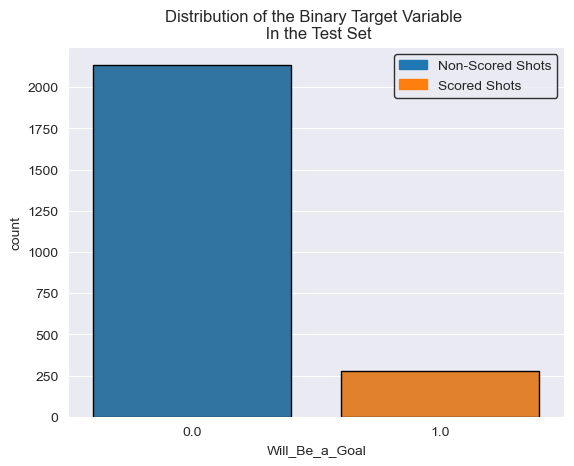

X         Y         Z   V_xBall   V_yBall   V_zBall  SpeedBall  \
0  0.724717  0.373355  0.224972 -0.446505  0.170974  0.026455   0.265352   
1  0.564870  0.070724  0.033746 -0.288470  0.072191  0.036155   0.152543   
2  0.718729  0.079770  0.050619  0.448583 -0.021935 -0.067901   0.213666   
3  0.472721  0.430647  0.100112 -0.145422  0.000826  0.011464   0.068934   
4  0.789754  0.492873  0.502812 -0.616412 -0.690204  0.609347   0.710831   
5  0.596141  0.240132  0.148481  0.206262 -0.192157  0.088183   0.204871   
6  0.627578  0.236568  0.049494  0.258347 -0.098558  0.047619   0.153367   
7  0.769960 -0.154057  0.235096  0.285651  0.143404  0.035273   0.190691   
8  0.737192  0.132950  0.058493 -0.295890 -0.072566  0.051146   0.155882   
9  0.541251  0.036184  0.022497  0.199288  0.103140 -0.012346   0.135081   

   Dist_Between_Ball_TargetGoal  Angle_Between_Ball_TargetGoal_Rad        X1  \
0                      0.260384                           0.099895  0.522067   
1                      0.299269                           0.139550  0.524578   
2                      0.155642                           0.109967  0.796555   
3                      0.459672                           0.128905  0.896125   
4                      0.298453                           0.088051  0.350556   
5                      0.300932                           0.125647 -0.470398   
6                      0.273493                           0.120214 -0.428956   
7                      0.133905                           0.101658 -0.565662   
8                      0.152039                           0.106445  0.815213   
9                      0.319812                           0.146179 -0.917474   

         Y1      V_x1      V_y1    Speed1  Dist_Between_1_TargetGoal  \
0  0.004200  0.017285  0.013946  0.015704                   0.207233   
1  0.000300 -0.019642  0.038694  0.030684                   0.205960   
2  0.030903  0.122958  0.030445  0.089570                   0.076765   
3  0.014401  0.069729 -0.036337  0.055599                   0.025931   
4  0.015902  0.035956 -0.024934  0.030940                   0.292189   
5  0.005201 -0.004910  0.023767  0.017161                   0.697055   
6  0.000200  0.100763  0.017088  0.072267                   0.676586   
7 -0.013601 -0.018856  0.040069  0.031314                   0.744156   
8  0.046005 -0.232756  0.019053  0.165134                   0.074613   
9  0.006401  0.013553  0.015713  0.014673                   0.917716   

   Angle_Between_1_TargetGoal_Rad        X2        Y2      V_x2      V_y2  \
0                        0.214186 -0.275085 -0.203820  0.056372  0.165188   
1                        0.213214 -0.249530 -0.055106 -0.079746  0.198186   
2                        0.140154 -0.130590  0.030603  0.192097 -0.063836   
3                        0.125134  0.418264 -0.037004  0.095852 -0.294235   
4                        0.315075 -0.600526  0.029703  0.050688 -0.021398   
5                        0.237384  0.648816  0.160616 -0.016303  0.022195   
6                        0.260082  0.298008 -0.187719  0.128851  0.228435   
7                        0.197512  0.089628 -0.173717 -0.120012  0.153010   
8                        0.136235  0.013153  0.031403 -0.087996 -0.005303   
9                        0.122314 -0.740135 -0.004800  0.072871  0.075228   

     Speed2  Dist_Between_2_TargetGoal  Angle_Between_2_TargetGoal_Rad  \
0  0.123420                   0.621288                        0.109869   
1  0.151058                   0.584500                        0.297330   
2  0.143137                   0.527107                        0.545453   
3  0.218817                   0.269762                        0.202634   
4  0.038904                   0.748328                        0.144308   
5  0.019473                   0.213404                        0.111123   
6  0.185452                   0.364529                        0.123892   
7  0.137504                   0.449750                     

In [6]:
df = TPD4MFs.Browse_and_Select_Reading_Preprocessed_Tracking_Data_4_PyG_GNN_Models( training_or_test_data = "test" )

df.head(10)


___
___
___